# Natural Launguage Processing using Naive Bayes by Text Classification : Pushkal Ojha

## Project Motives : 
                  1) To gain a better understanding of Naive Bayes by using it for text classification. 
                  2) To know more about the SpaCy package (it's my first time working with this package).
                  3) Project concept and understanding: "https://colab.research.google.com/github/futuremojo/nlp-demystified/blob/main/notebooks/nlpdemystified_classification_naive_bayes.ipynb#scrollTo=uJ2lYTdW3HXP"                                     

# Importing Major Libraries

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import spacy as sp
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from sklearn.metrics import classification_report
import sklearn
from sklearn.datasets import fetch_20newsgroups
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline

# Importing 20 news groups dataset

### This is a labelled dataset containing 18,000 newsgroup posts accross 20 topics

In [5]:
df_train = fetch_20newsgroups(subset = 'train')

In [6]:
df_train

{'data': ["From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n",
  "From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: University of Washingto

### These are the topic names

In [7]:
df_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

### Labels for each post

In [8]:
df_train.target

array([7, 4, 4, ..., 3, 1, 8])

### Representation of the data with the labels, topic name and data

In [9]:
print("THE TOPIC NAME:")
print(df_train.target_names[df_train.target[0]])
print()

print("THE LABEL VALUE:")
print(df_train.target[0])
print()

print(df_train.data[0])


THE TOPIC NAME:
rec.autos

THE LABEL VALUE:
7

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







### Distribution of Data using a histplot

In [10]:
plt.figure(figsize = (6, 8))
plt.hist(df_train)
plt.title('Distribution of the data')
plt.show()

### Distribution of data present in each label

In [11]:
bins, counts = np.unique(df_train.target, return_counts=True)
freq_series = pd.Series(counts/len(df_train.data))
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_xticklabels(bins, rotation=0)
plt.ylabel('Data present in of each label')
plt.xlabel('Label Values')
plt.show()


### Distribution of every Label with name

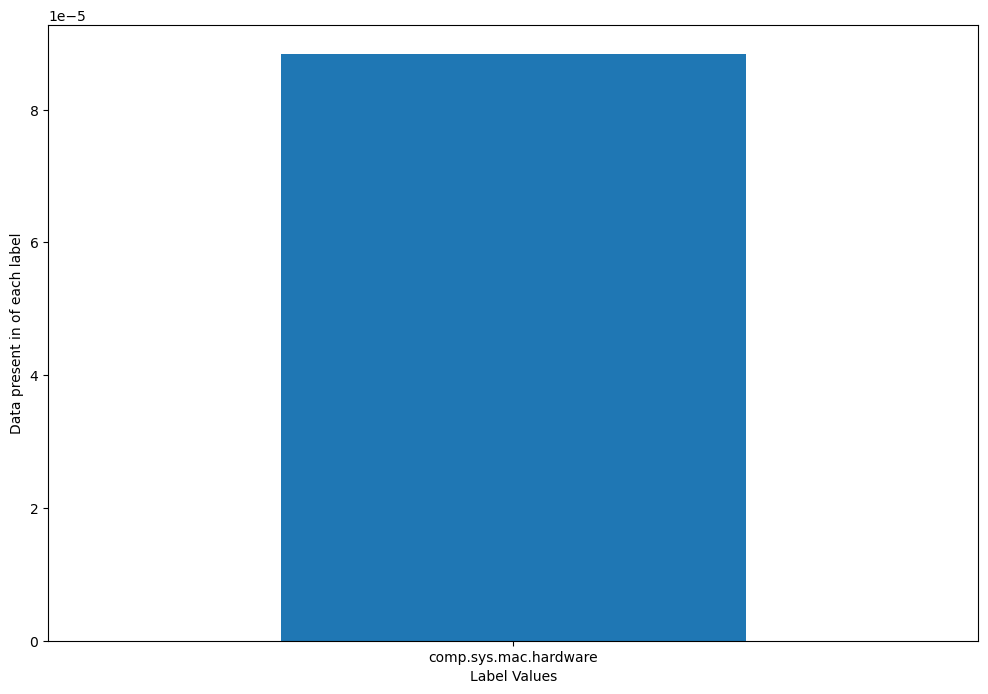

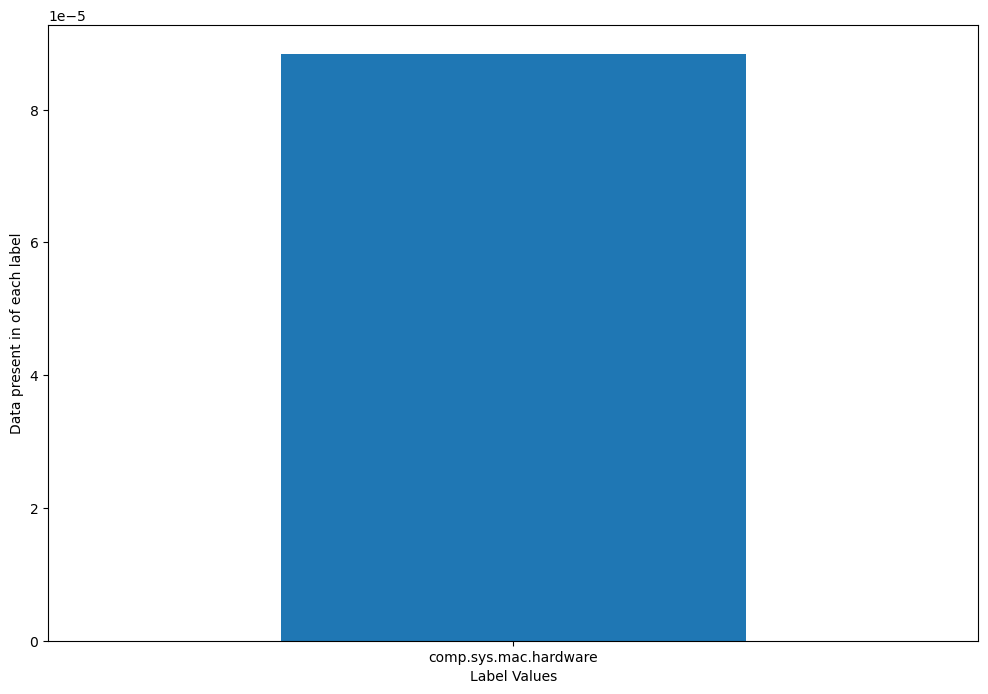

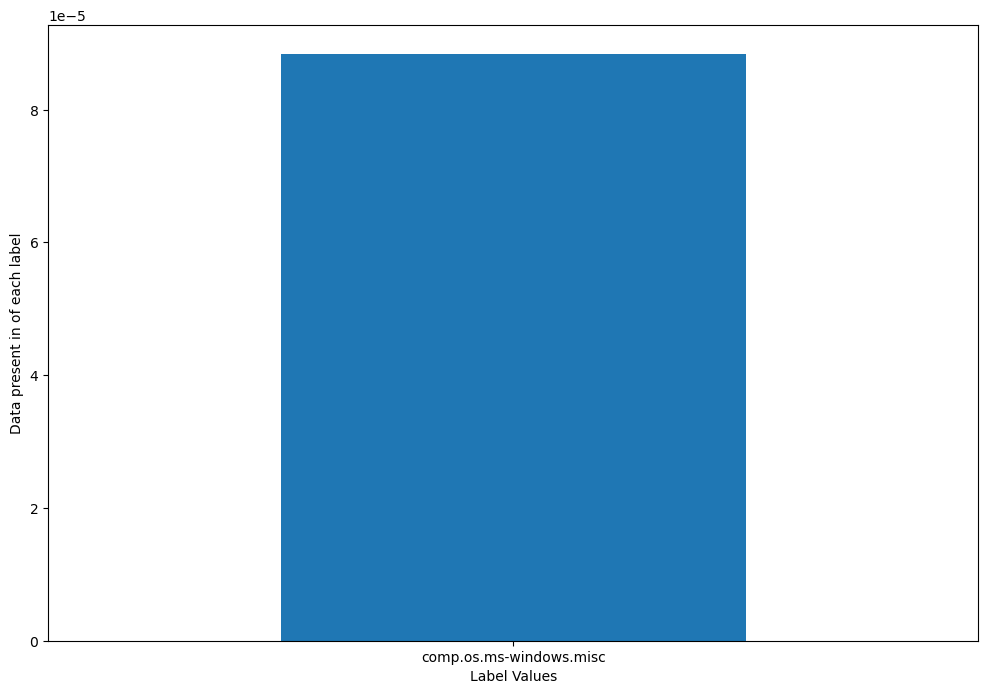

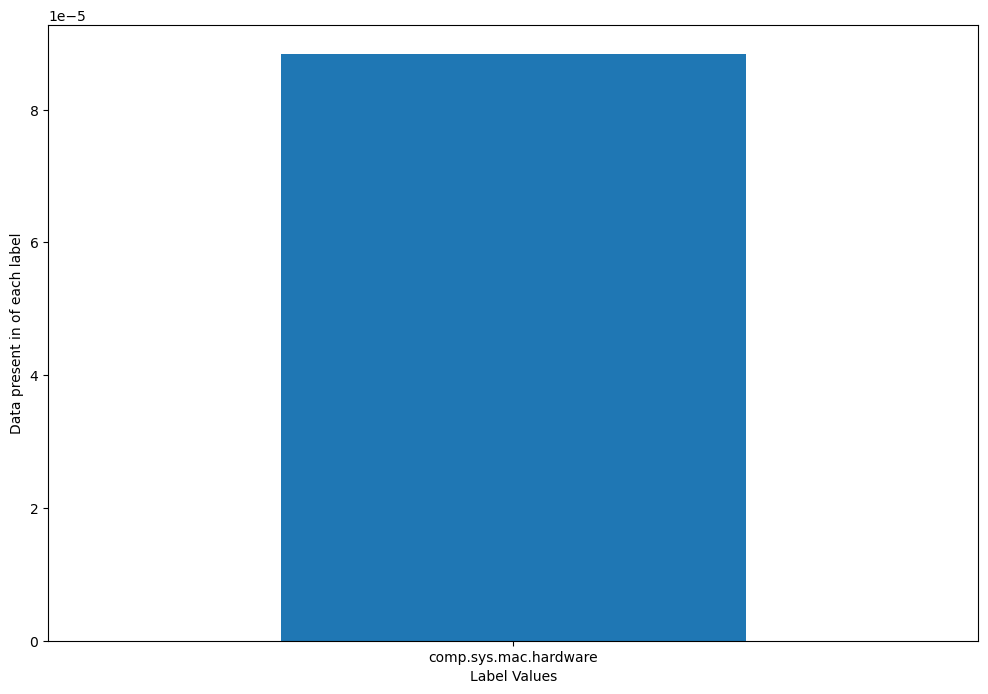

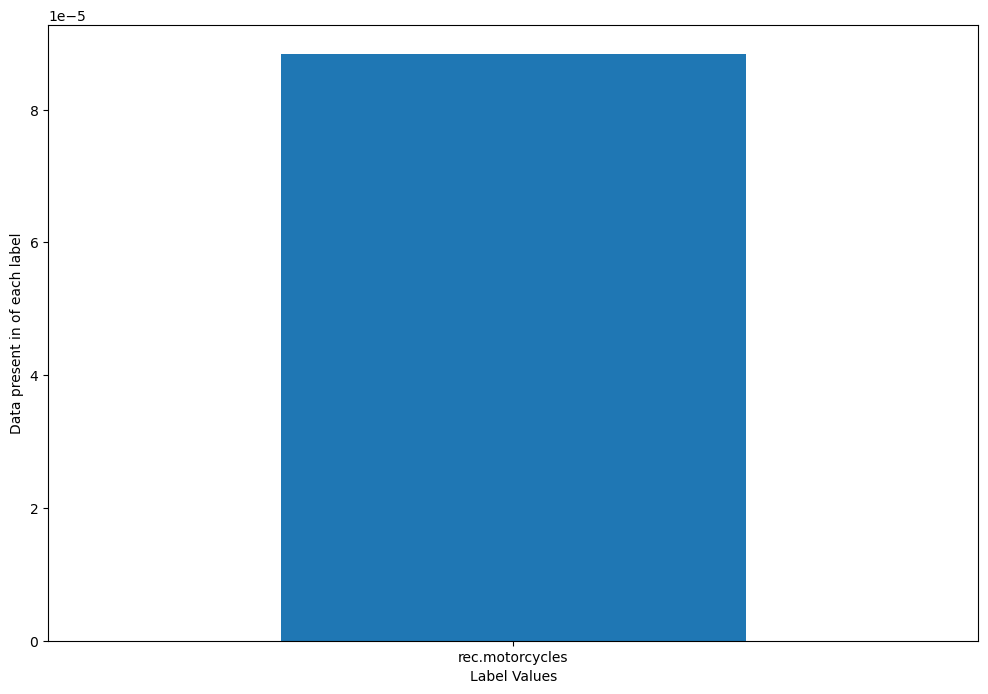

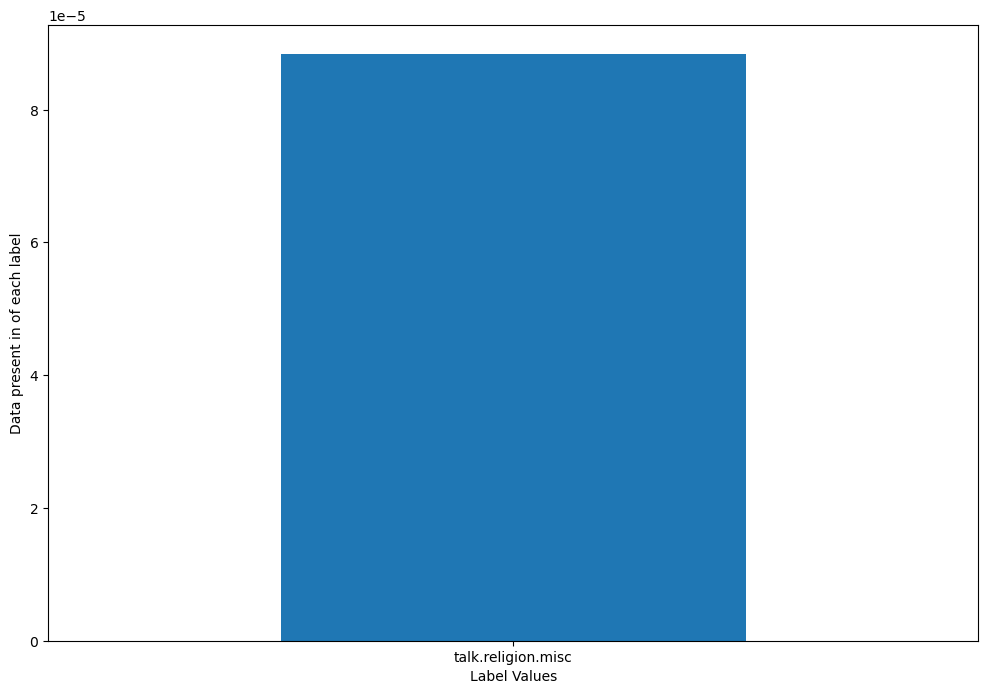

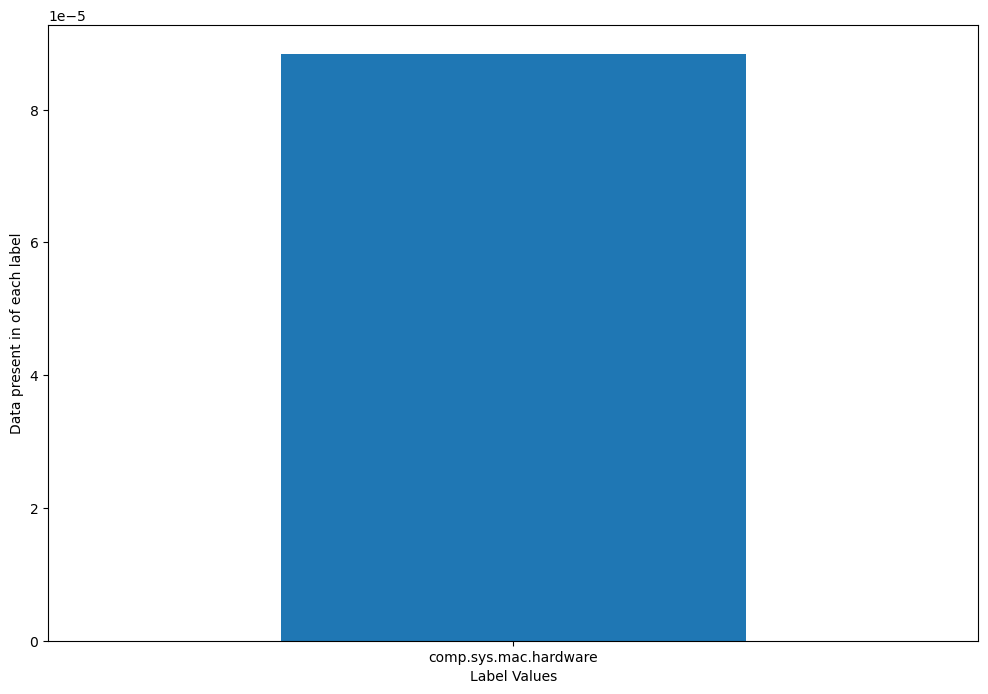

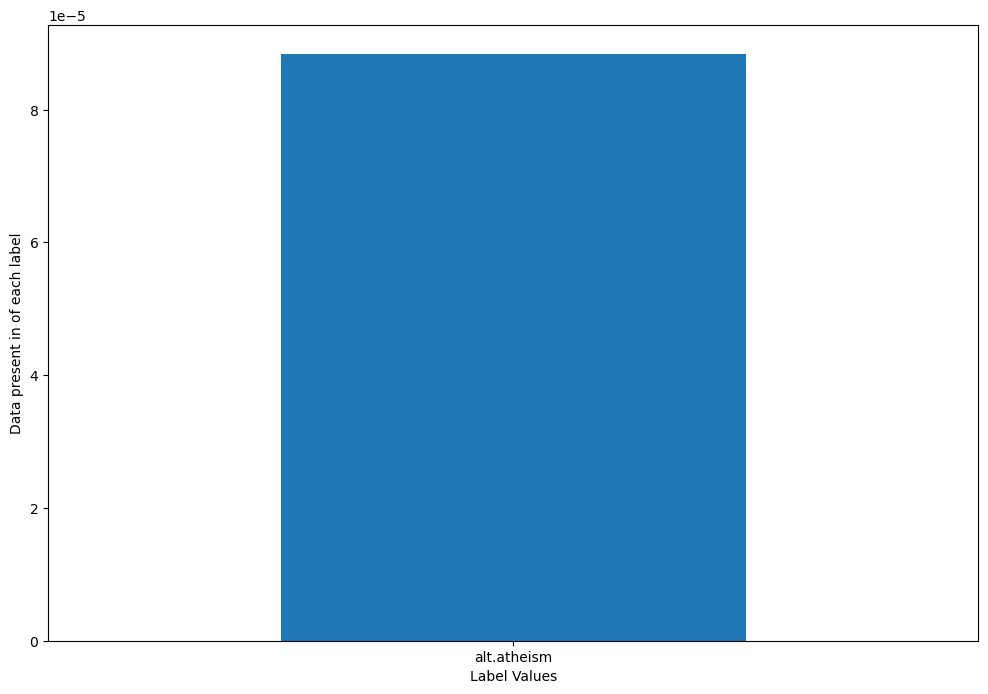

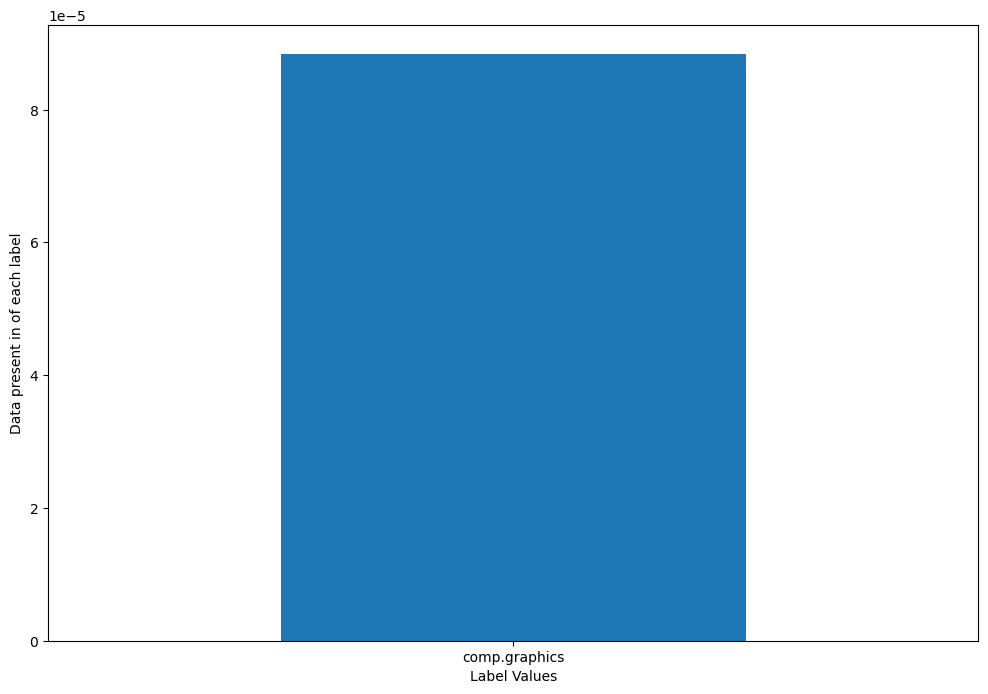

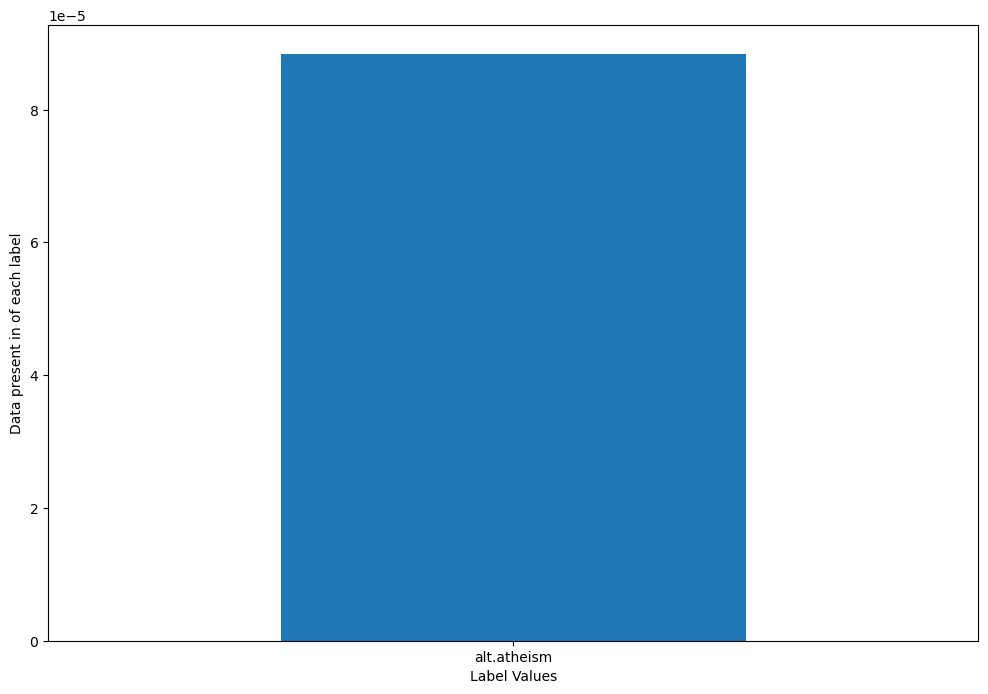

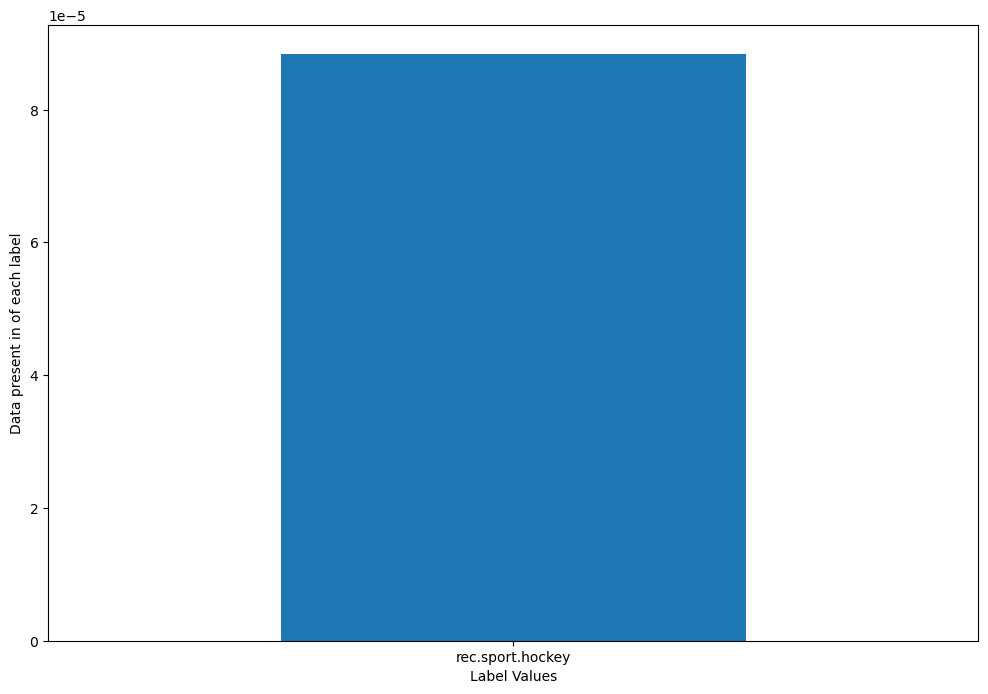

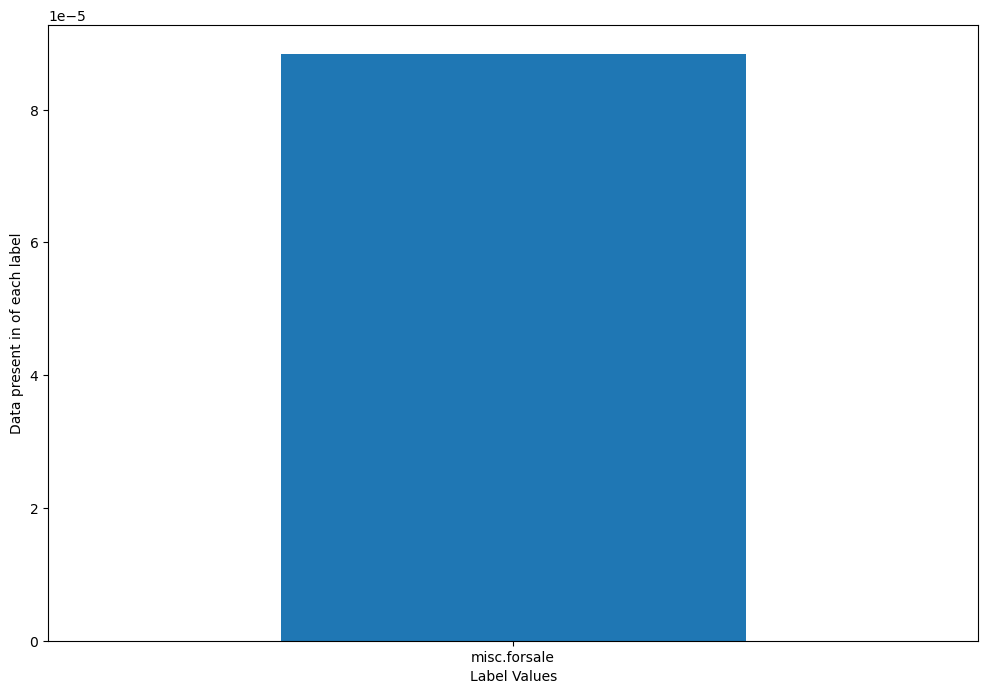

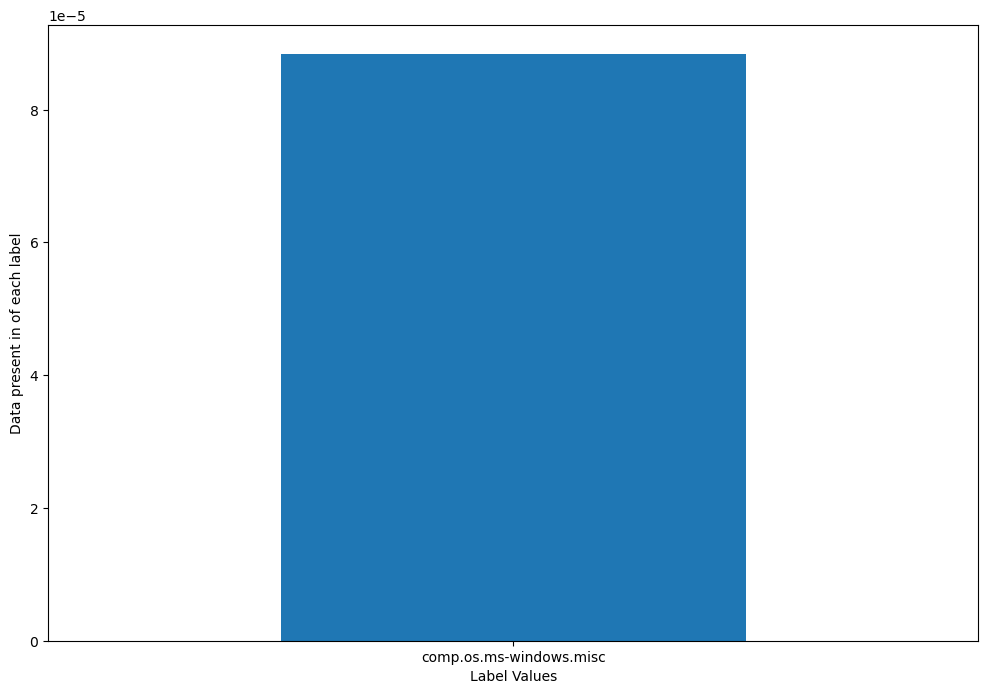

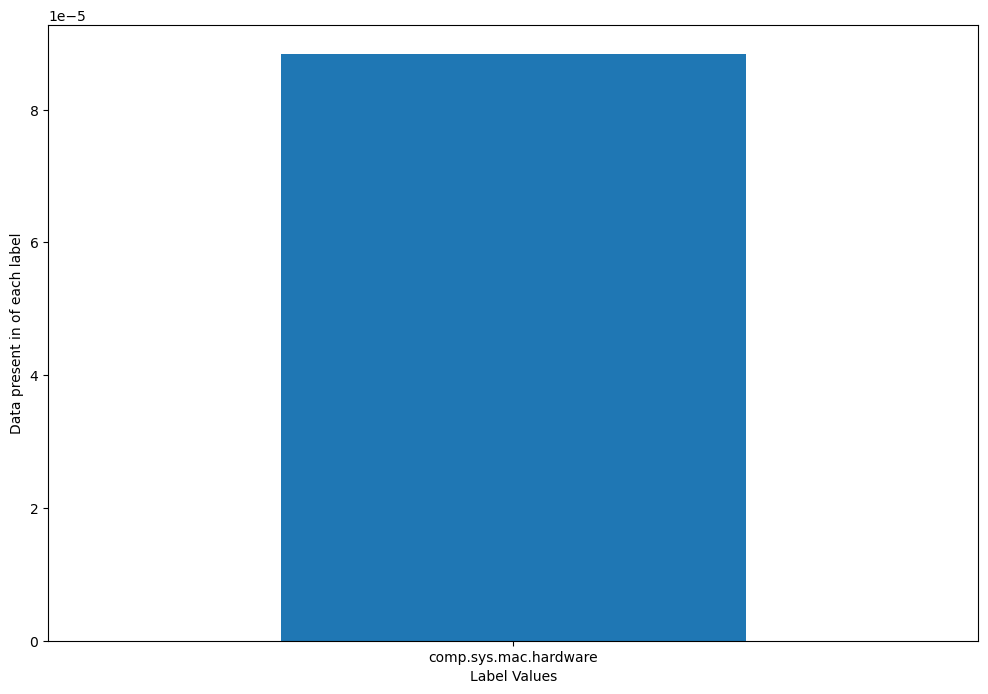

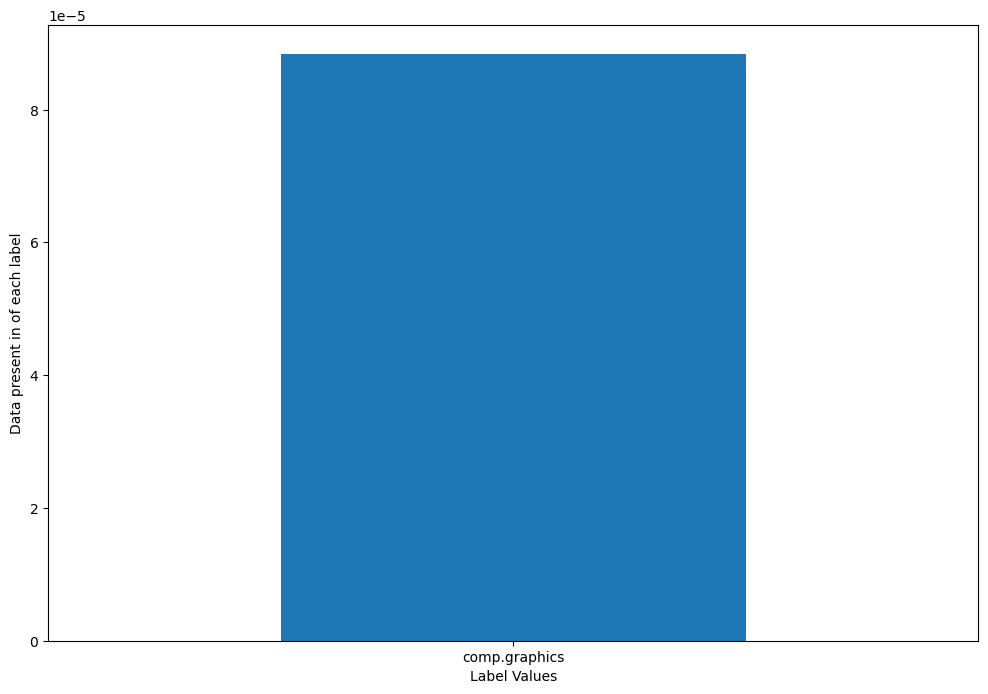

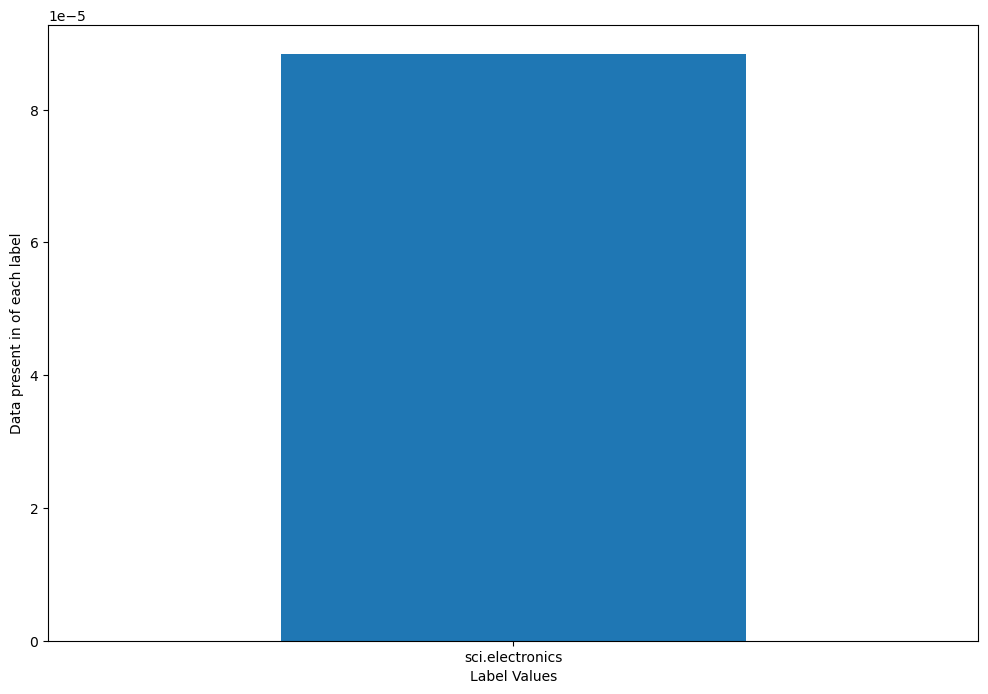

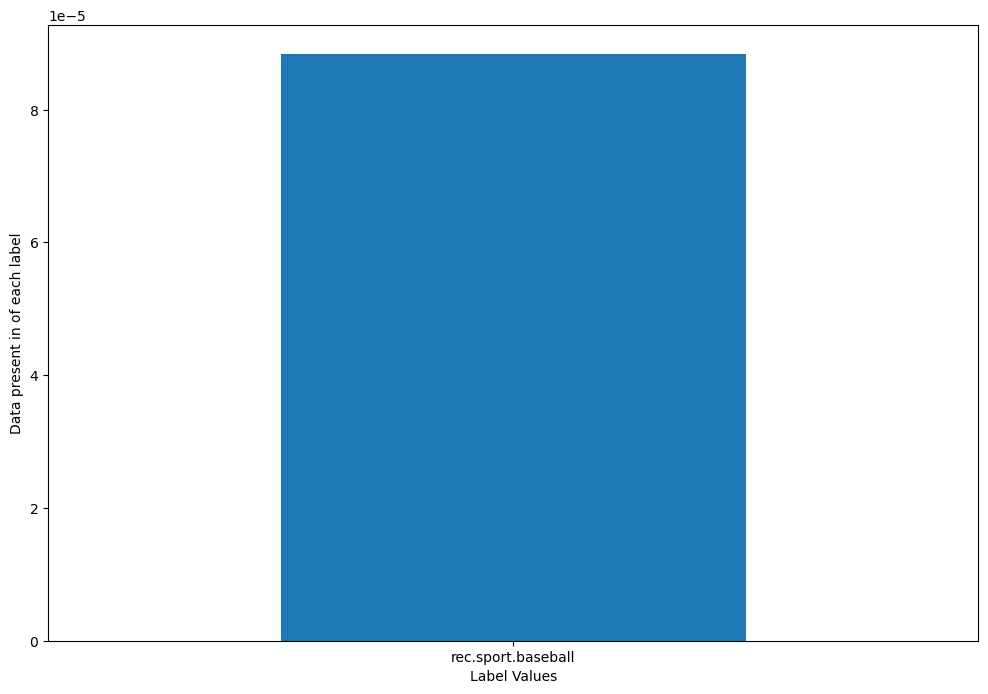

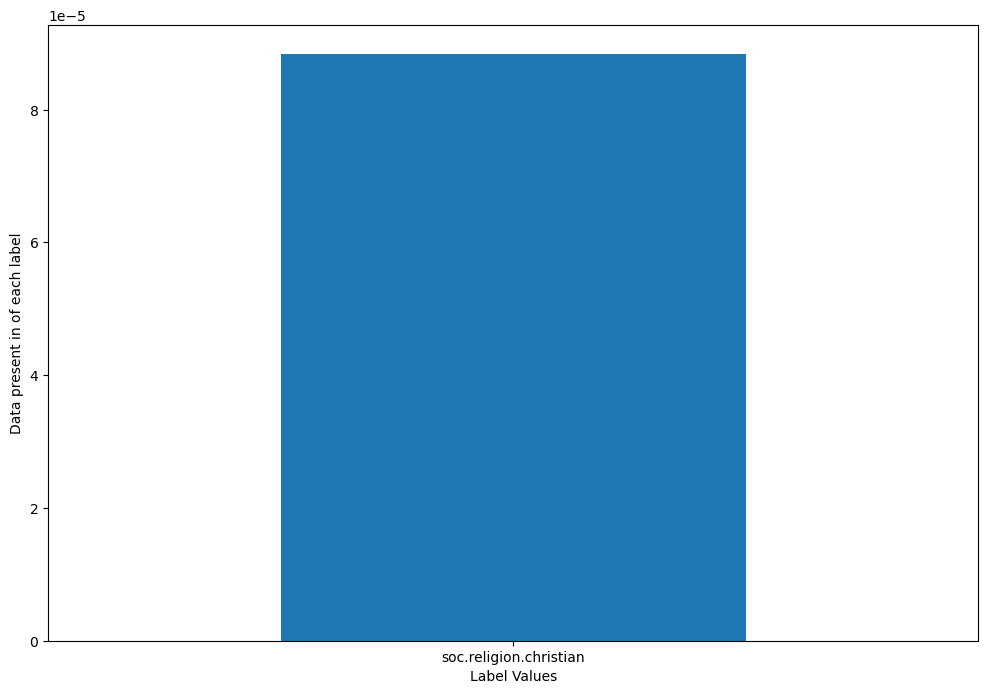

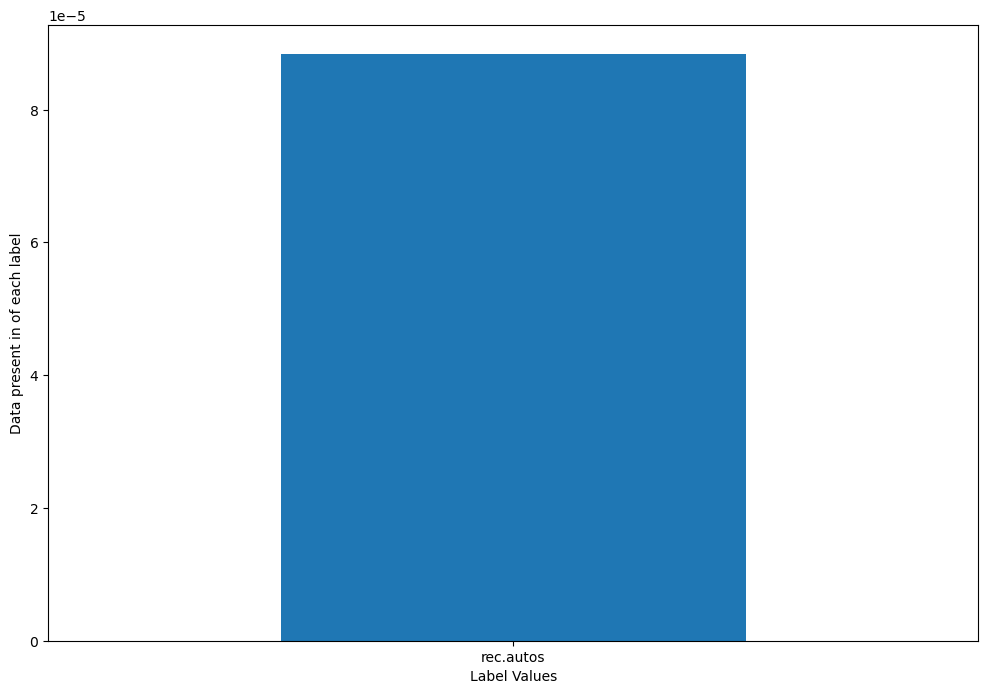

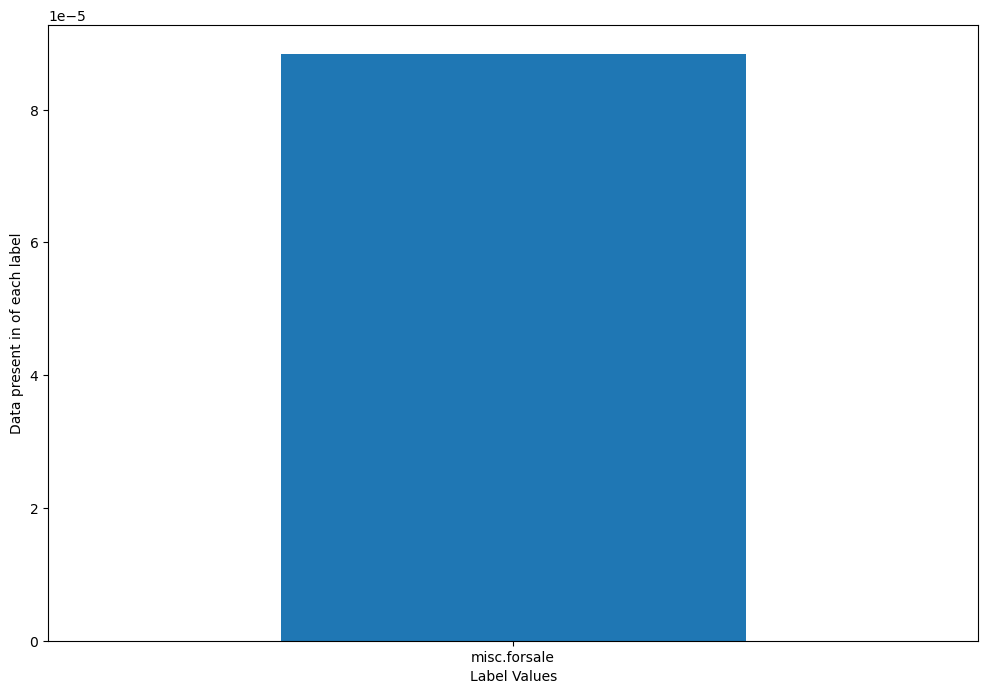

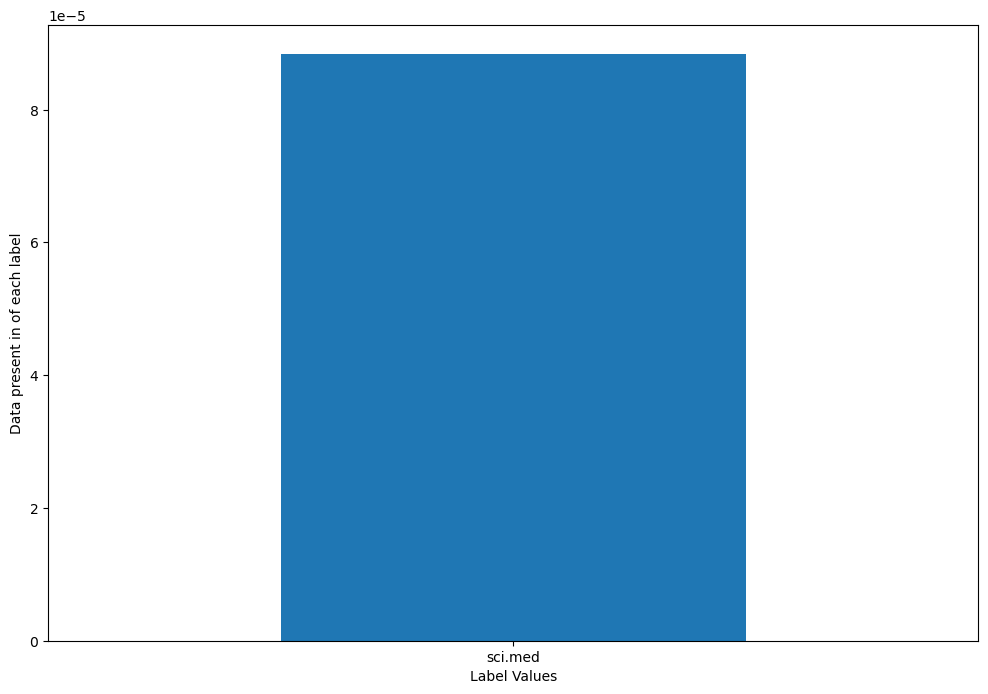

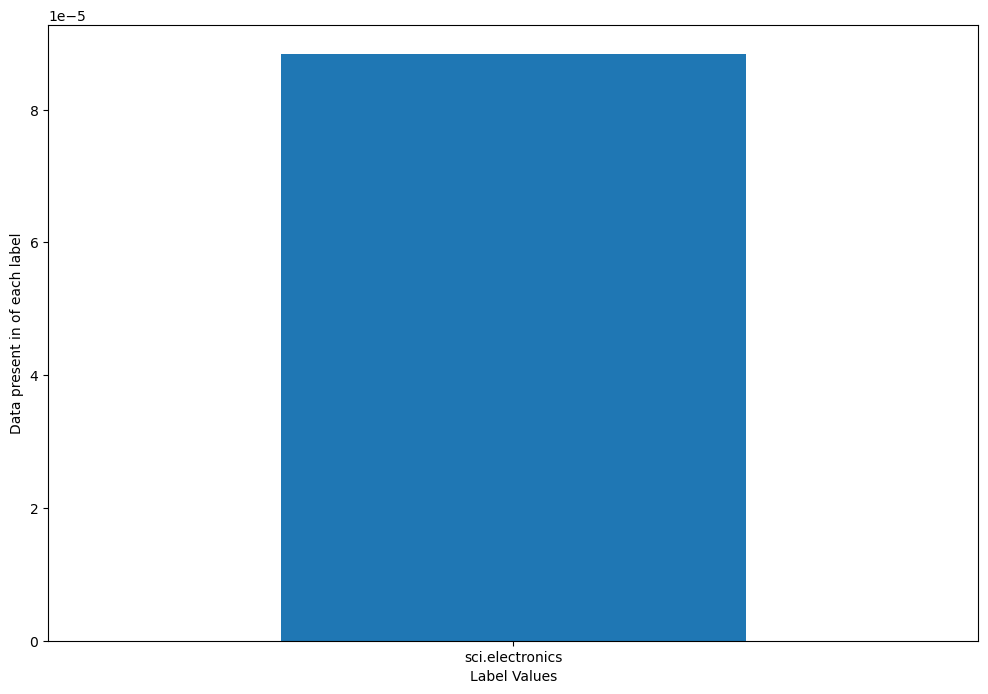

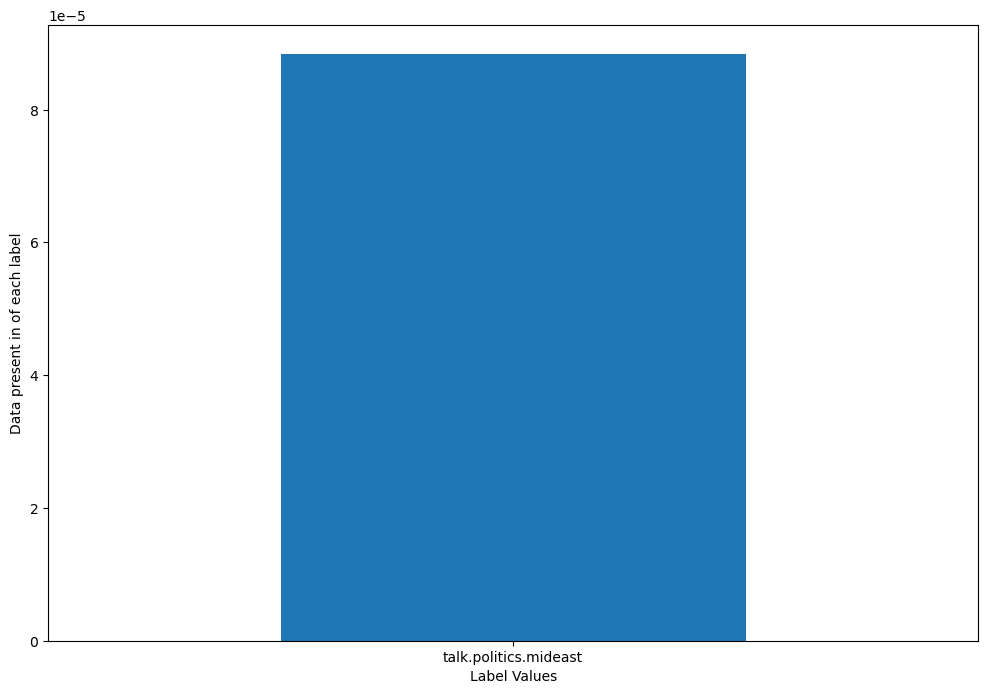

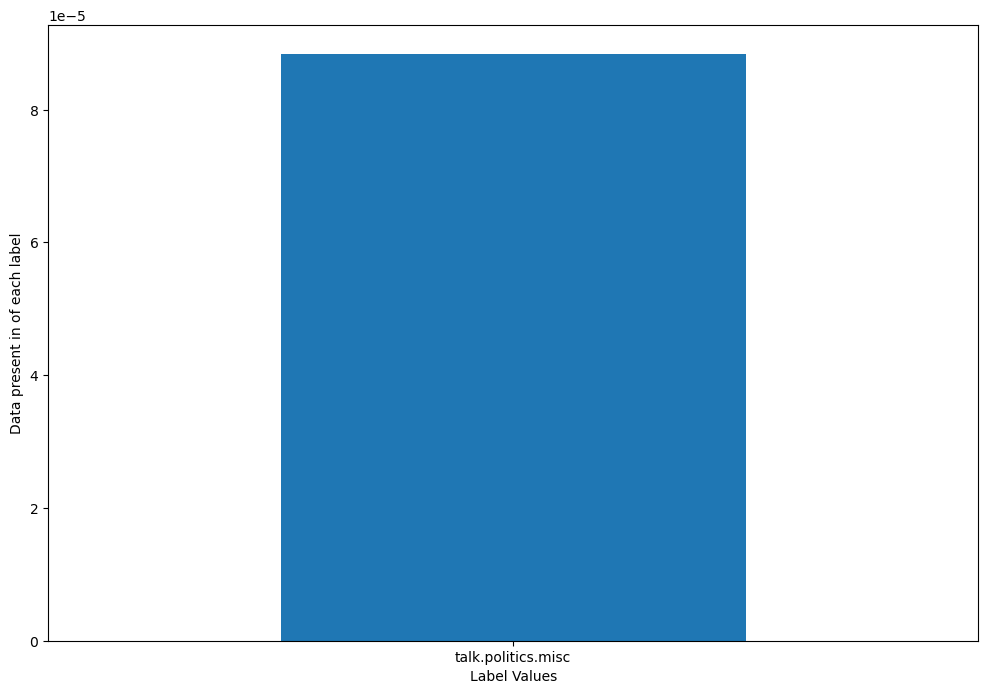

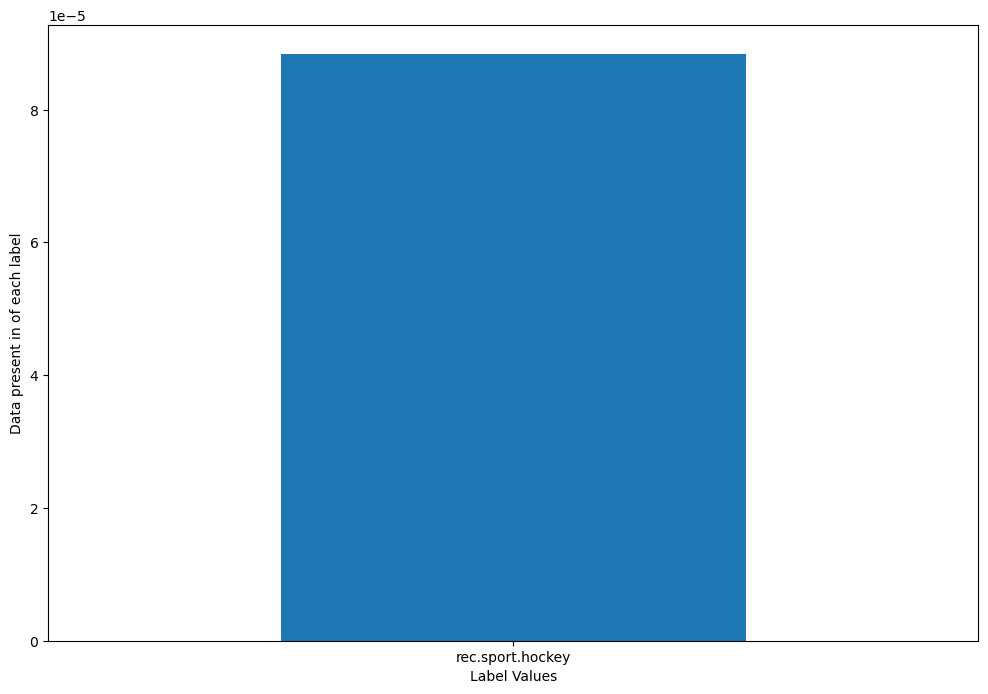

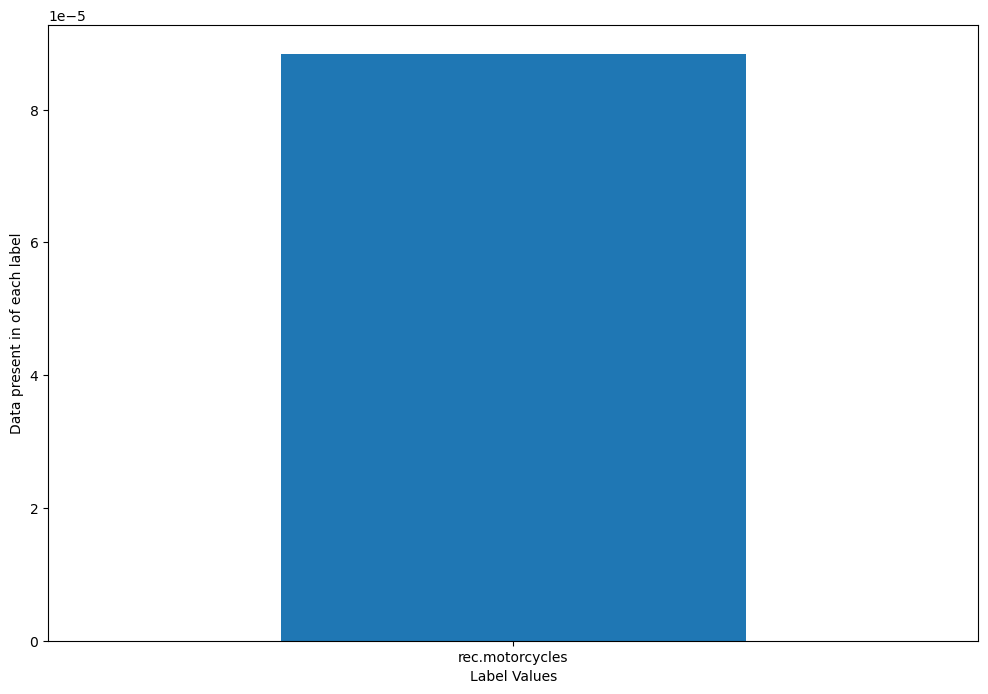

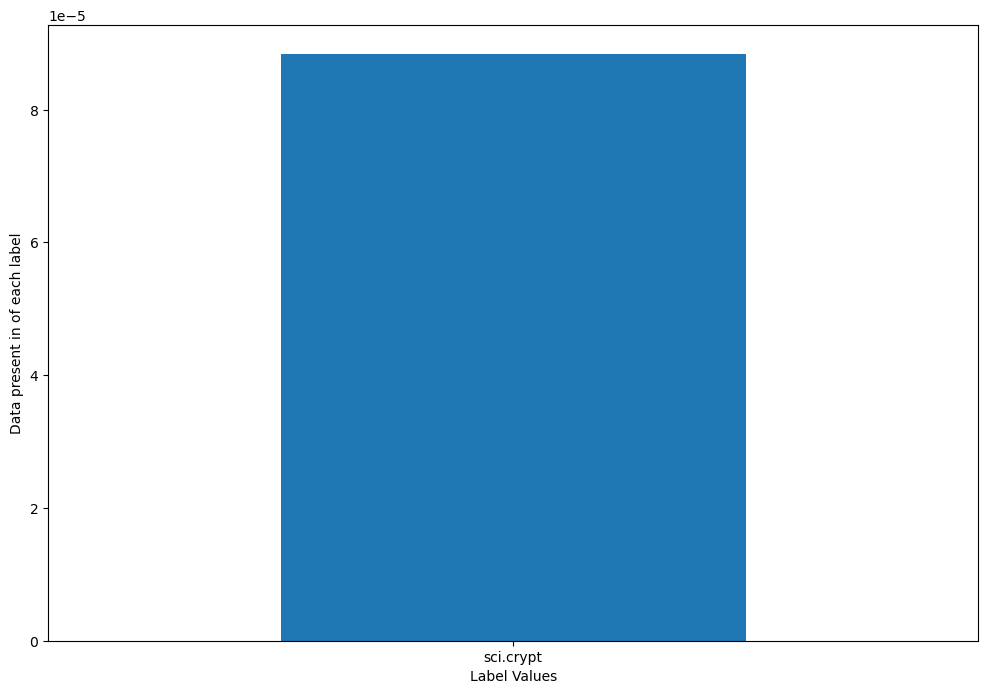

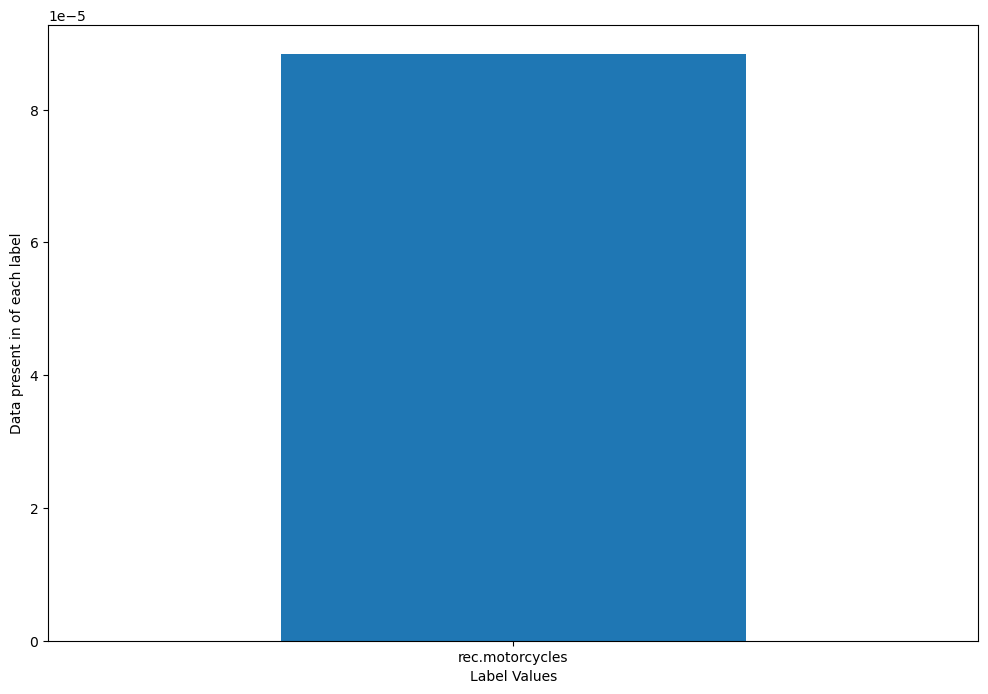

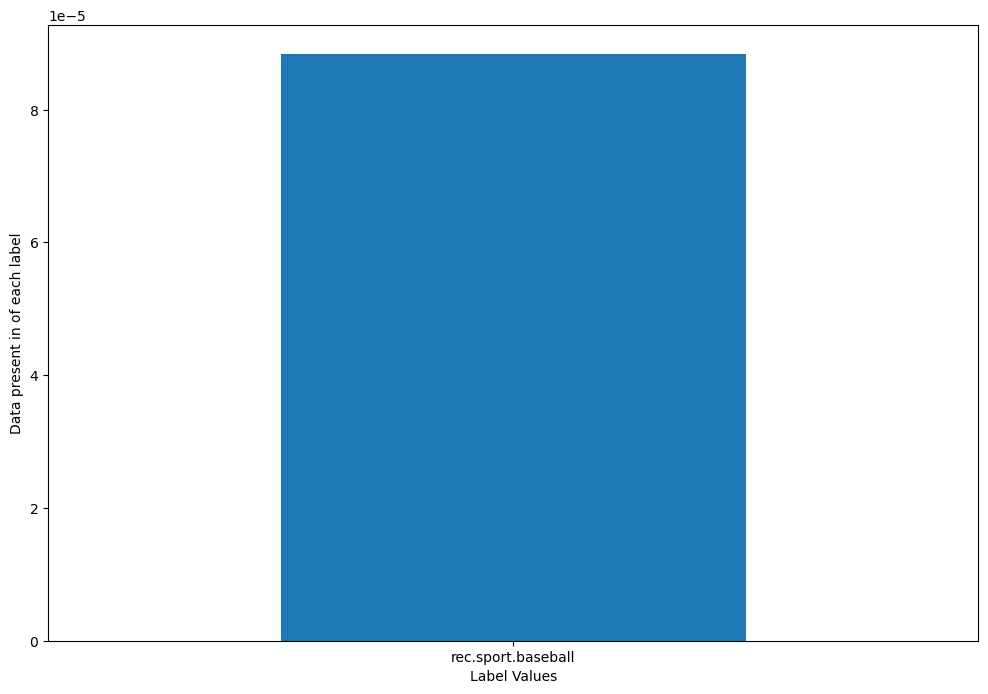

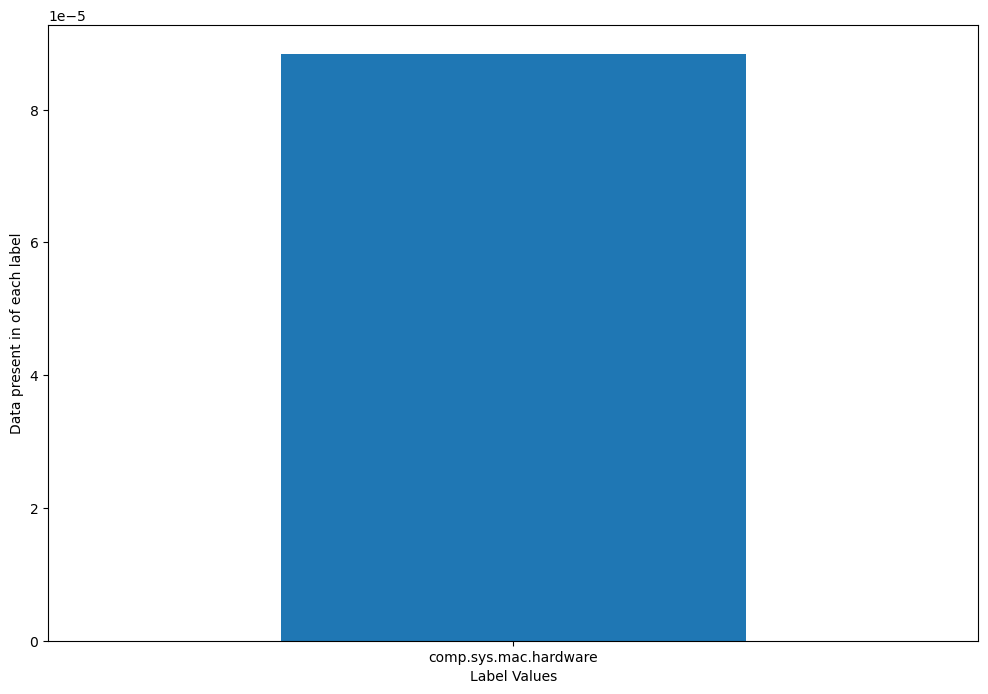

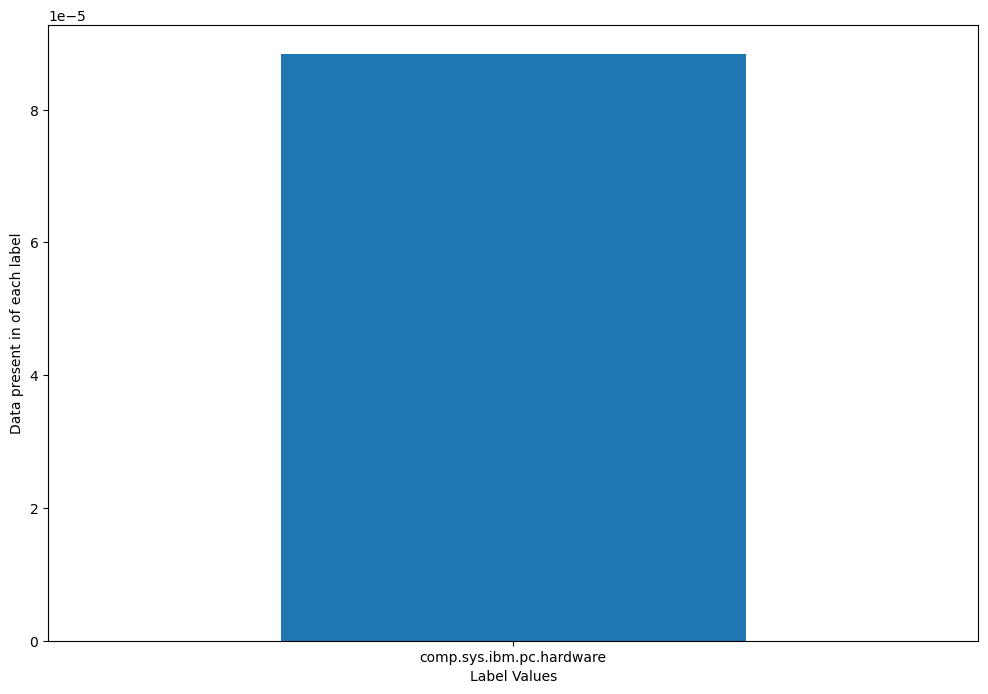

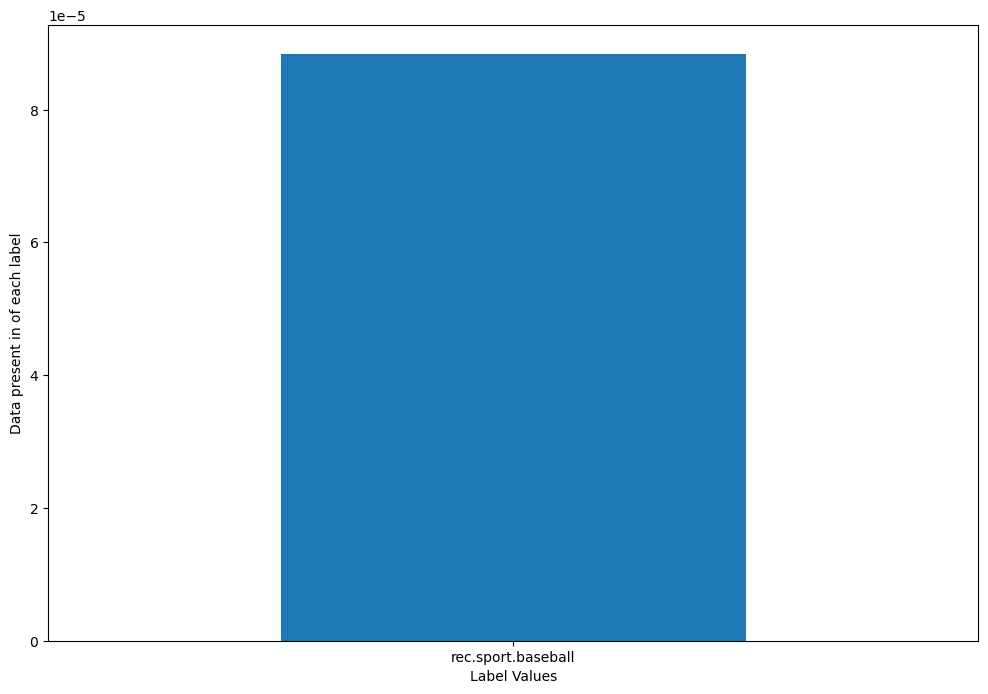

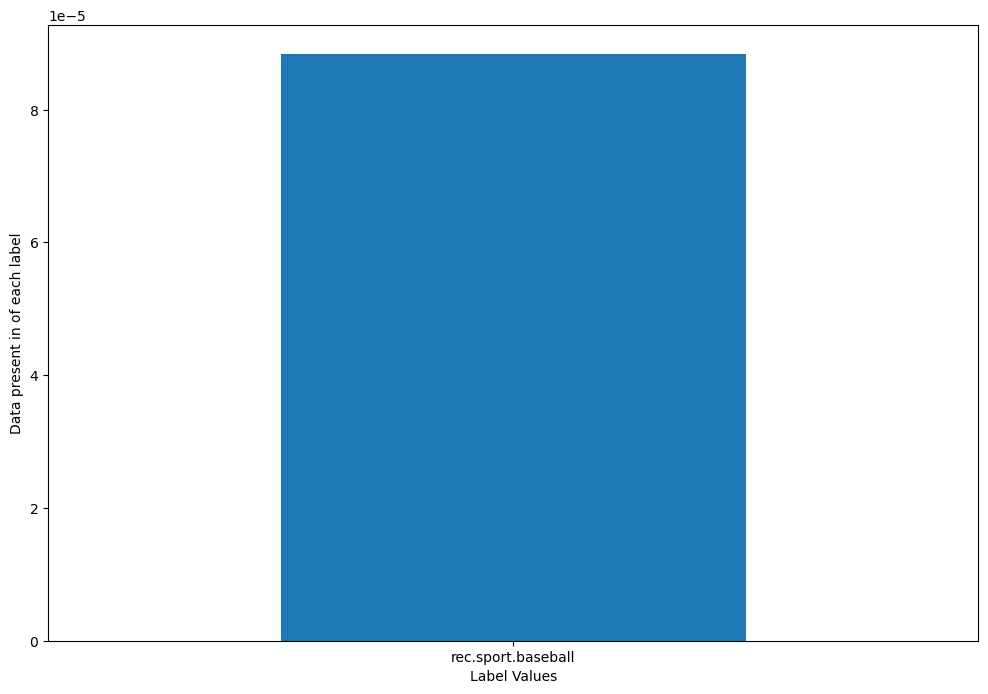

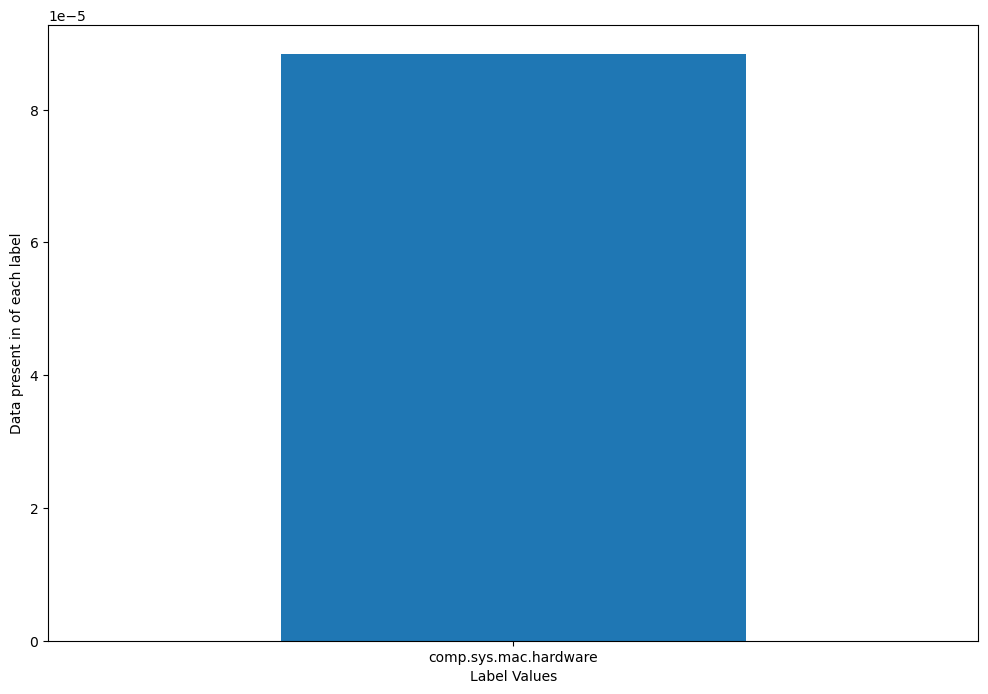

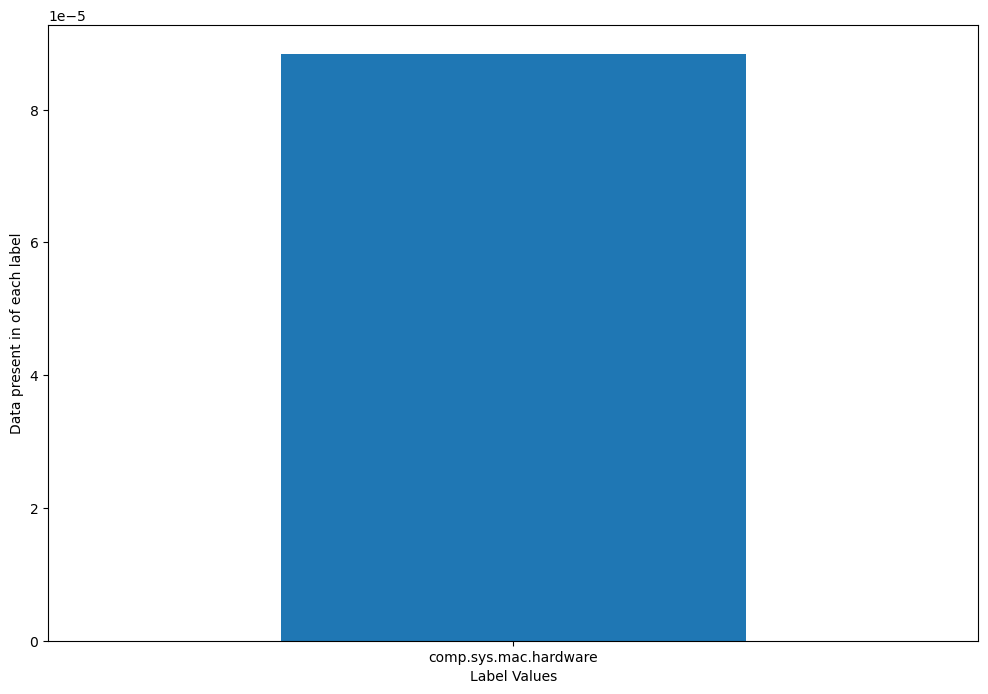

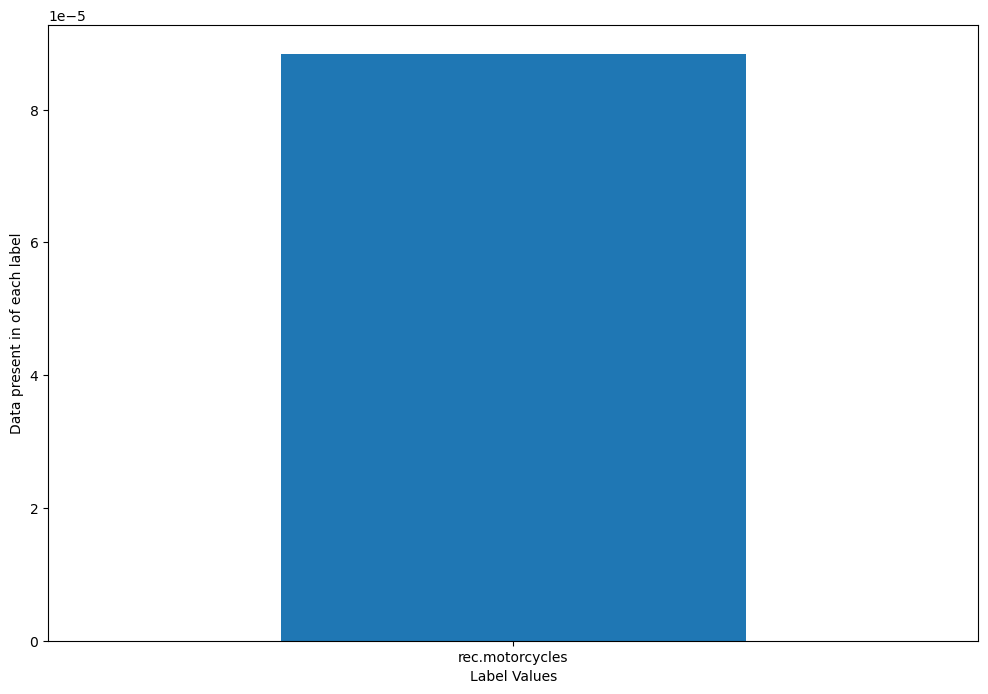

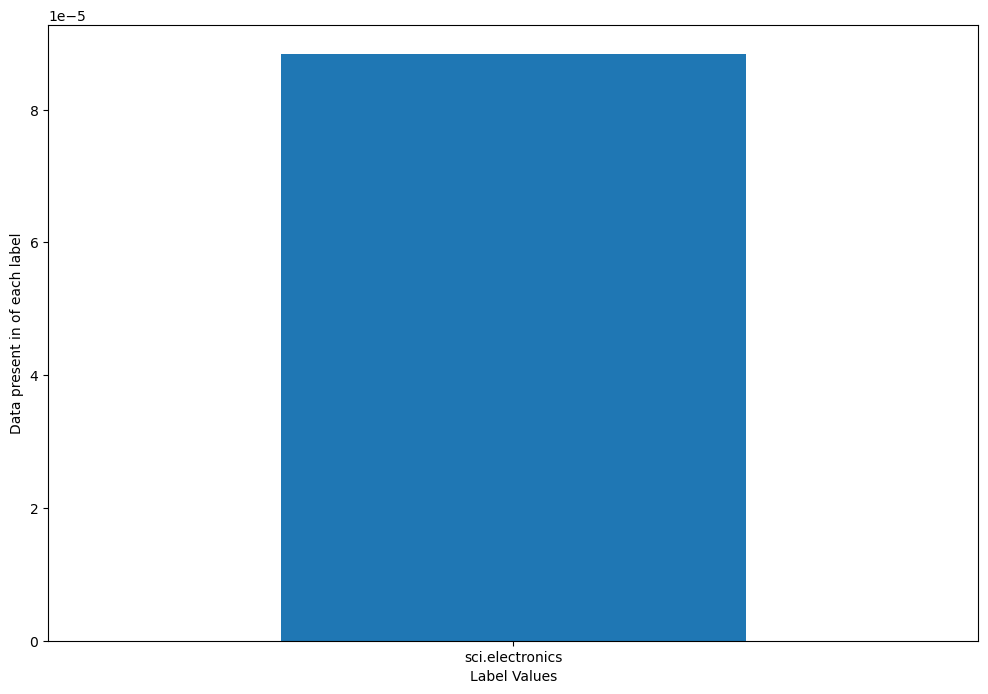

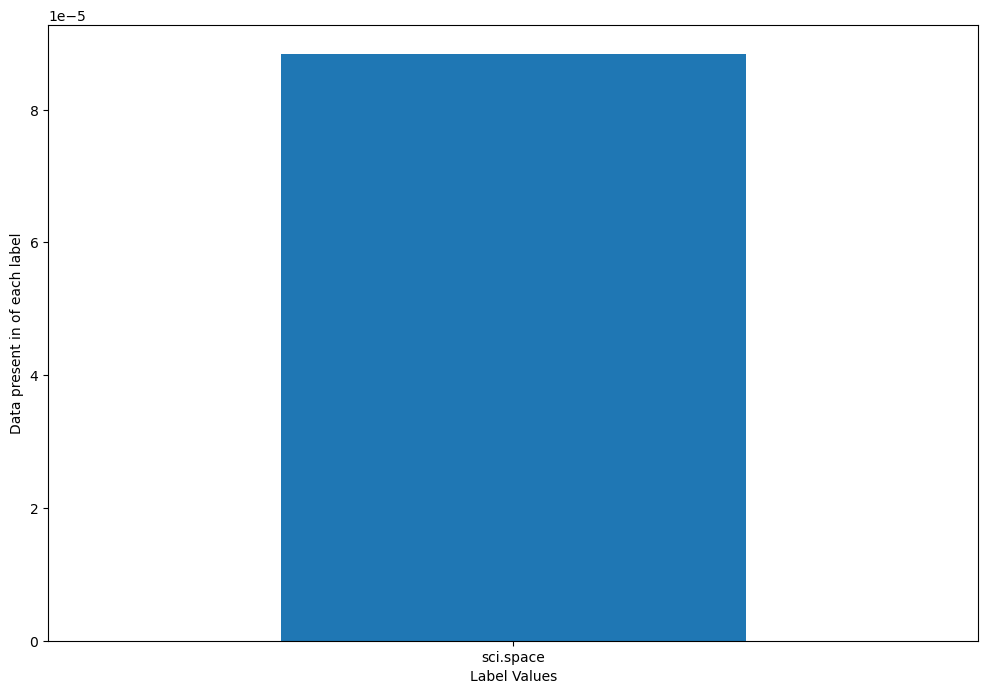

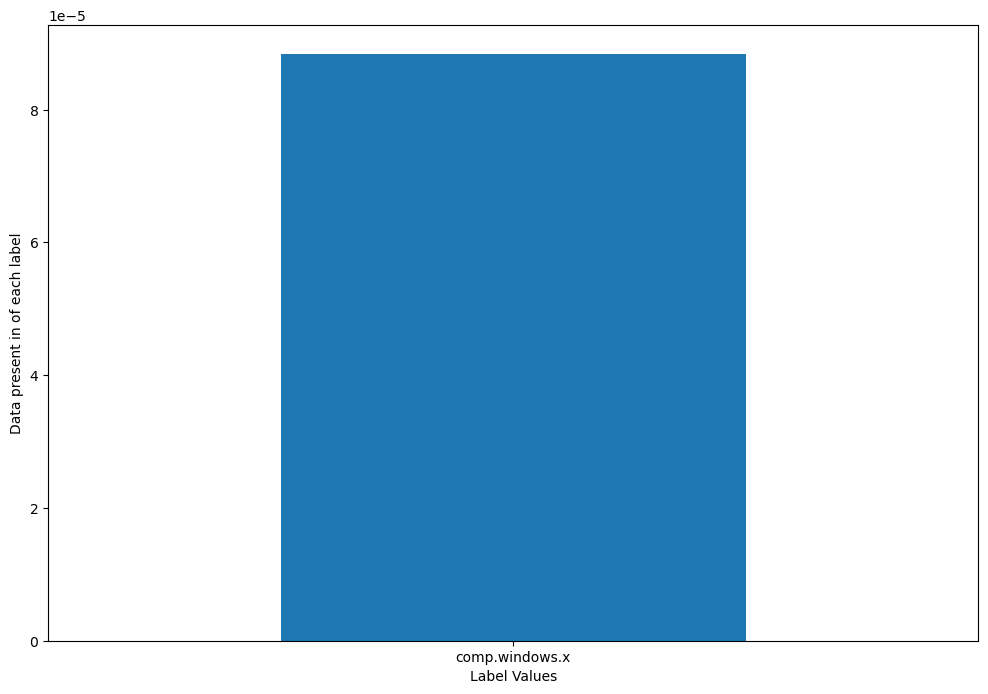

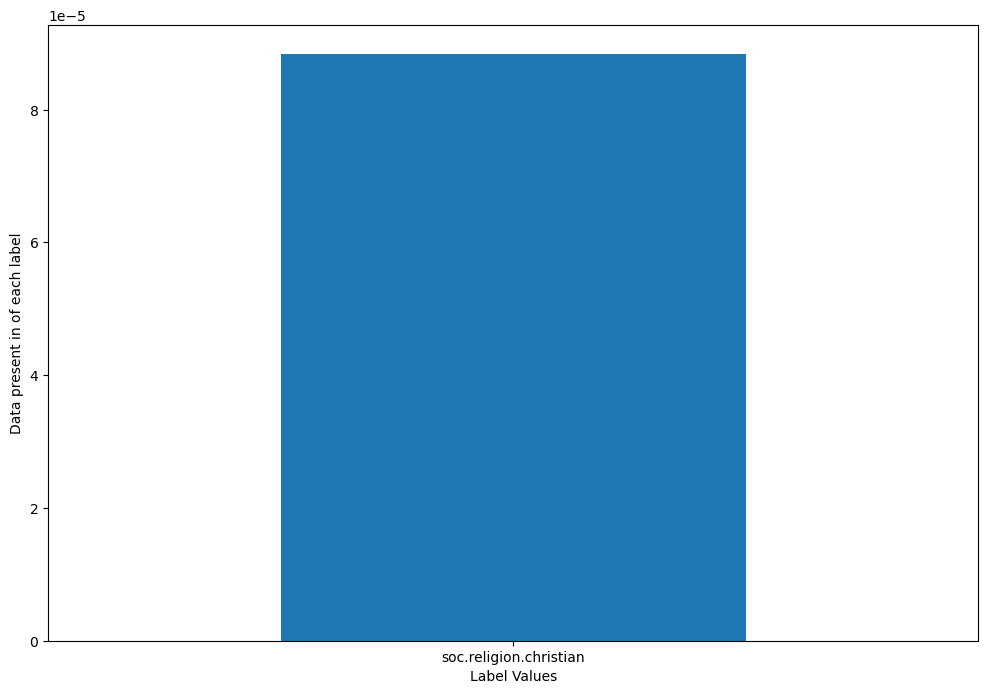

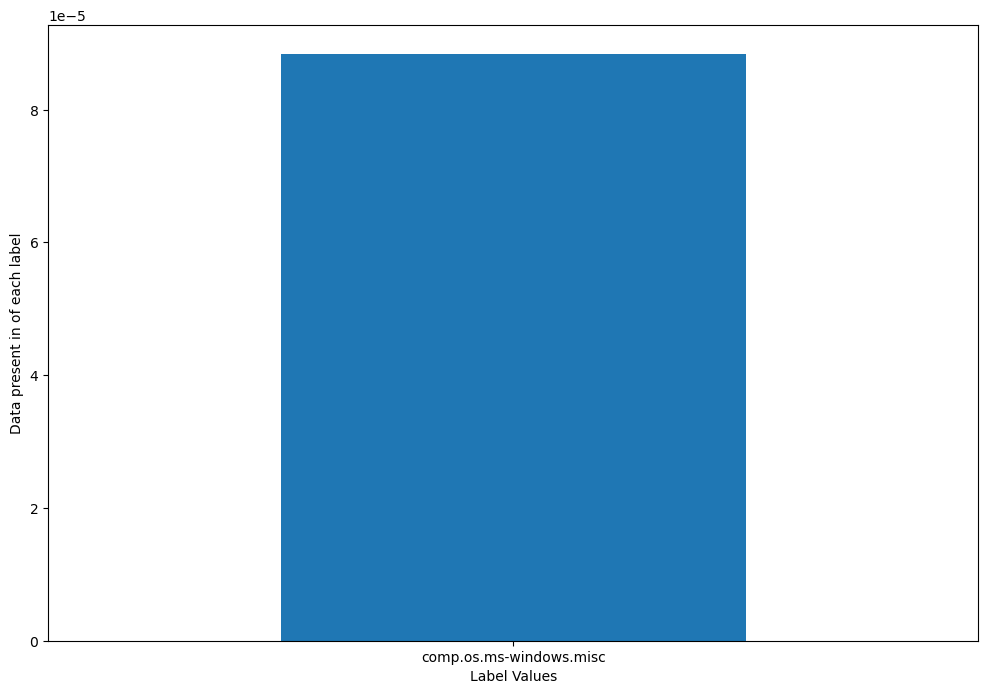

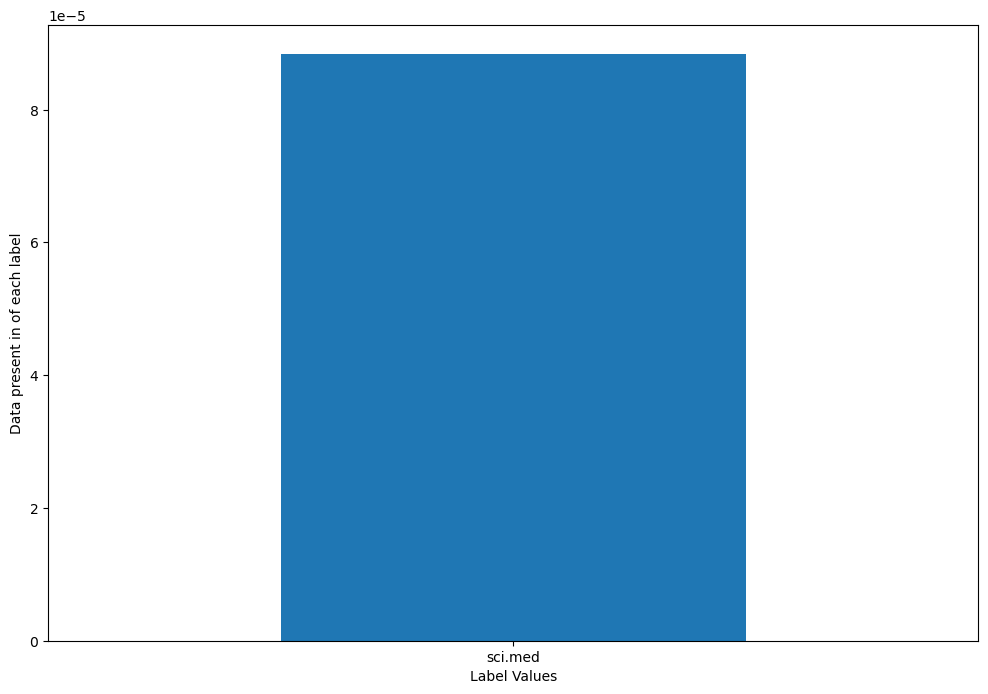

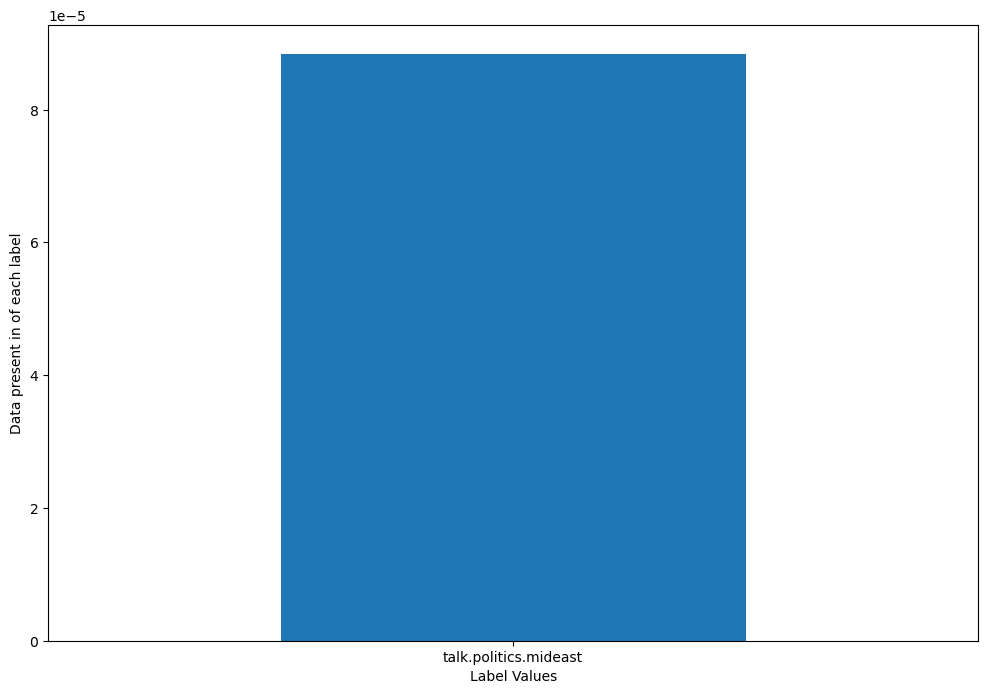

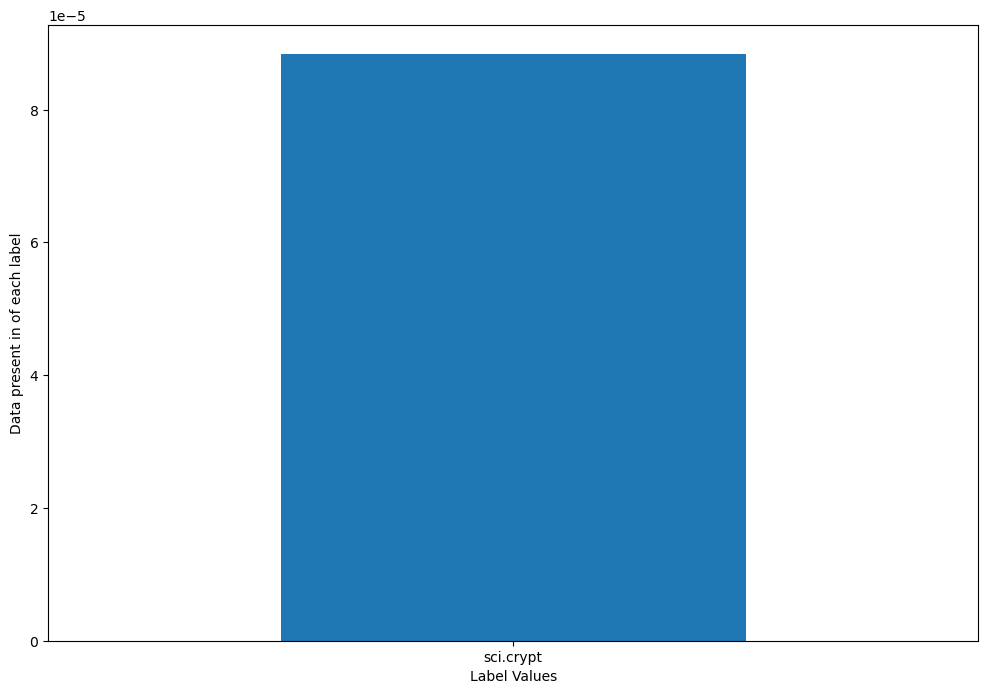

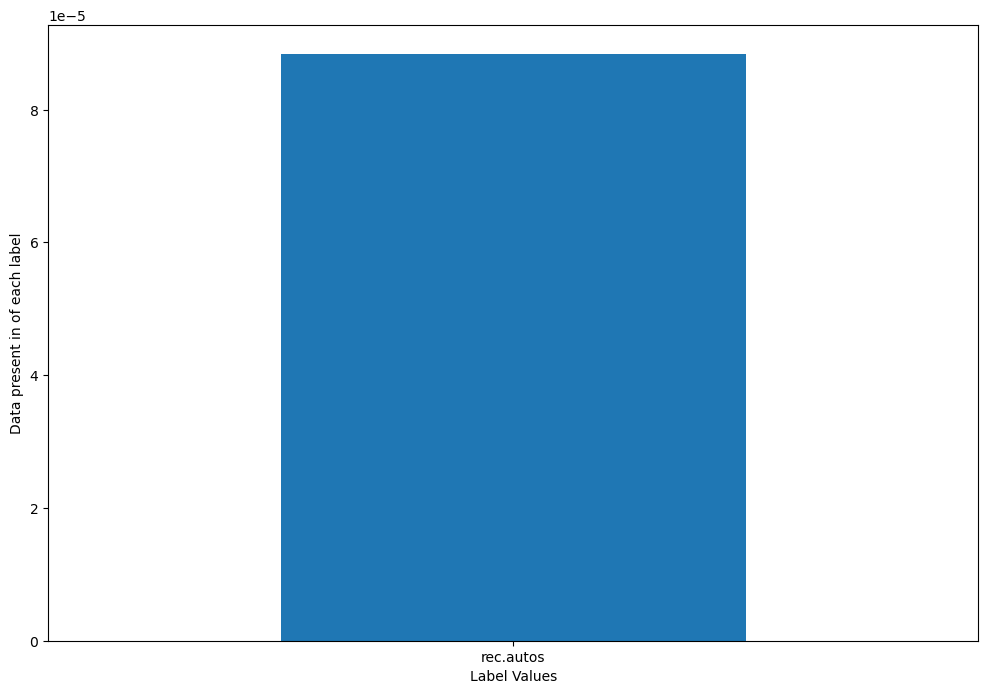

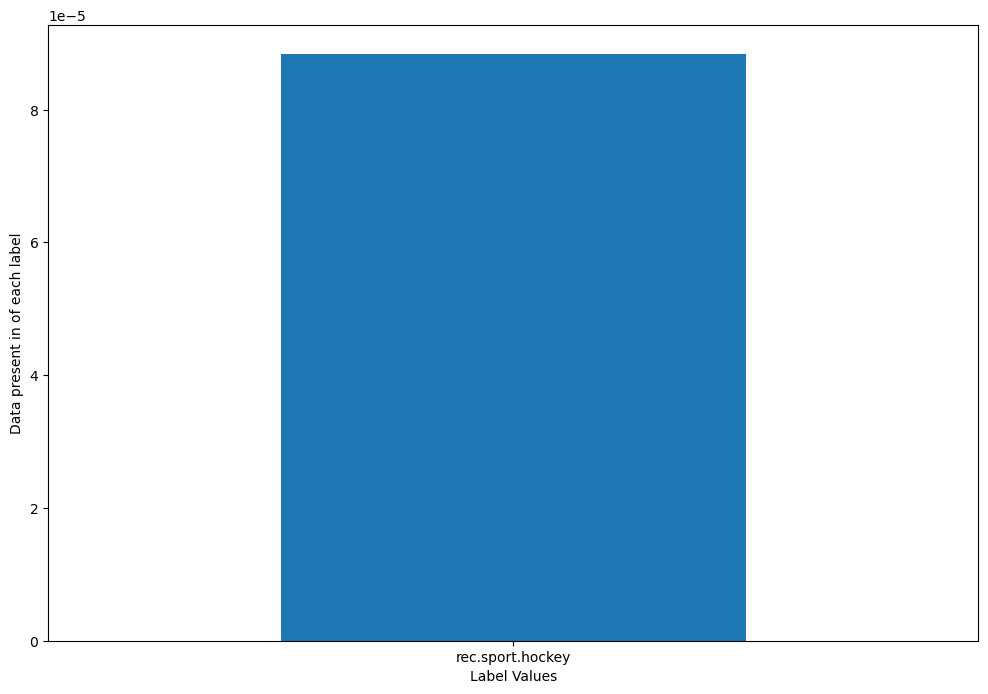

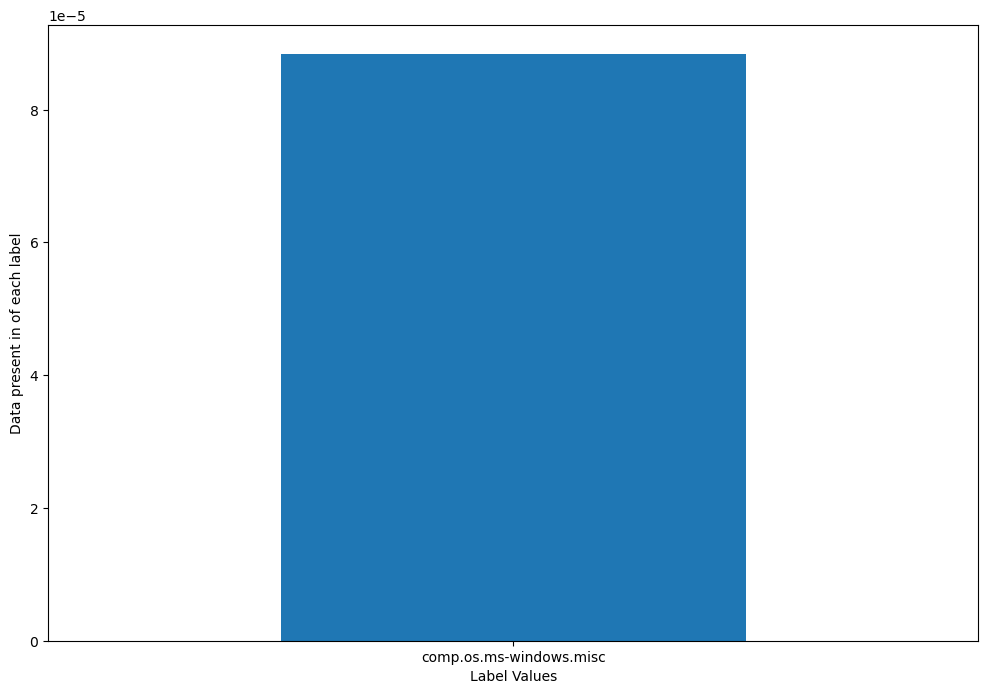

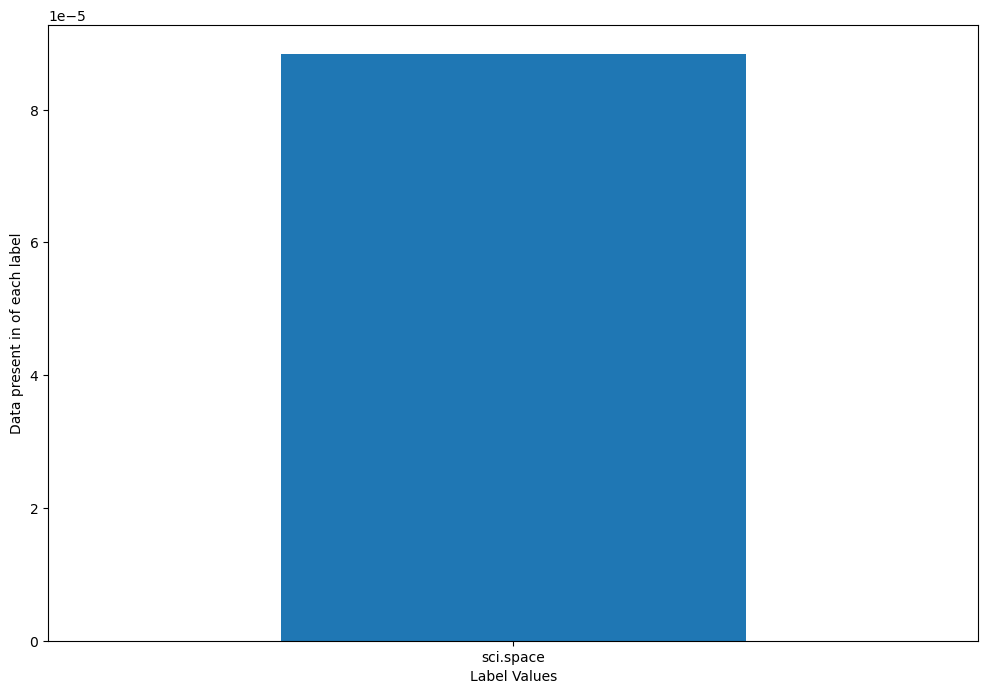

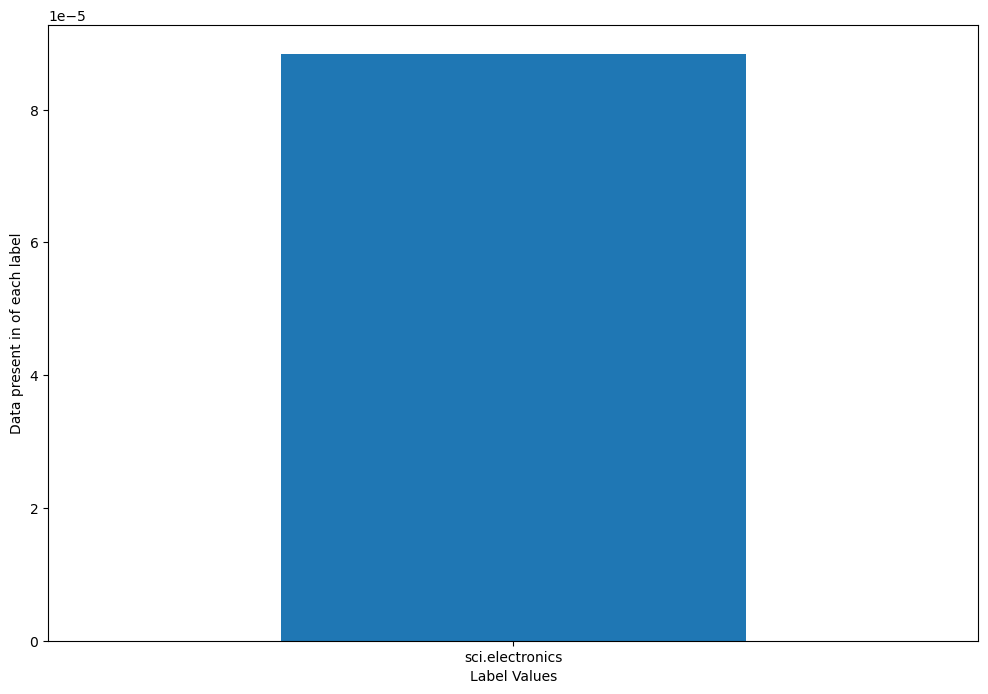

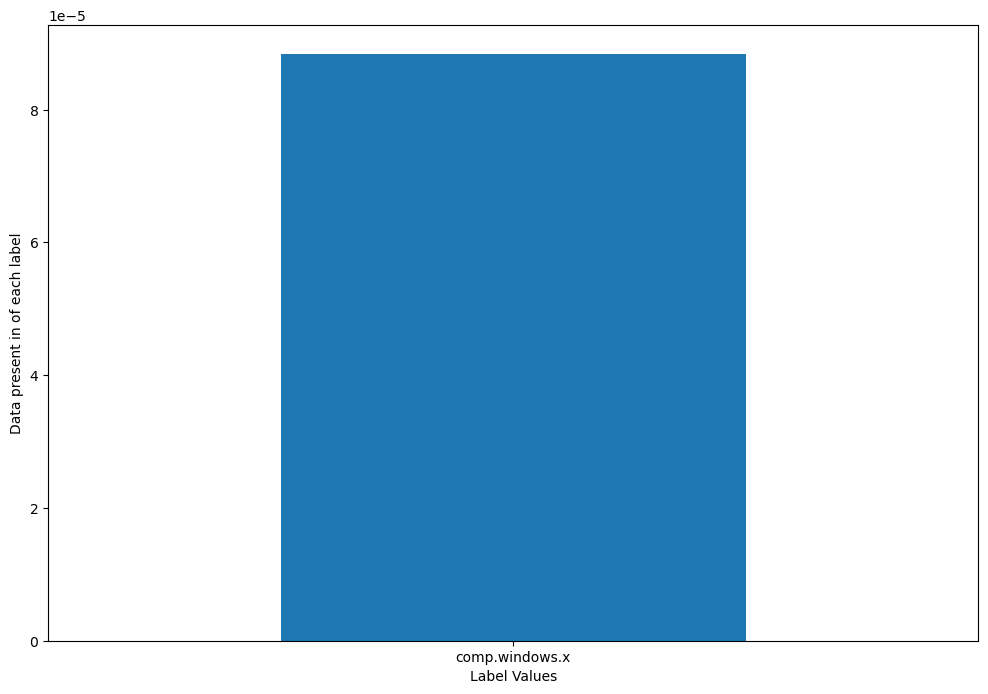

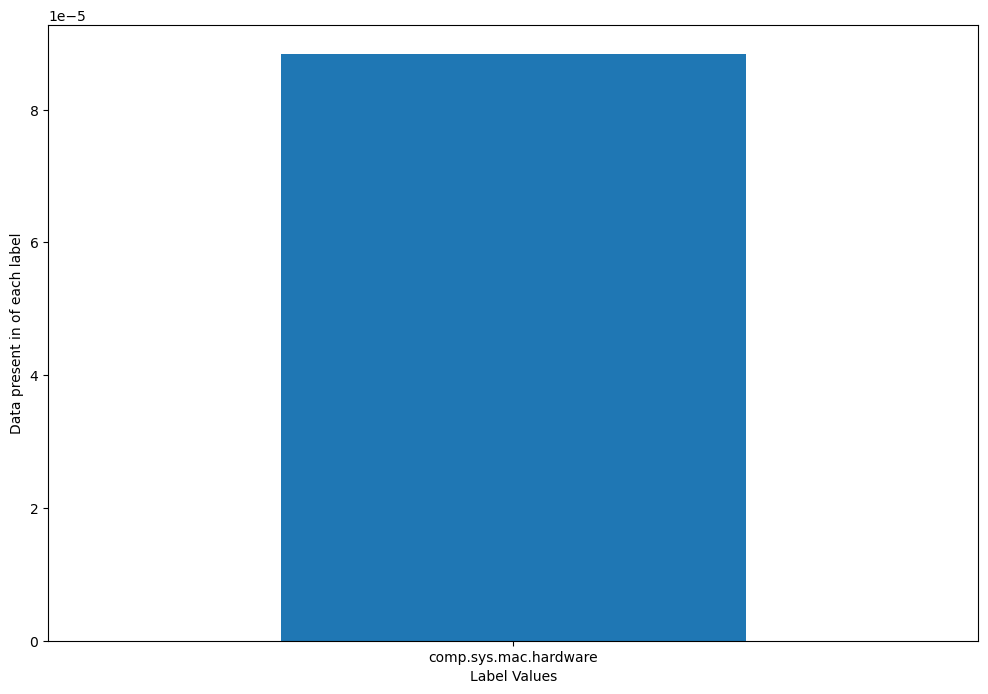

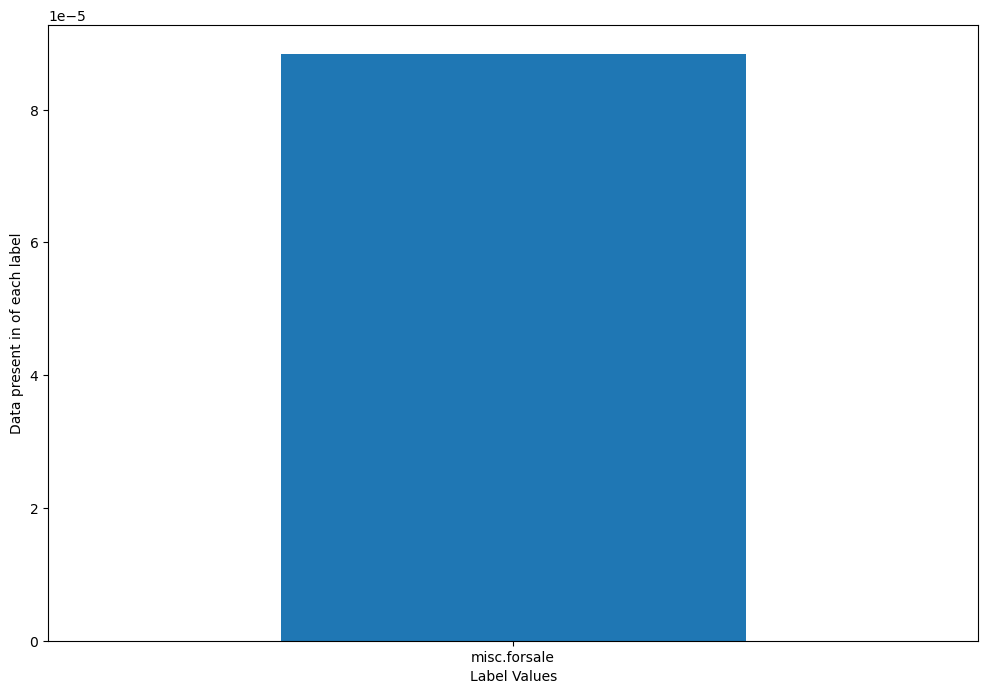

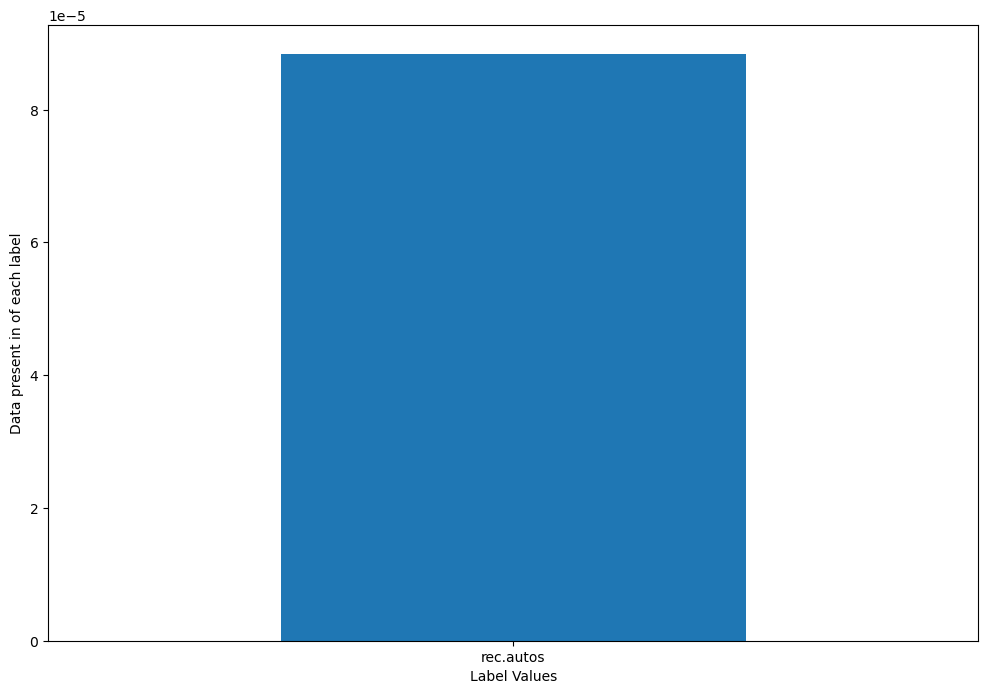

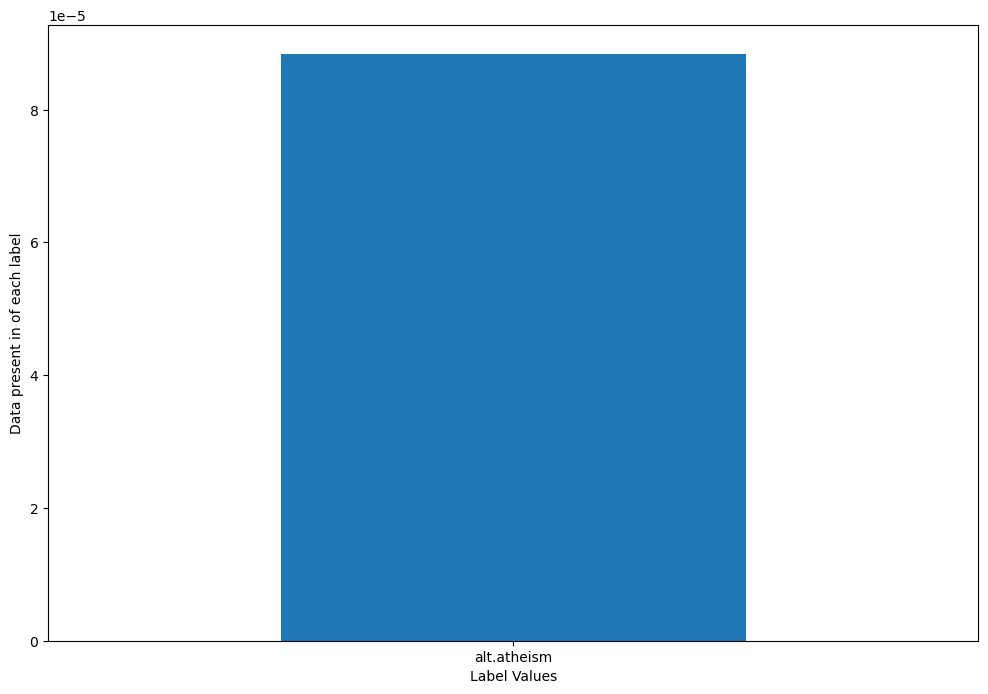

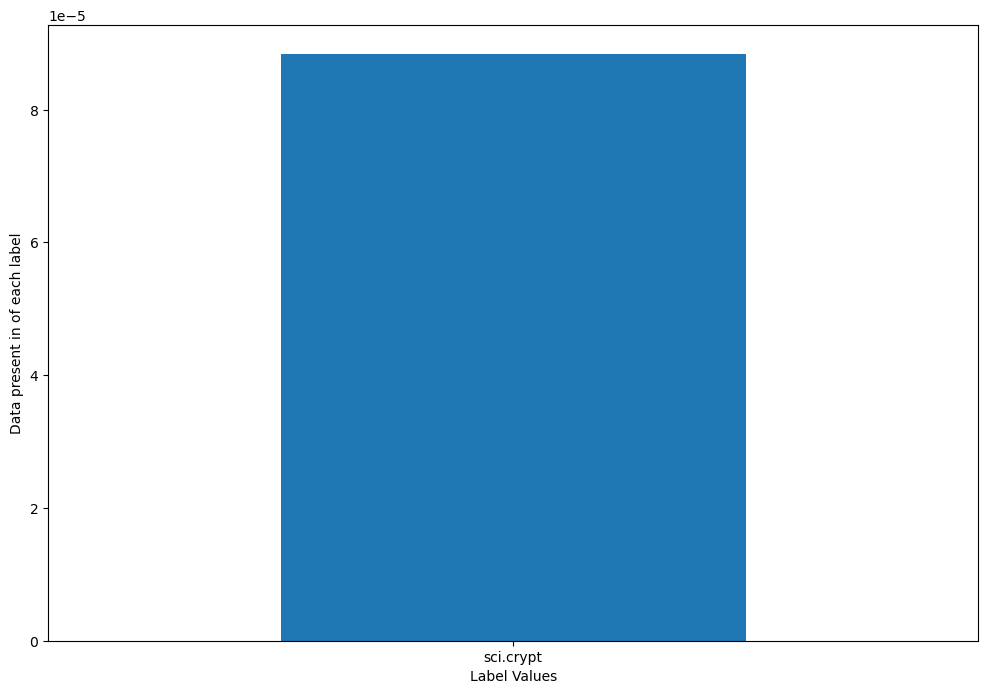

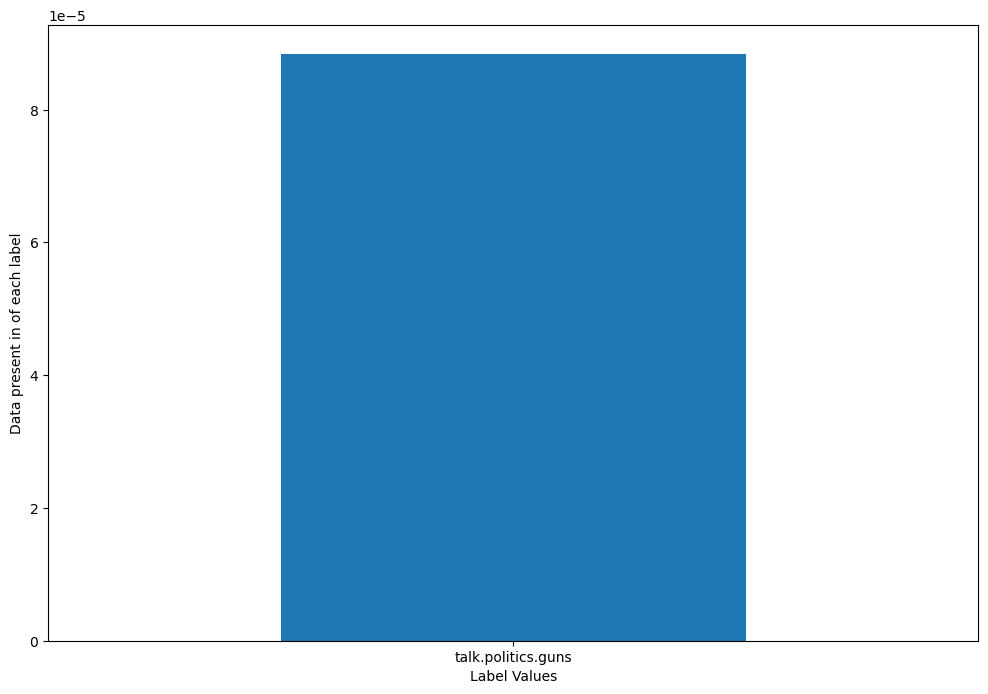

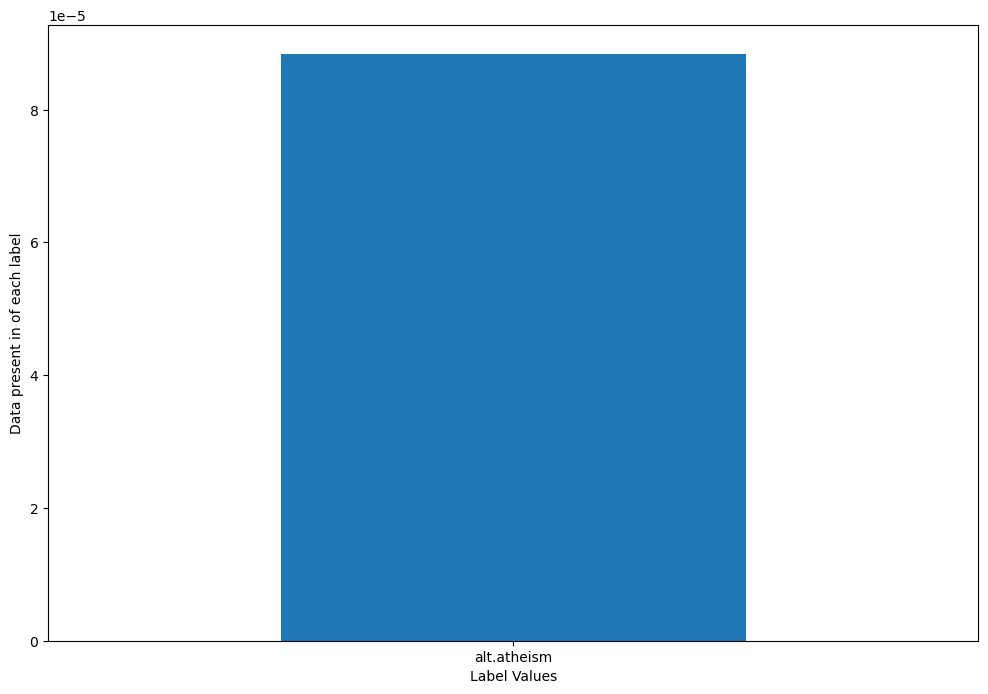

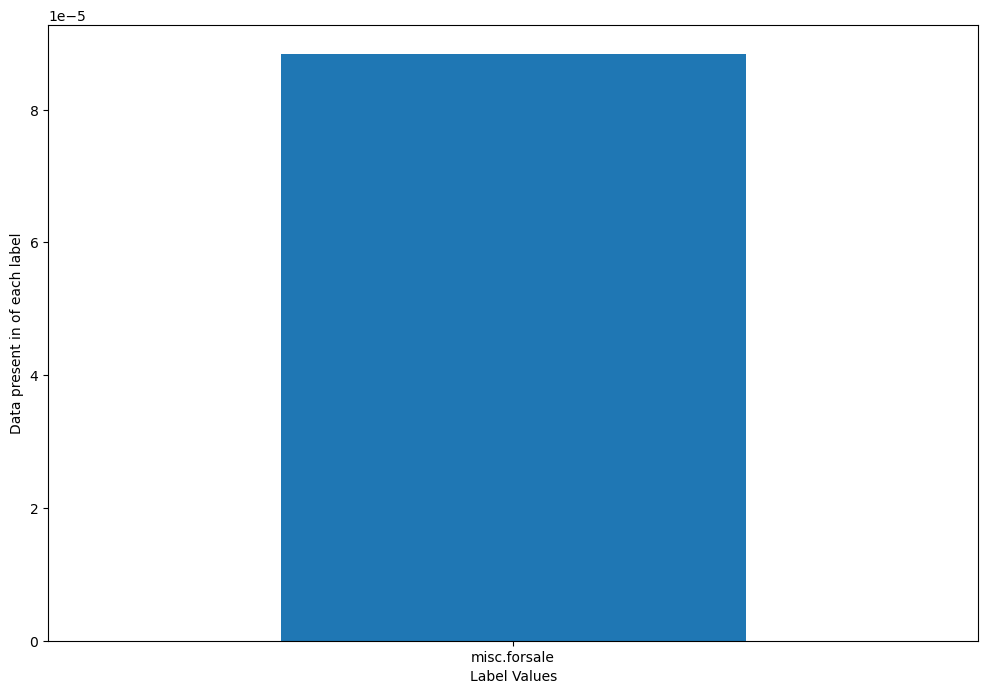

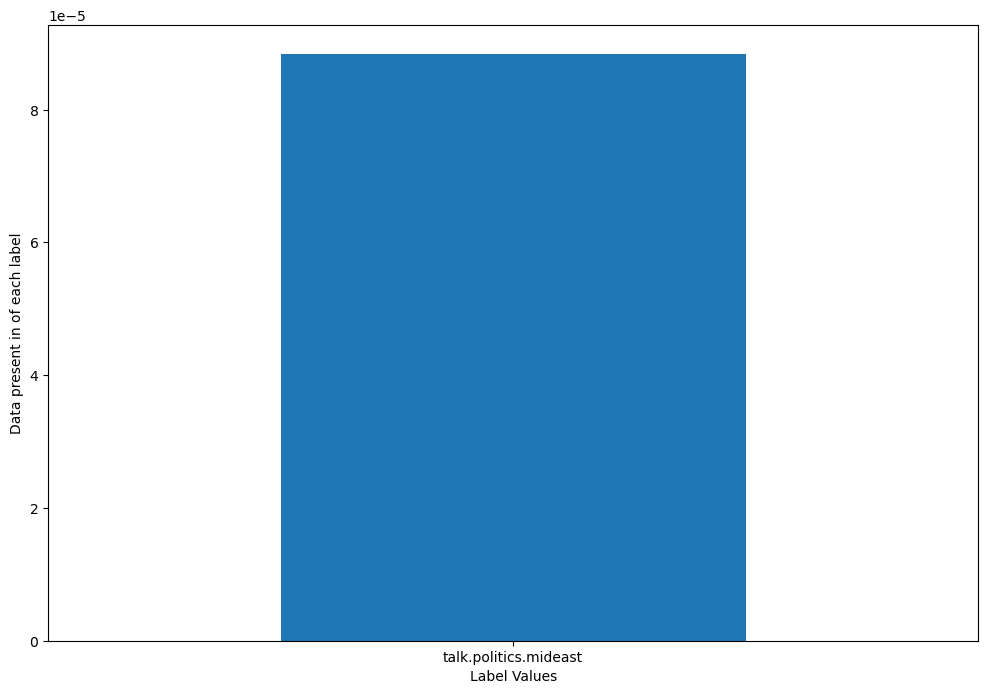

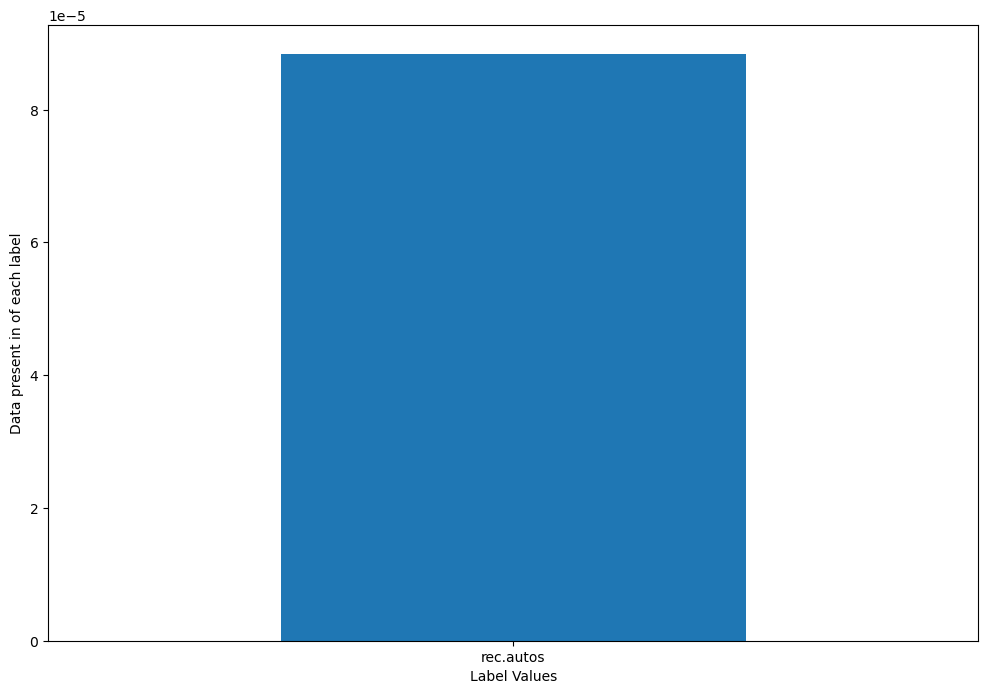

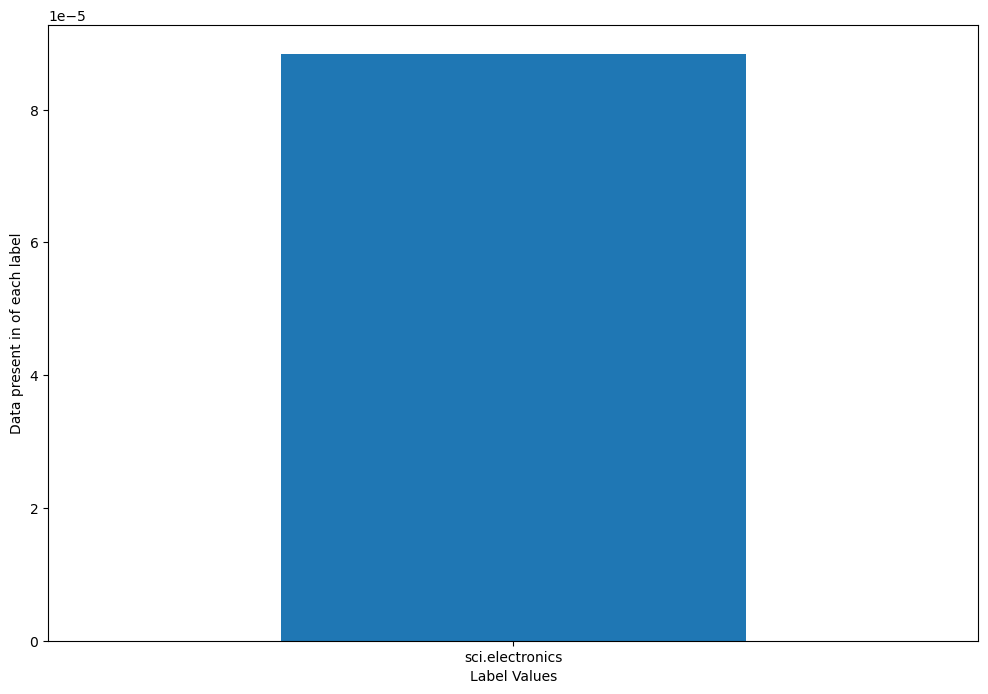

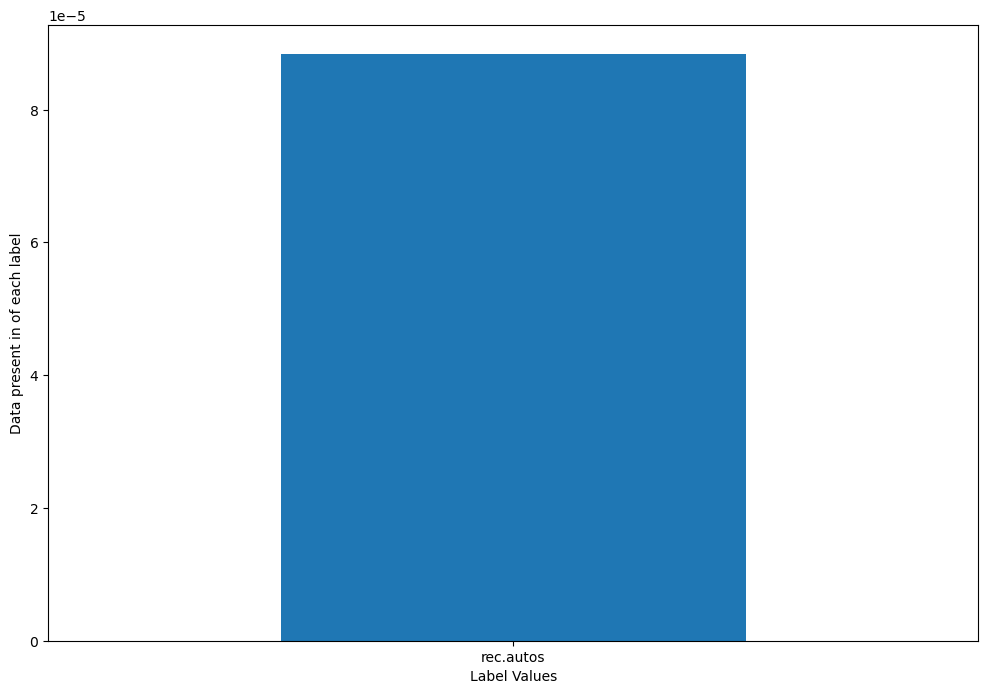

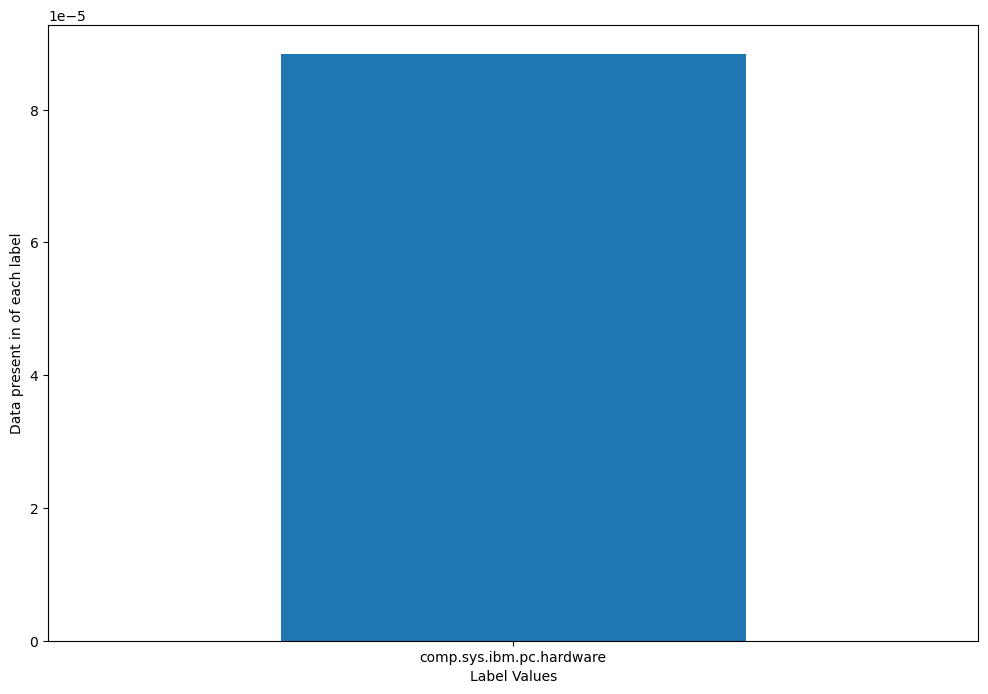

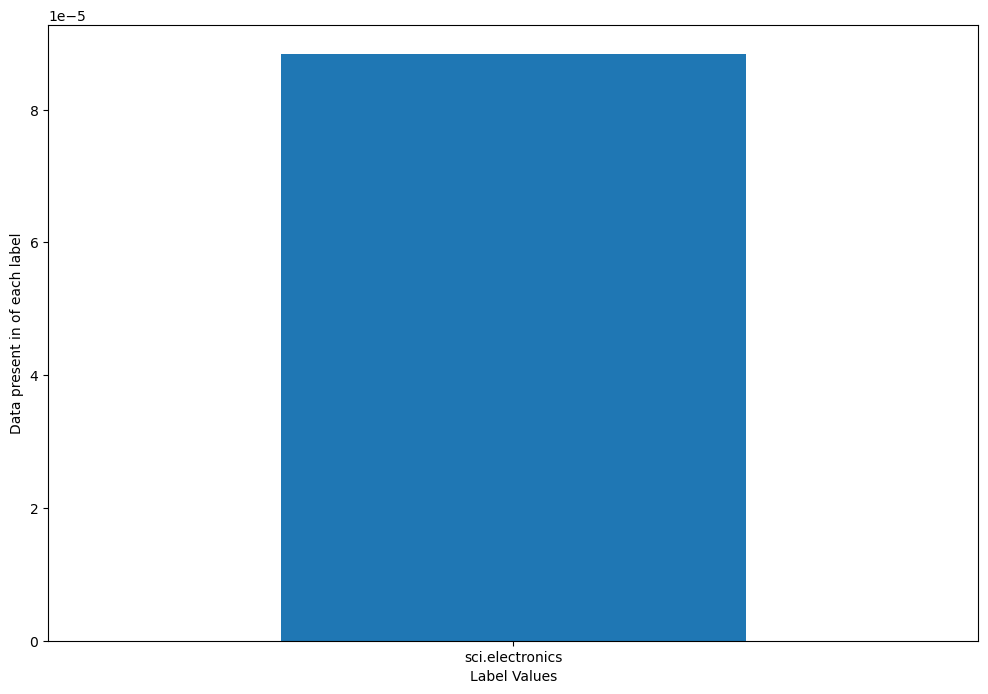

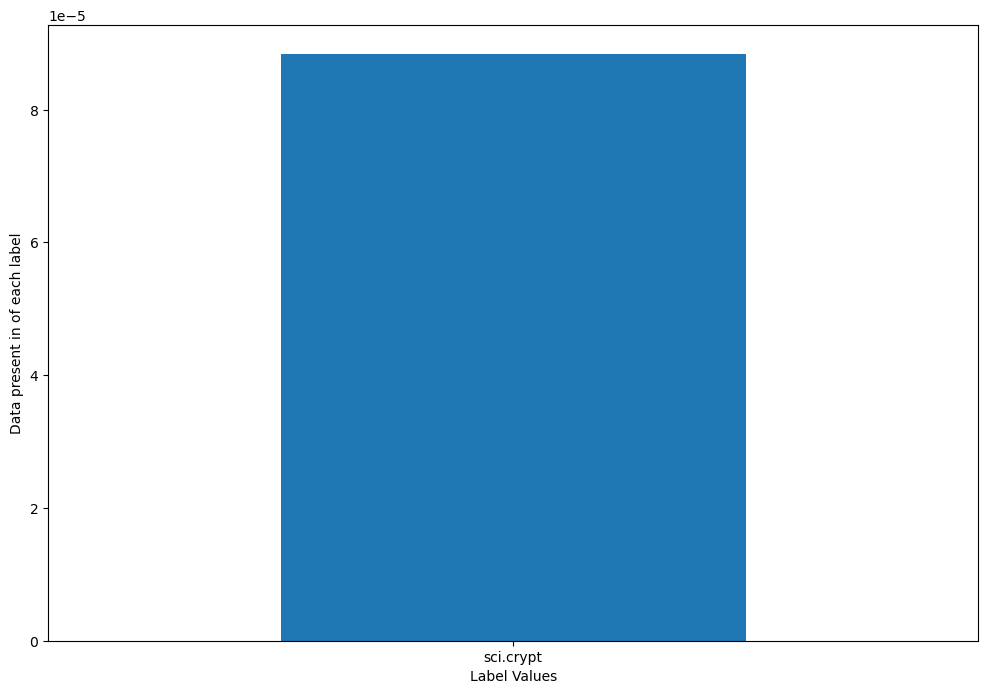

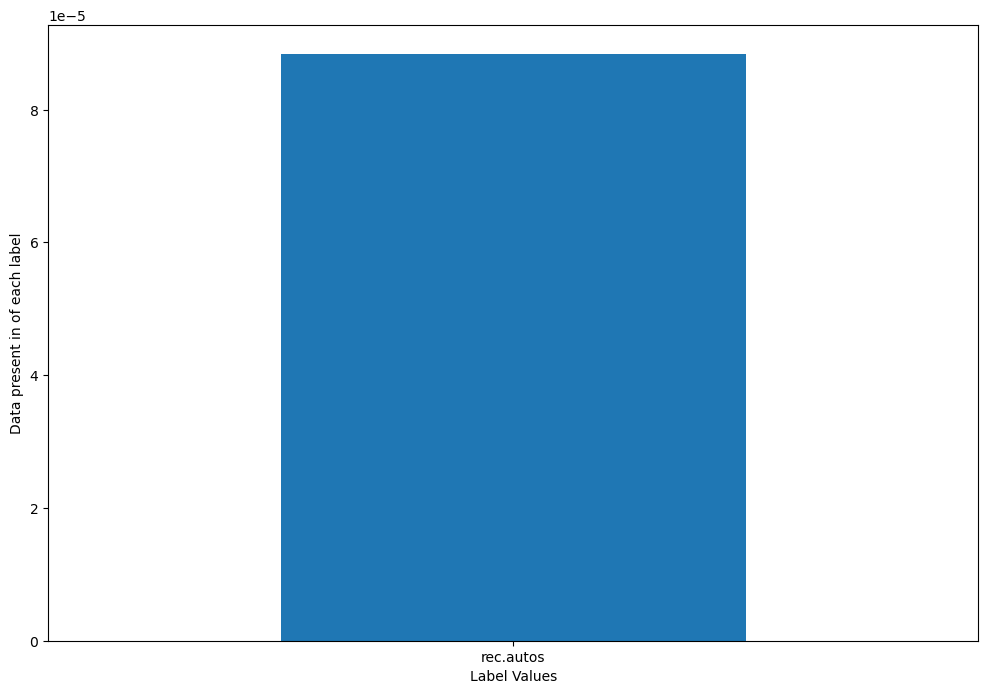

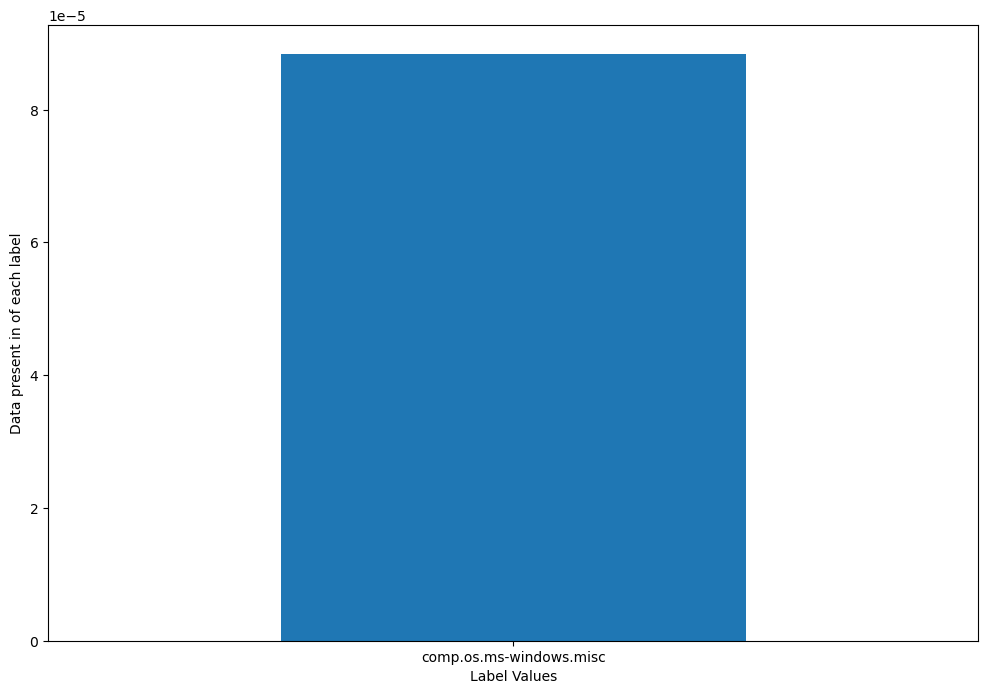

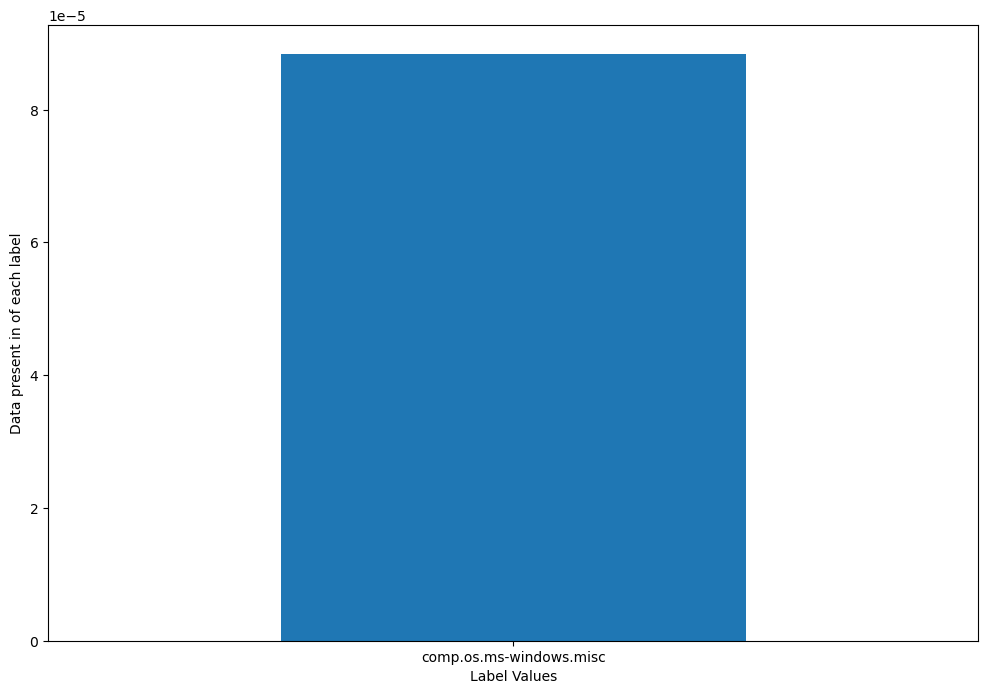

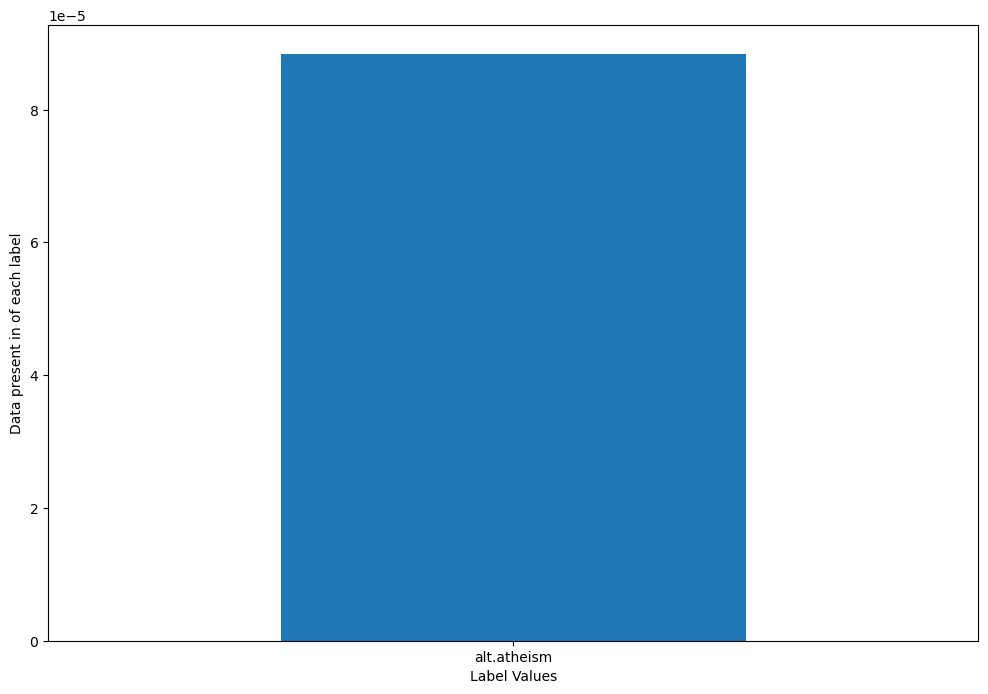

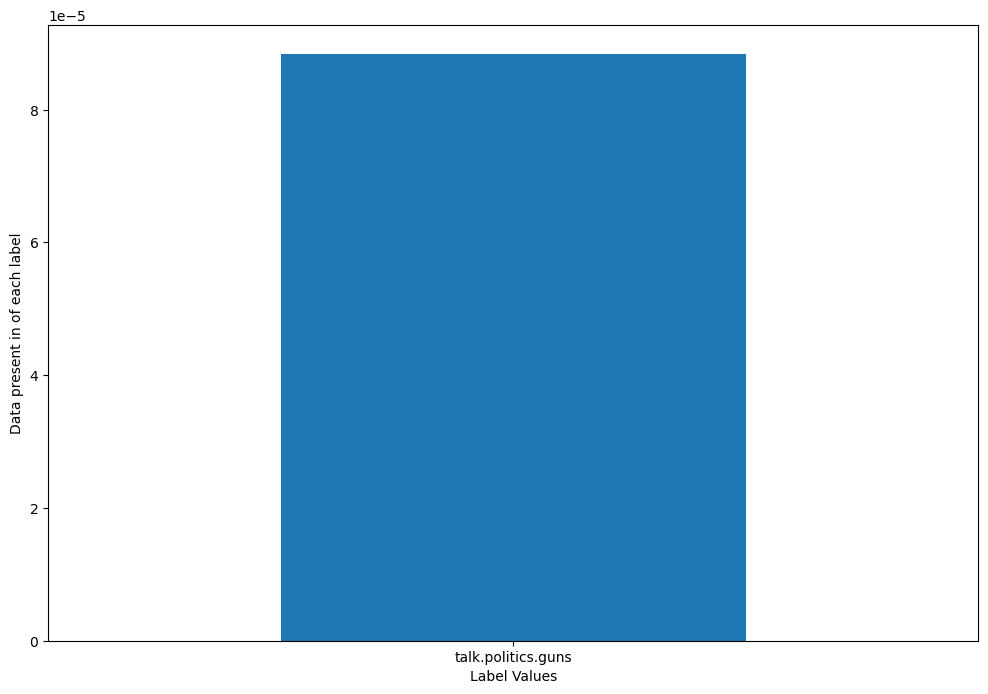

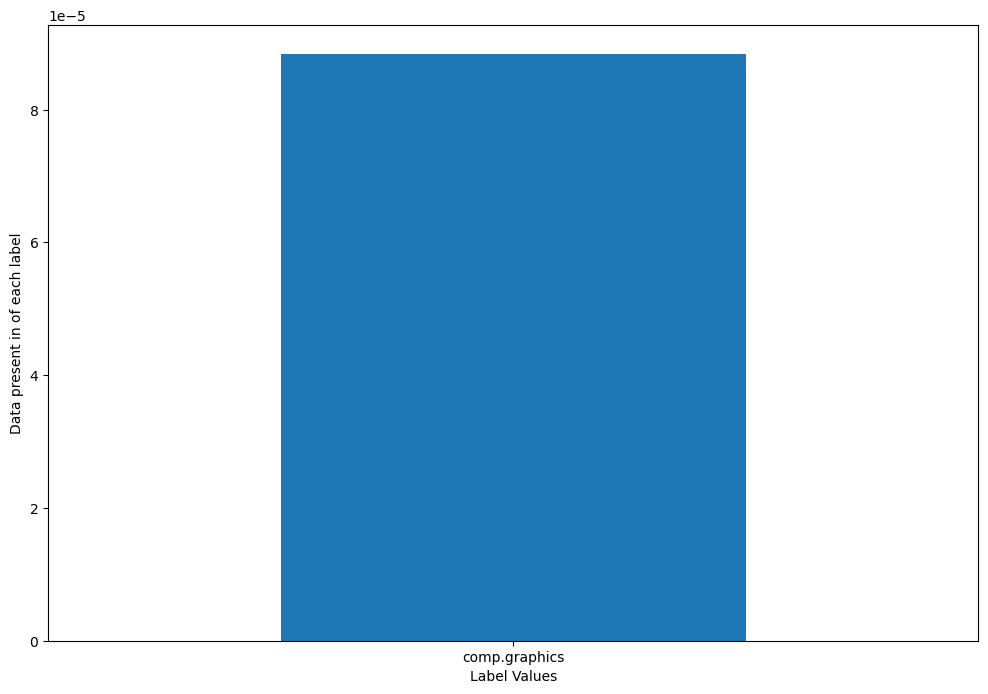

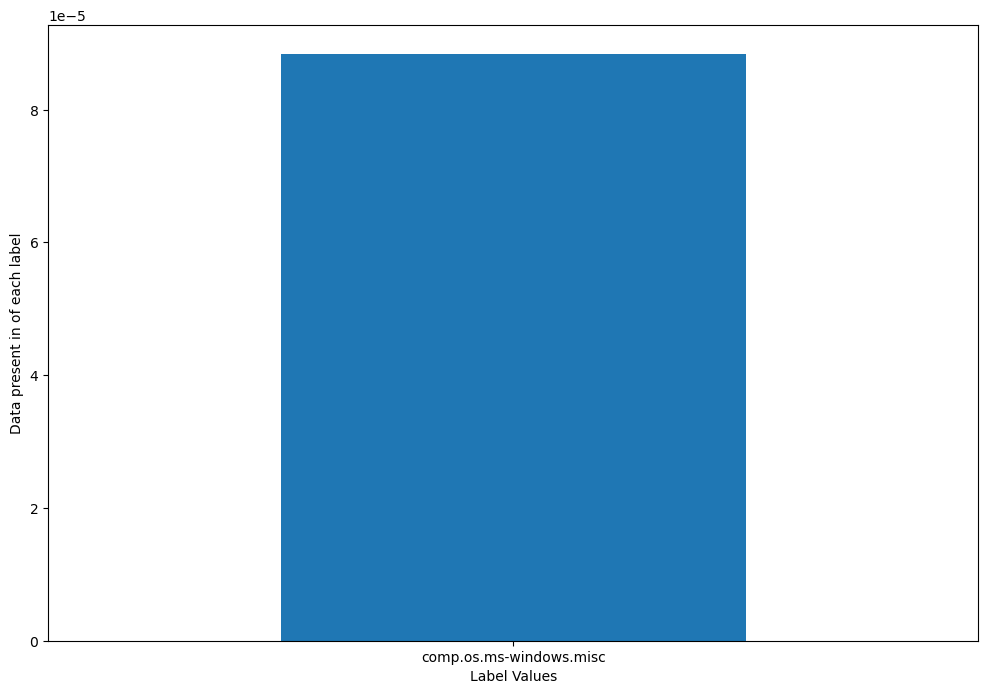

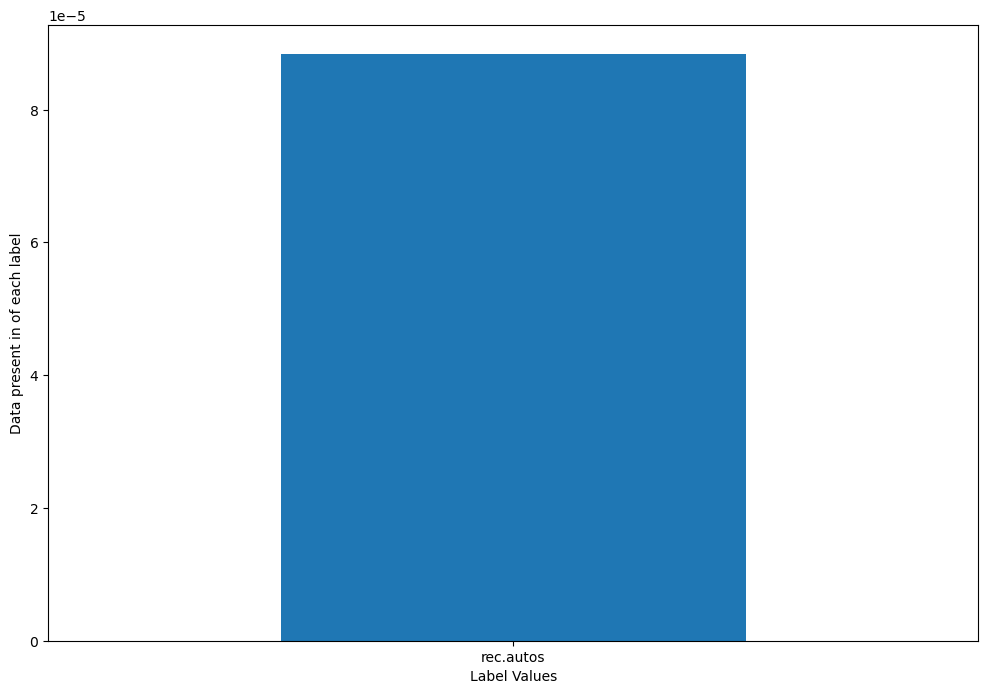

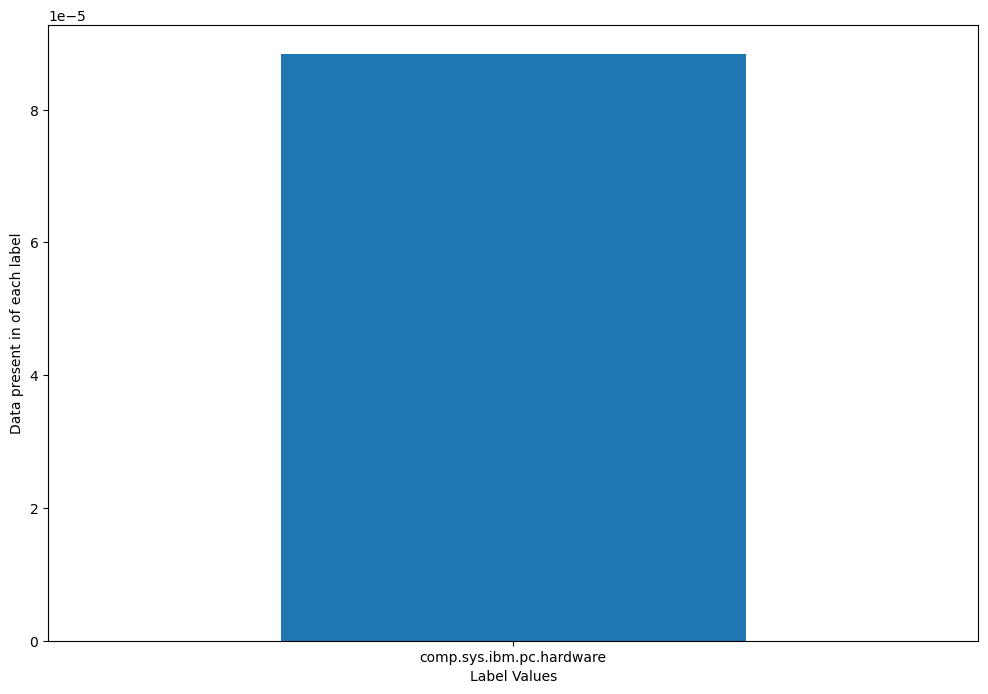

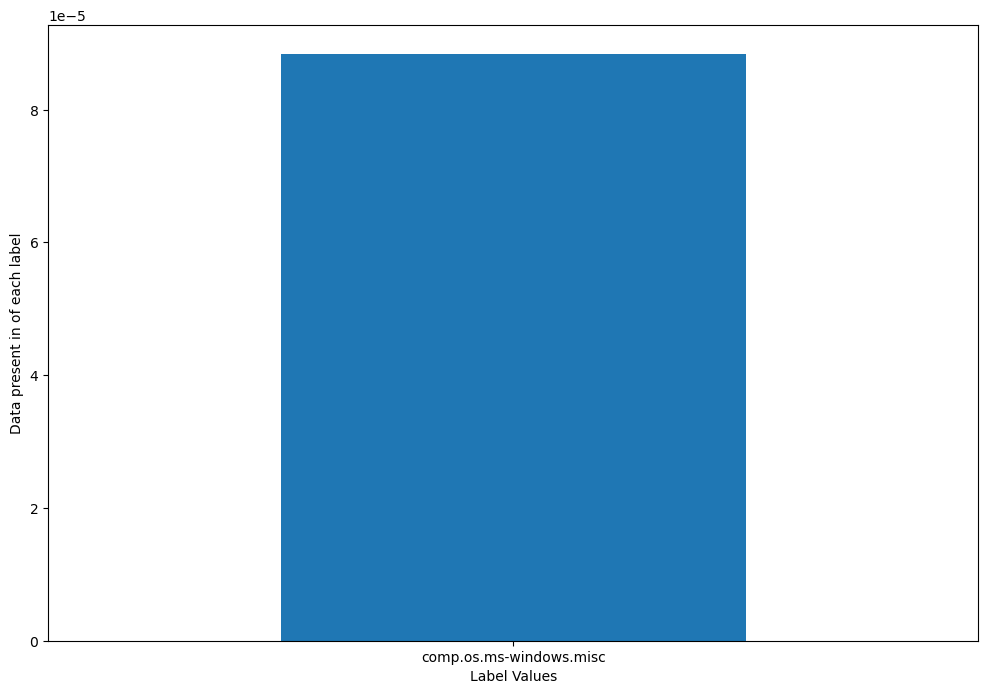

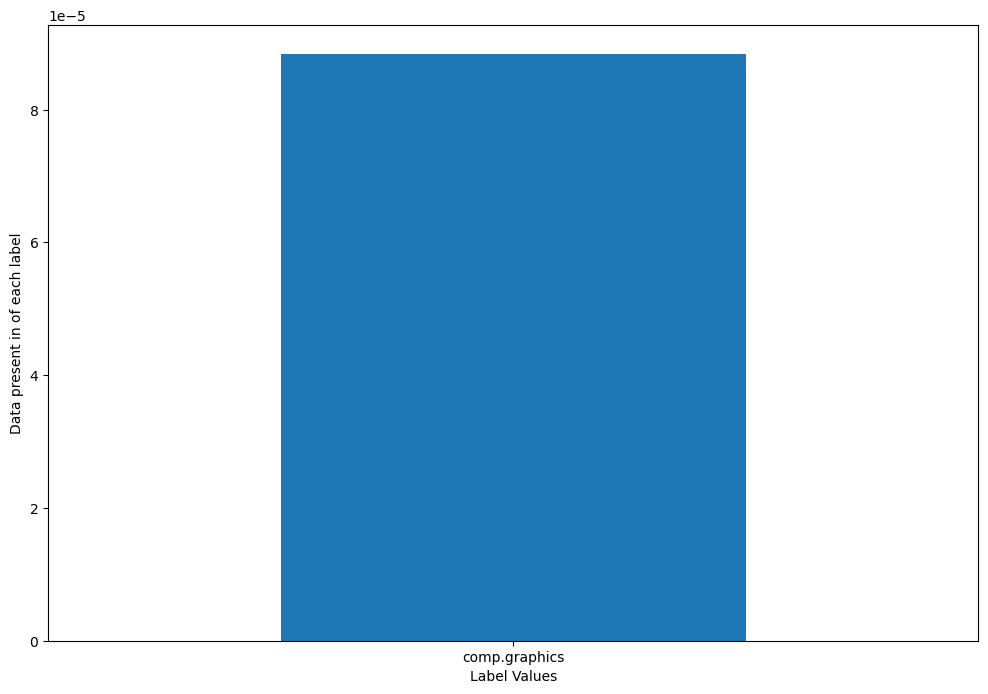

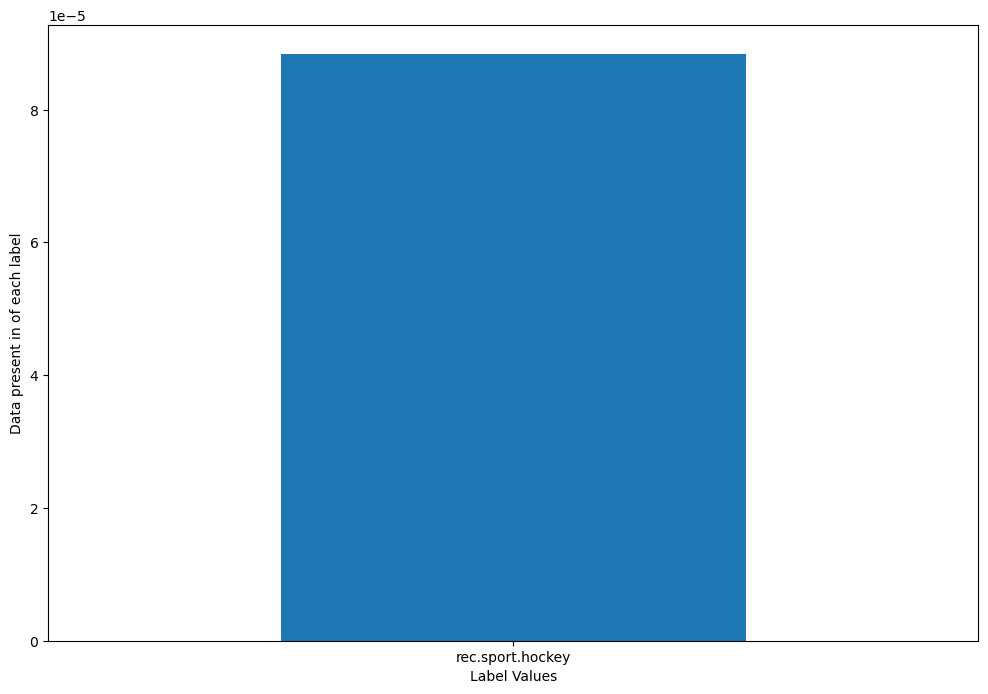

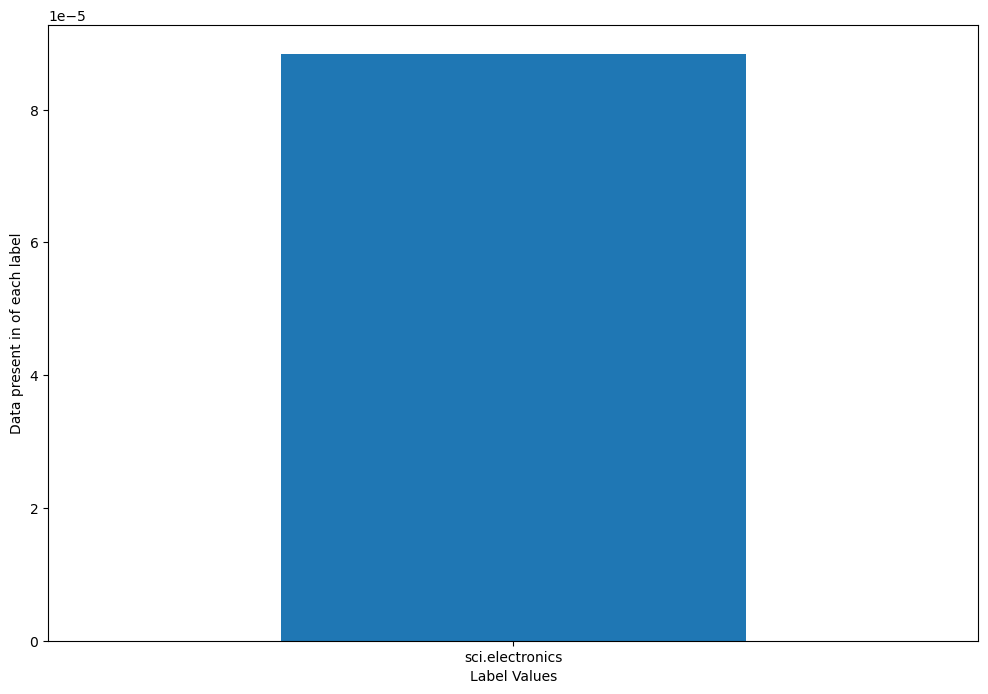

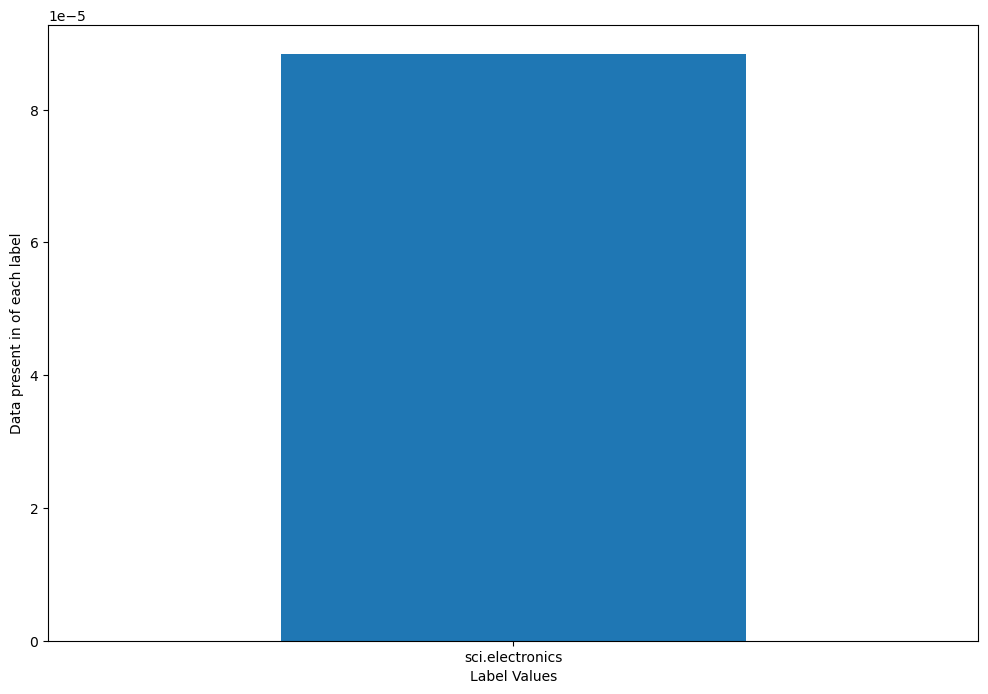

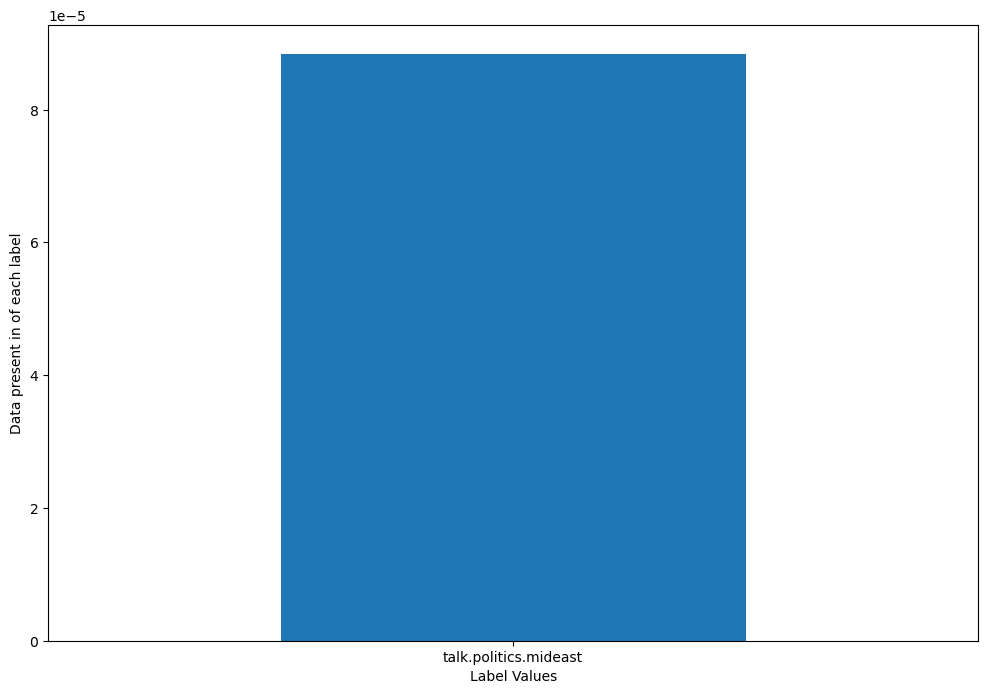

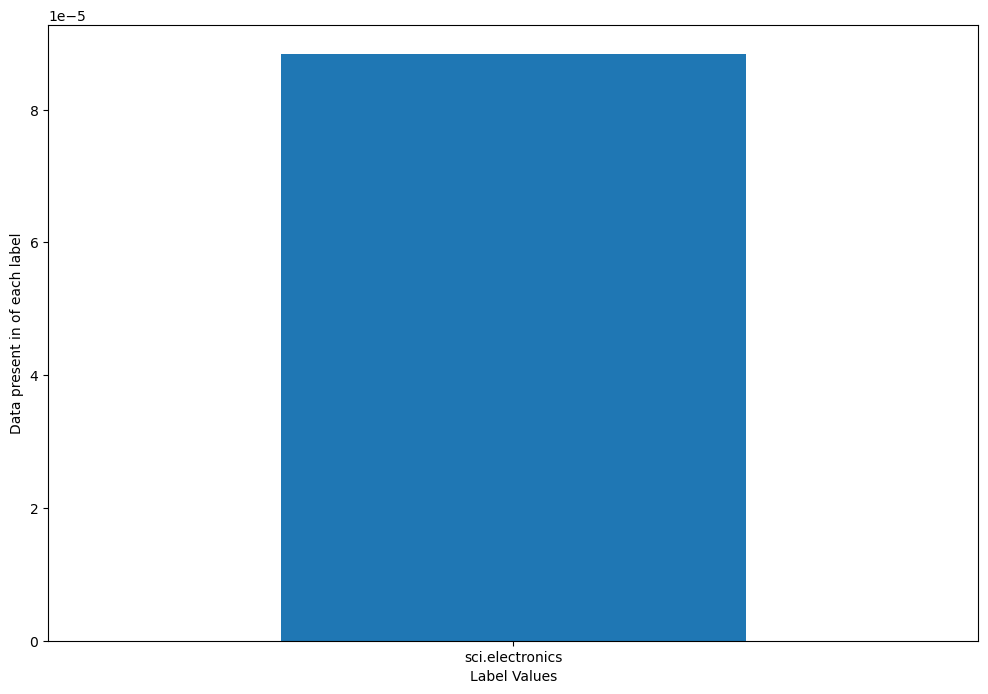

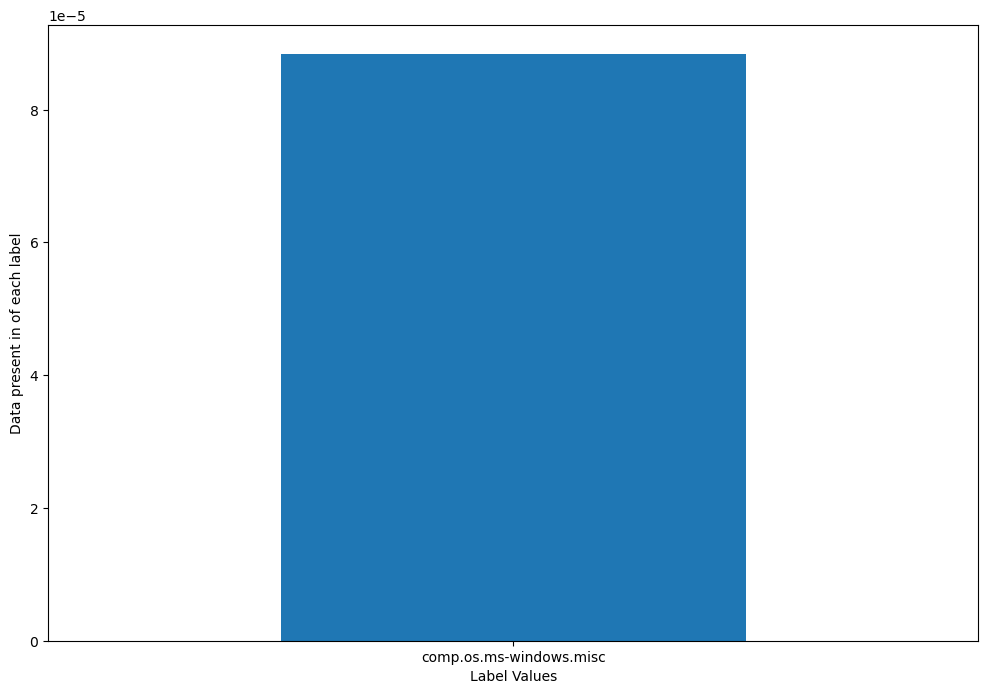

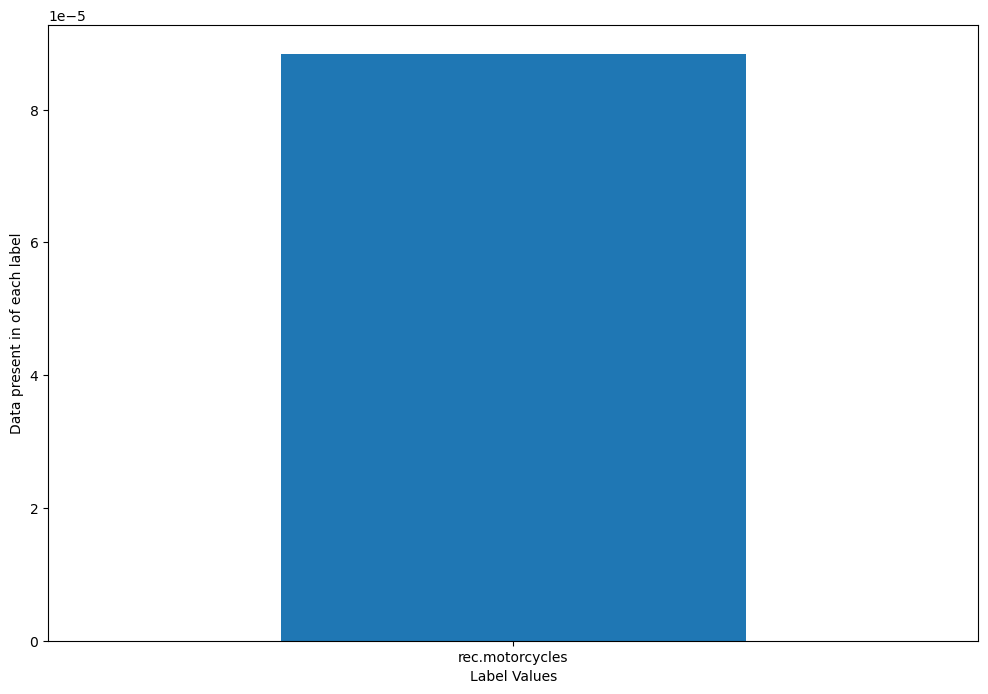

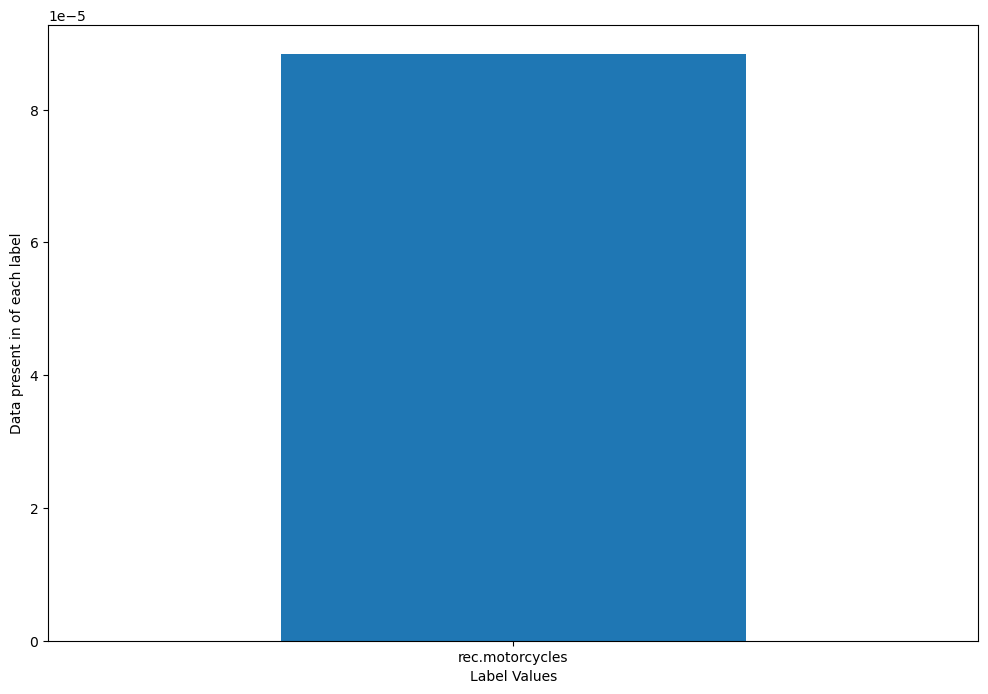

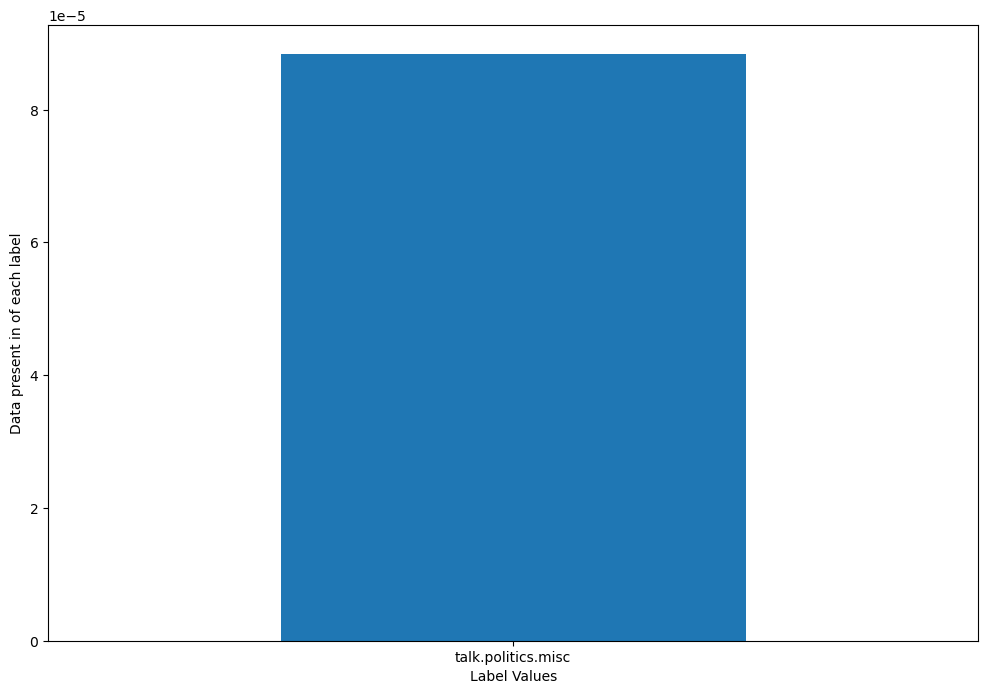

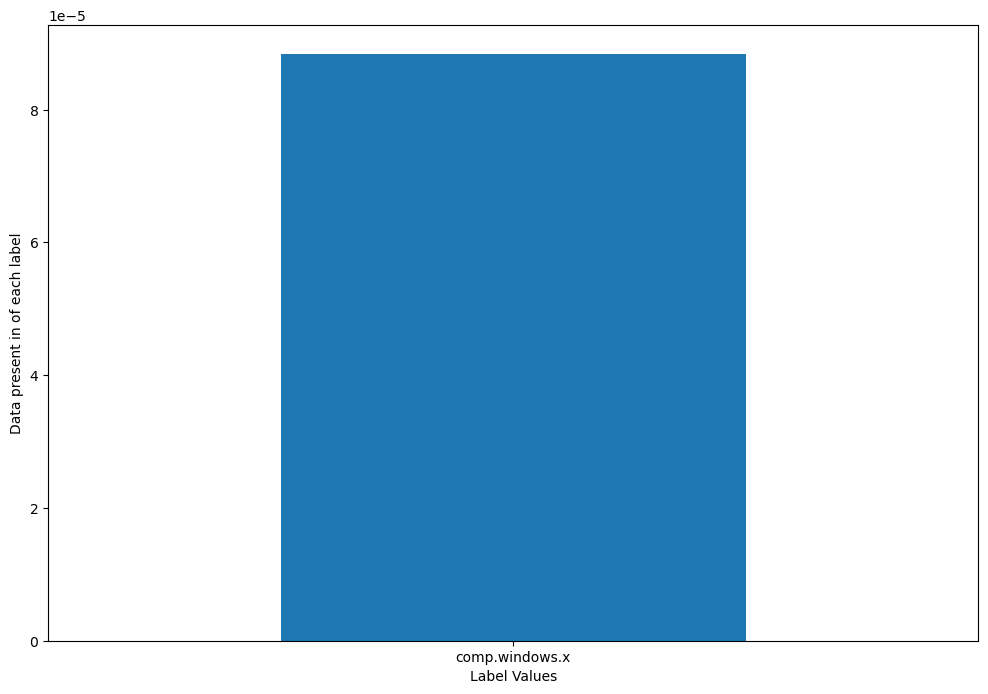

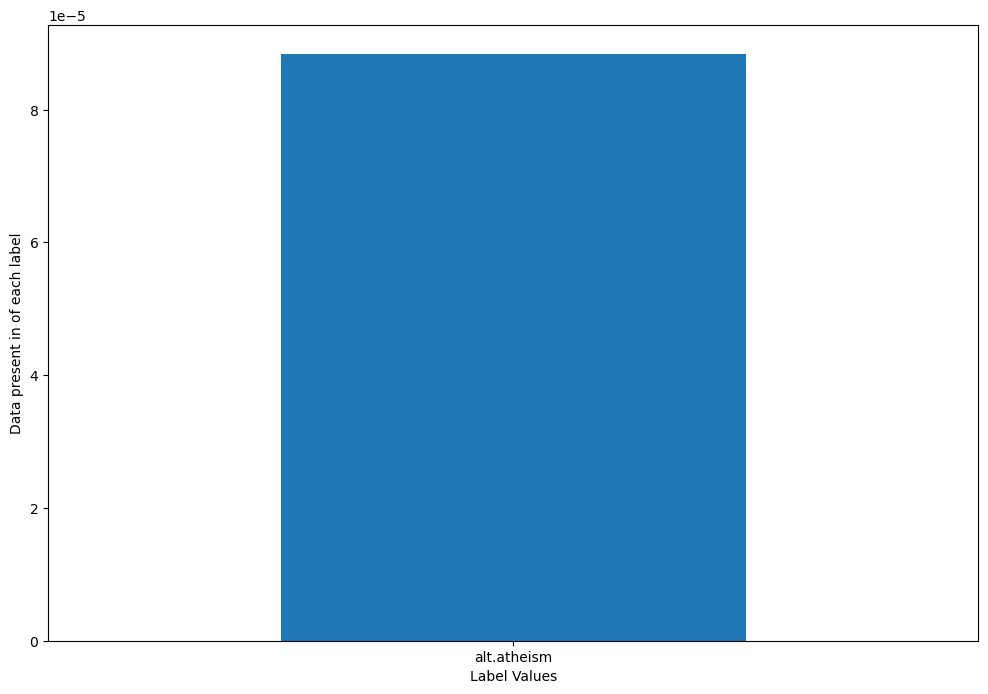

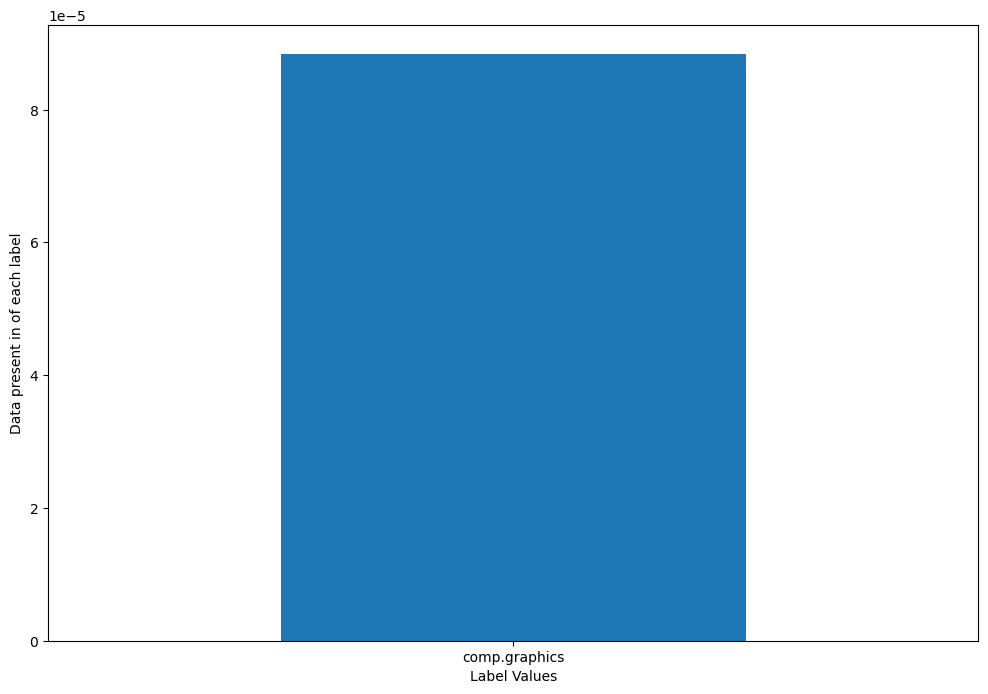

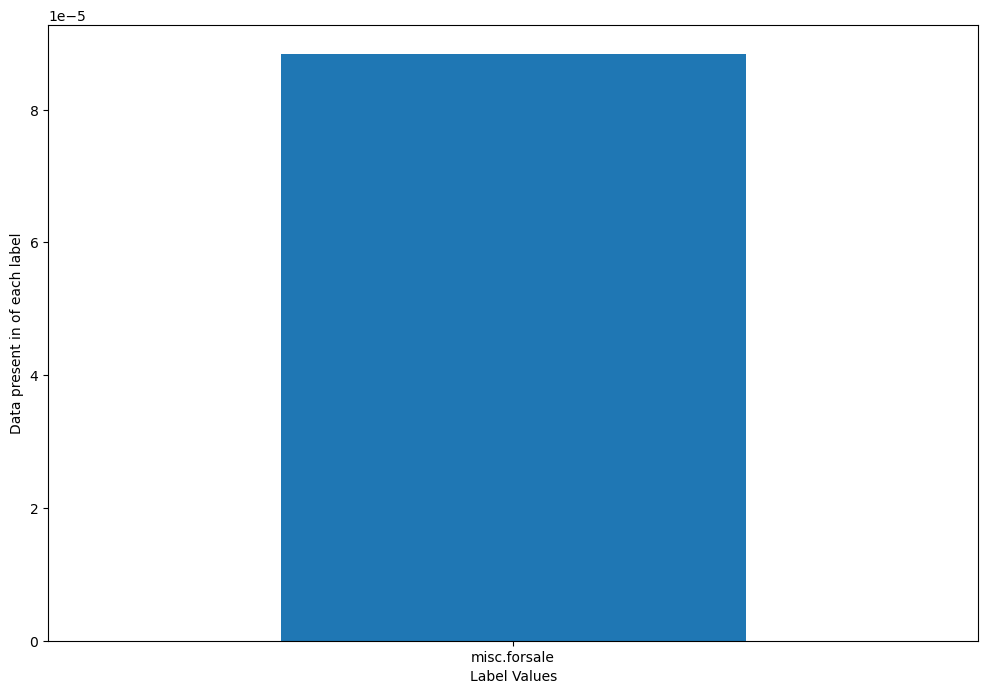

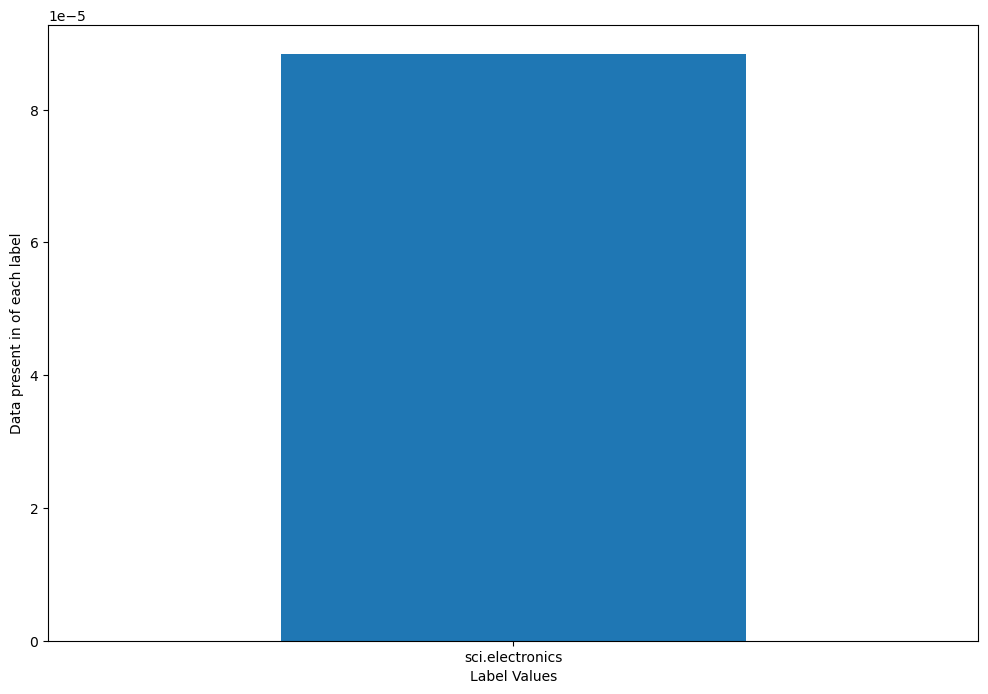

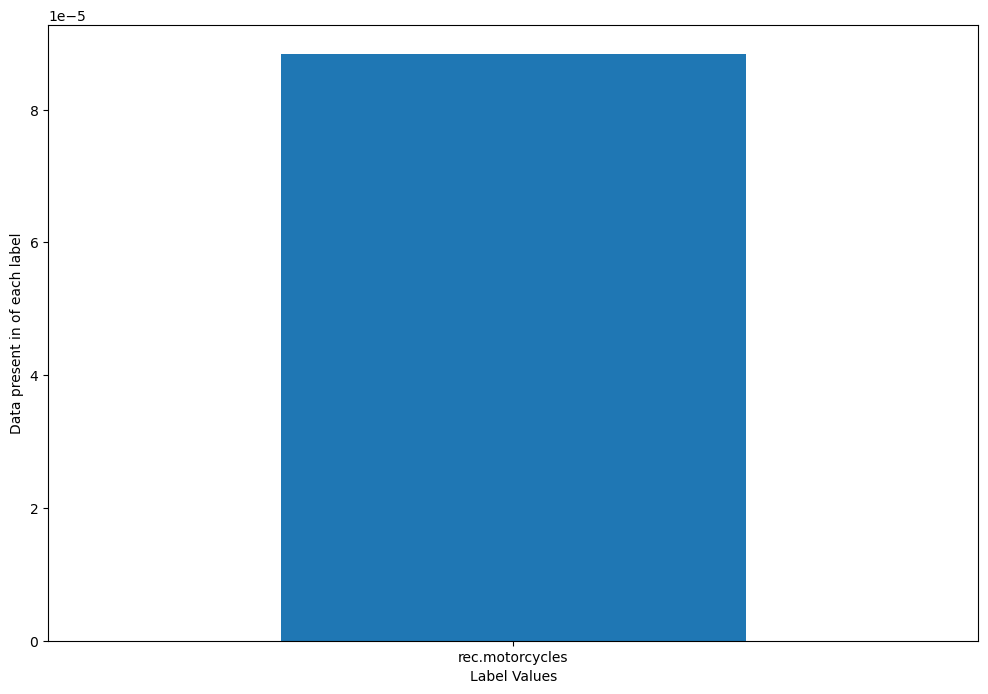

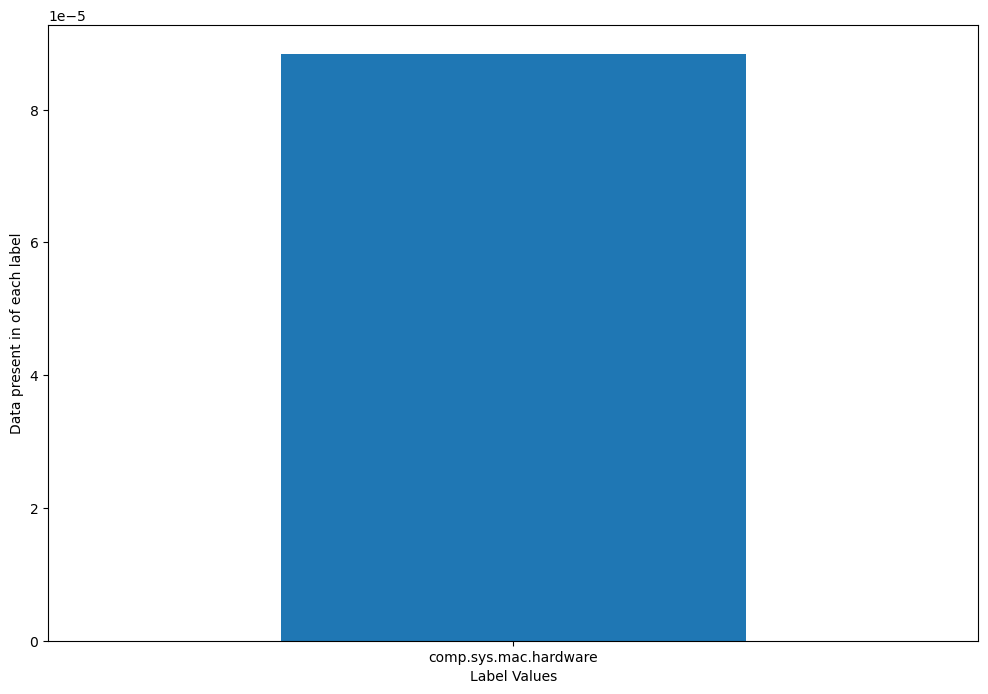

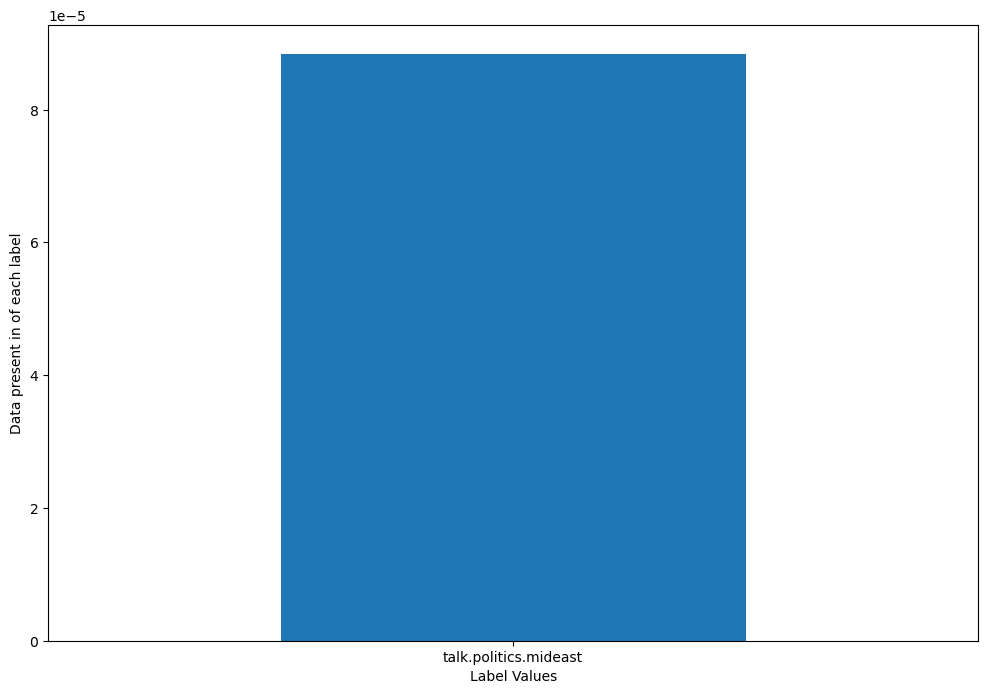

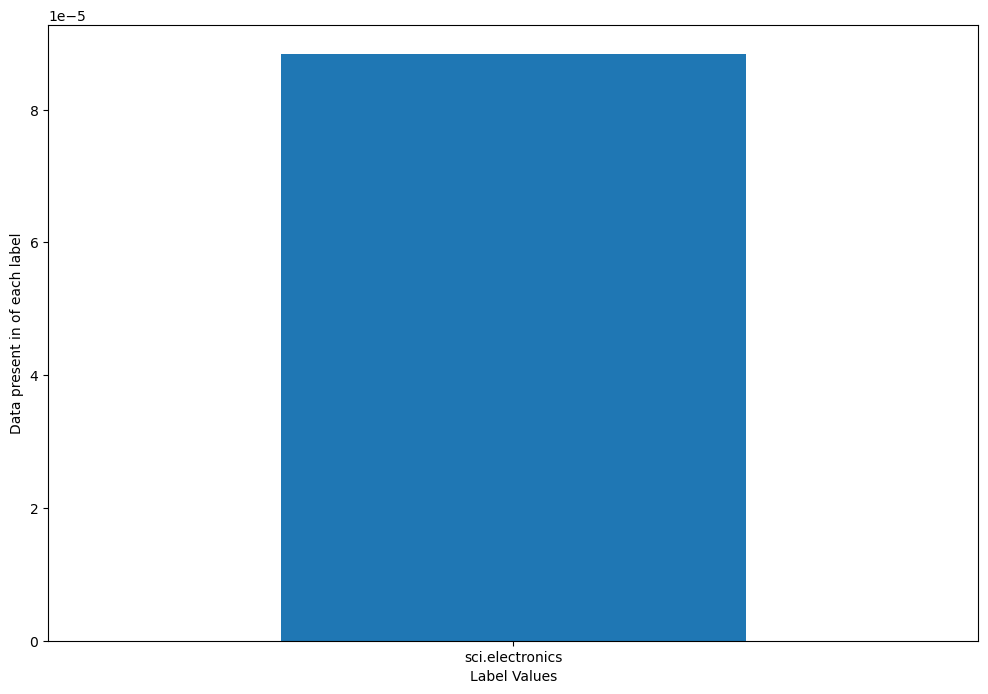

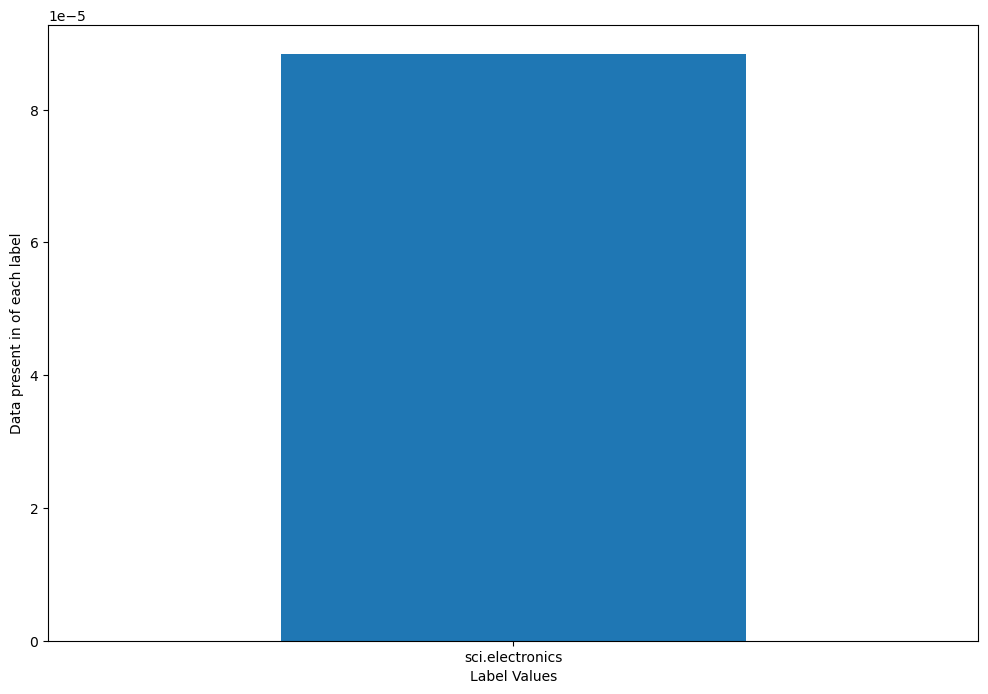

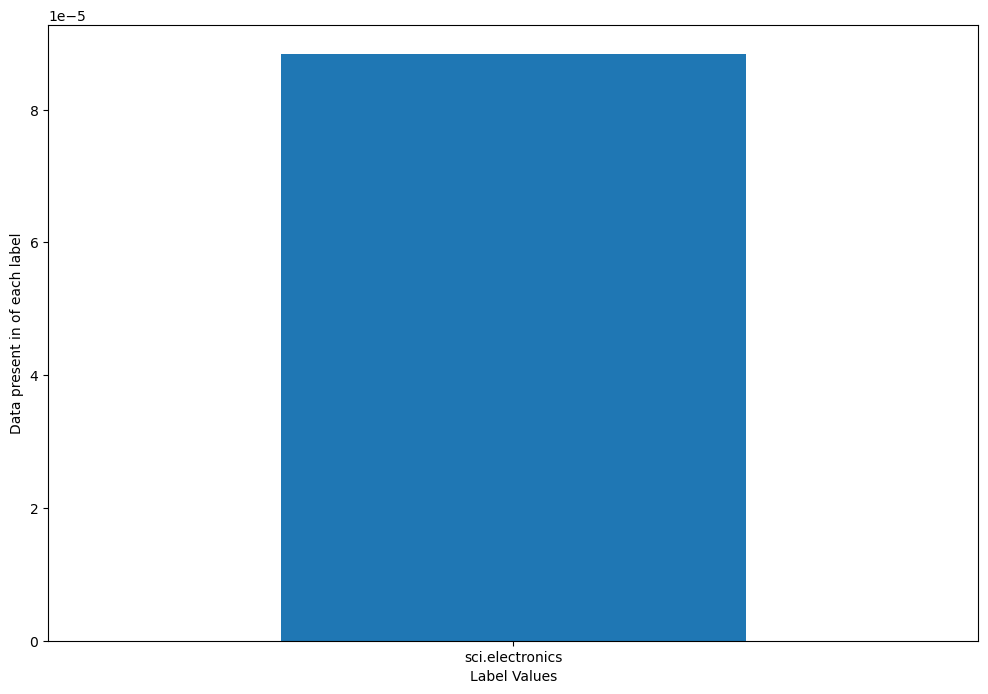

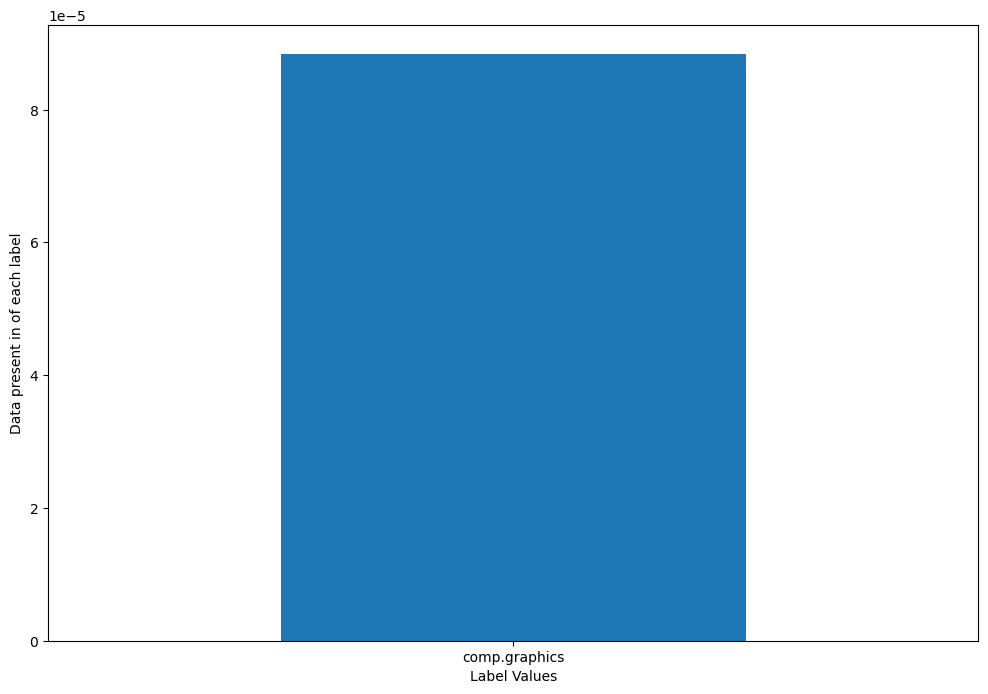

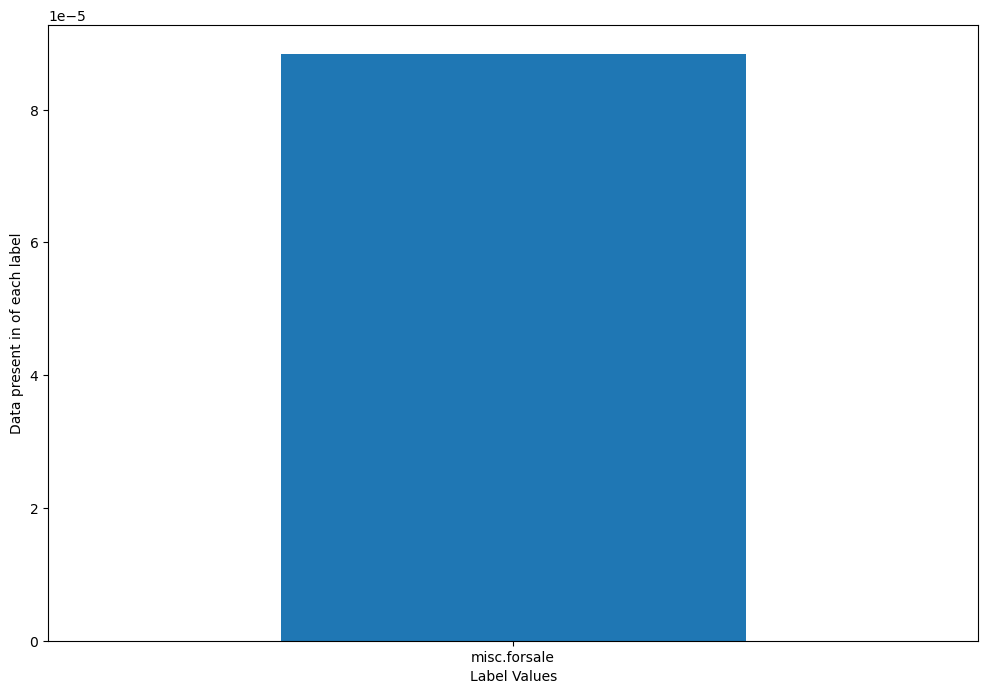

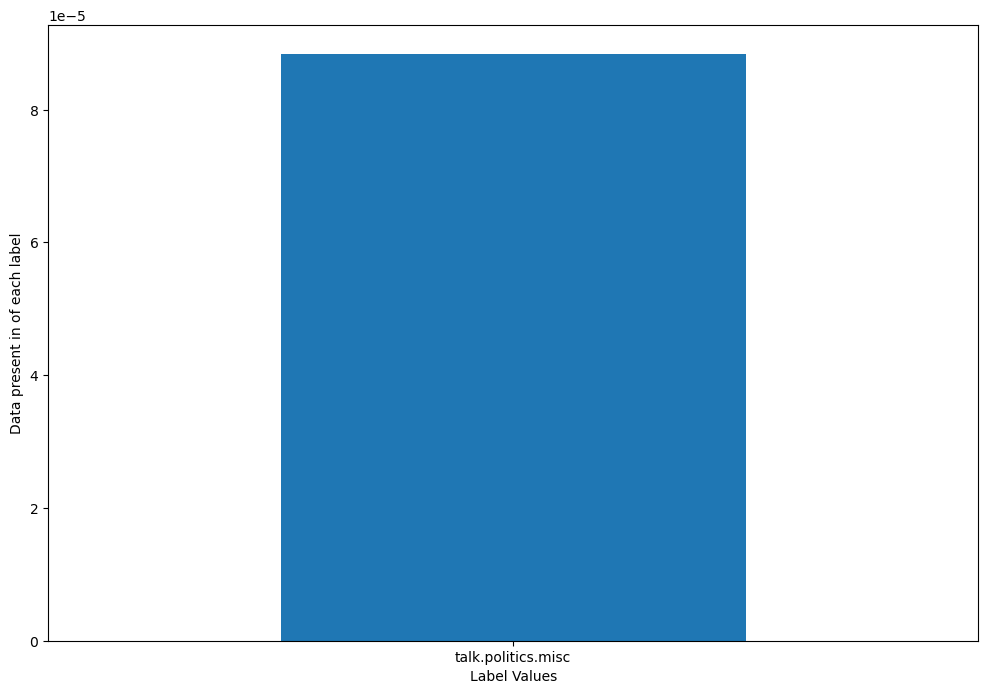

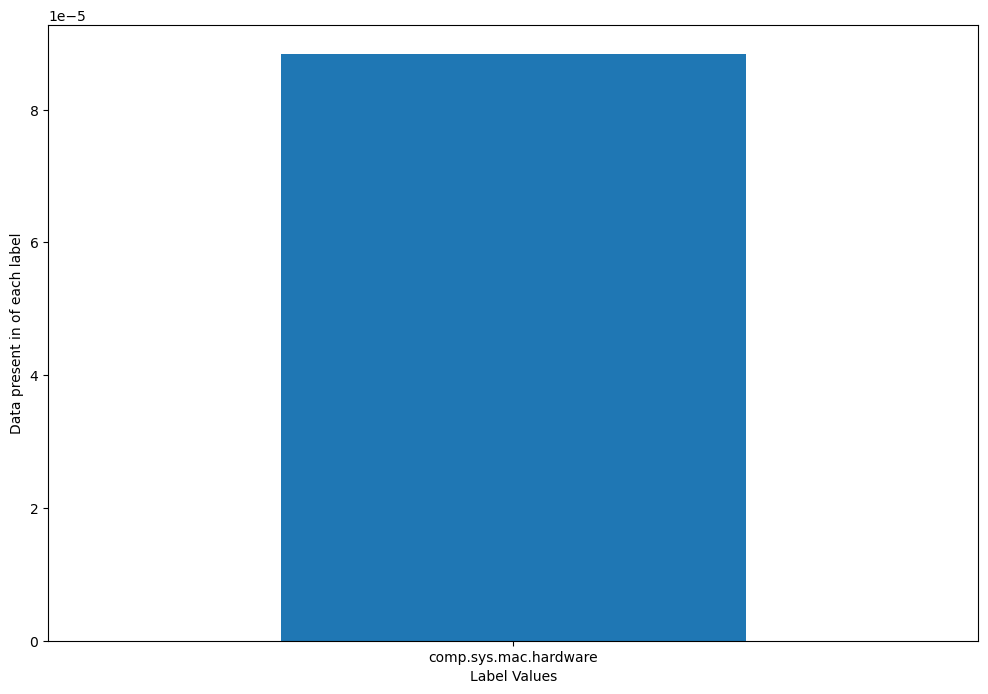

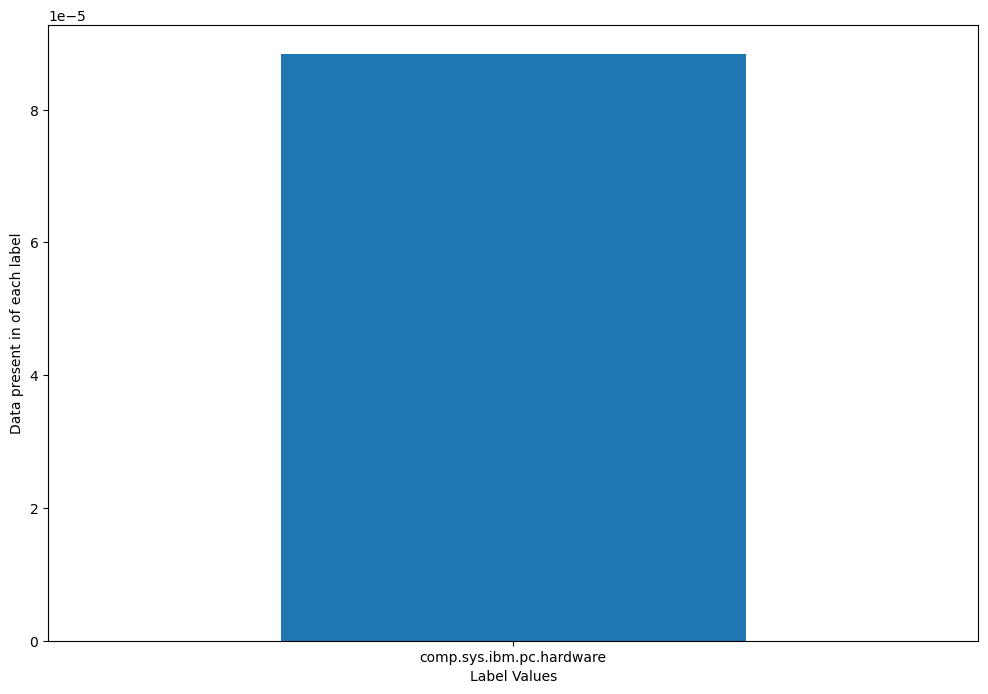

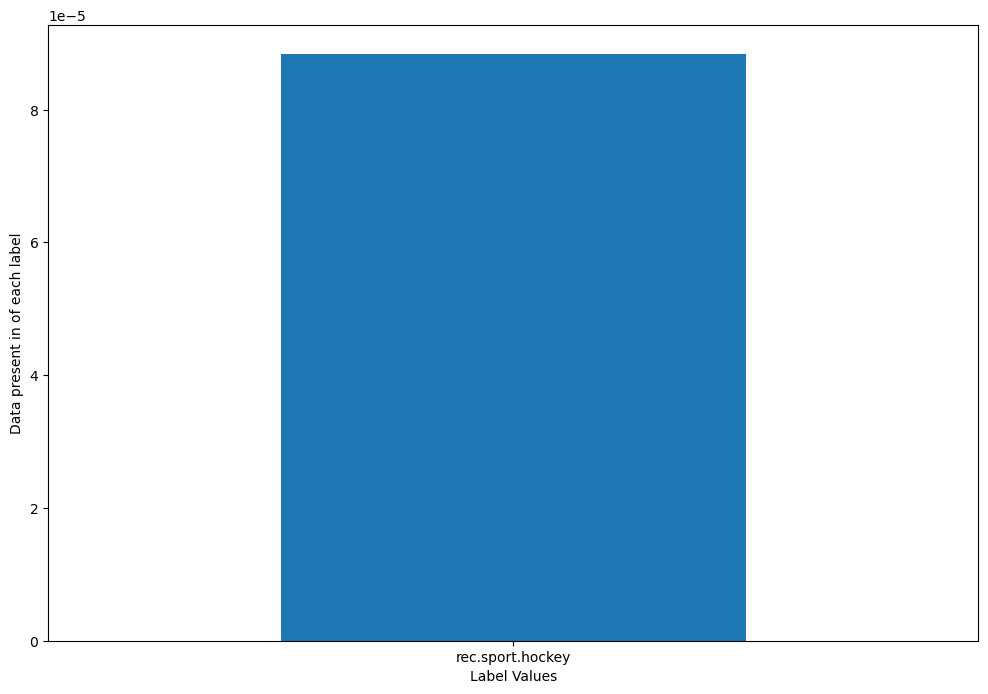

KeyboardInterrupt: 

<Figure size 1200x800 with 0 Axes>

In [12]:
for i in range(len(df_train.target)):
    bins, counts = np.unique(df_train.target_names[df_train.target[i]], return_counts=True)
    freq_series = pd.Series(counts/len(df_train.data))
    plt.figure(figsize=(12, 8))
    ax = freq_series.plot(kind='bar')
    ax.set_xticklabels(bins, rotation=0)
    plt.ylabel('Data present in of each label')
    plt.xlabel('Label Values')
    plt.show()


# Splitting the dataset into train and test

In [13]:
train_data, test_data, train_labels, test_label = train_test_split(df_train.data, df_train.target, test_size = 0.2, random_state = 2)

In [14]:
train_data[0]

'From: gt4661a@prism.gatech.EDU (gt4661a gt4661a PAOLO,MARC ANTHONY)\nSubject: Computer For Sale\nDistribution: atl\nOrganization: Georgia Institute of Technology\nLines: 5\n\n-- \nPAOLO,MARC ANTHONY\nGeorgia Institute of Technology, Atlanta Georgia, 30332\nuucp:     ...!{allegra,amd,hplabs,ut-ngp}!gatech!prism!gt4661a\nInternet: gt4661a@prism.gatech.edu\n'

In [15]:
# Training and test data sizes
print(f"Size of train data :{len(train_data)}")
print(f"Size of test data :{len(test_data)}")

Size of train data :9051
Size of test data :2263


# Creating SpaCy tokenizer to tokenize the data , we will be using the en_core_web_sm model

In [16]:
nlp = sp.load('en_core_web_sm')

In [17]:
nlp

In [18]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

### First we will try tokenizing alone and create a simple pipeline

In [19]:
nlp = sp.blank('en')

In [20]:
nlp

In [21]:
nlp.pipe_names

[]

In [22]:
# Note : This function takes doc as a parameter and tokenizes the text in doc by removing punctuation and spaces but keeping alphabets
def sp_tokenizer(doc):
    return [t.text for t in nlp(doc) if not t.is_punct and not t.is_space and t.is_alpha]


### we will create a vectorizer by passing our function as arguement

In [23]:
vect = TfidfVectorizer(tokenizer = sp_tokenizer)
train_feature_vects = vect.fit_transform(train_data)

# Making a Naive_Bayes CLassifier Model

In [116]:
NB = MultinomialNB()
NB.fit(train_feature_vects, train_labels)

MultinomialNB()

In [25]:
NB.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

In [26]:
train_preds = NB.predict(train_feature_vects)
print('F1 score on initial training set: {}'.format(metrics.f1_score(train_labels, train_preds, average='macro')))

F1 score on initial training set: 0.8948305080834382


In [27]:
# Note :  We achieve a decent F1 score but there's an issue, the training data has metadata like the subject which the model can use to predict rather than the main text 

In [28]:
# Removing Subject, headers and footers from the data
df_train_filtered = fetch_20newsgroups(subset = 'train', remove=('headers', 'footers', 'quotes'))
train_data_2, test_data_2, train_label_2, test_label_2 = train_test_split(df_train_filtered.data, df_train_filtered.target, test_size = 0.2, random_state = 1 )

In [29]:
train_data_2[0]

"\nI don't know about that...I've used Photoshop 2.5 on both a 486dx-50 and a Quadra\n950...I'd say they are roughly equal.  If anything the 486 was faster."

### creating the vectorizer again

In [30]:
vect = TfidfVectorizer(tokenizer = sp_tokenizer)
train_feature_vects = vect.fit_transform(train_data_2)

# Making the NB model again and checking F1 score

In [31]:
NB = MultinomialNB()
NB.fit(train_feature_vects, train_label_2)

MultinomialNB()

In [32]:
NB.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

In [33]:
train_preds = NB.predict(train_feature_vects)
print(f"The F1 score is :{metrics.f1_score(train_label_2, train_preds, average = 'macro')}")

The F1 score is :0.791654644597863


In [120]:
train_feature_vects[0]

<1x42714 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [36]:
test_feature_vects[0]

<1x51637 sparse matrix of type '<class 'numpy.float64'>'
	with 43 stored elements in Compressed Sparse Row format>

In [37]:
# Rechecking F1 score on test data
test_preds = NB.predict(test_feature_vects)
print('F1 score on filtered training set: {}'.format(metrics.f1_score(test_label_2, test_preds, average='macro'))) 

F1 score on filtered training set: 0.6087677070998413


In [38]:
# Note: You can see that our F1 score has dropped majorly, let's bring it up

## Plotting a confusion matrix to see the issues

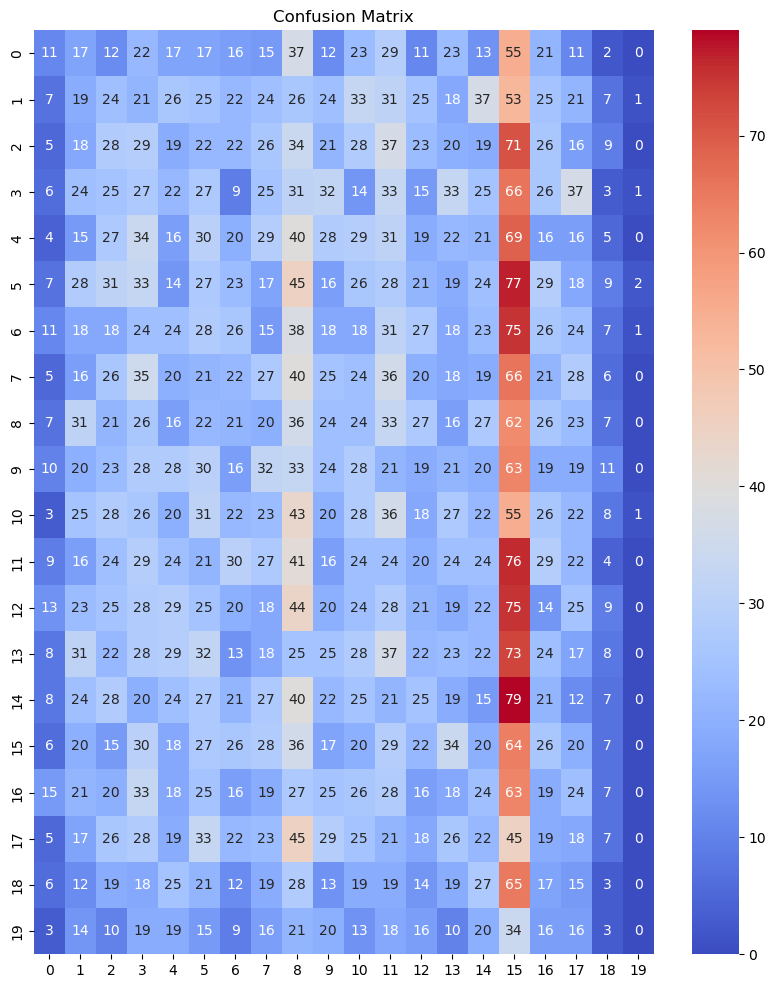

In [39]:
plt.figure(figsize = (10, 12))
cm = confusion_matrix(train_labels, train_preds)
sns.heatmap(cm, annot = True, cmap = 'coolwarm')
plt.title('Confusion Matrix')
plt.show()

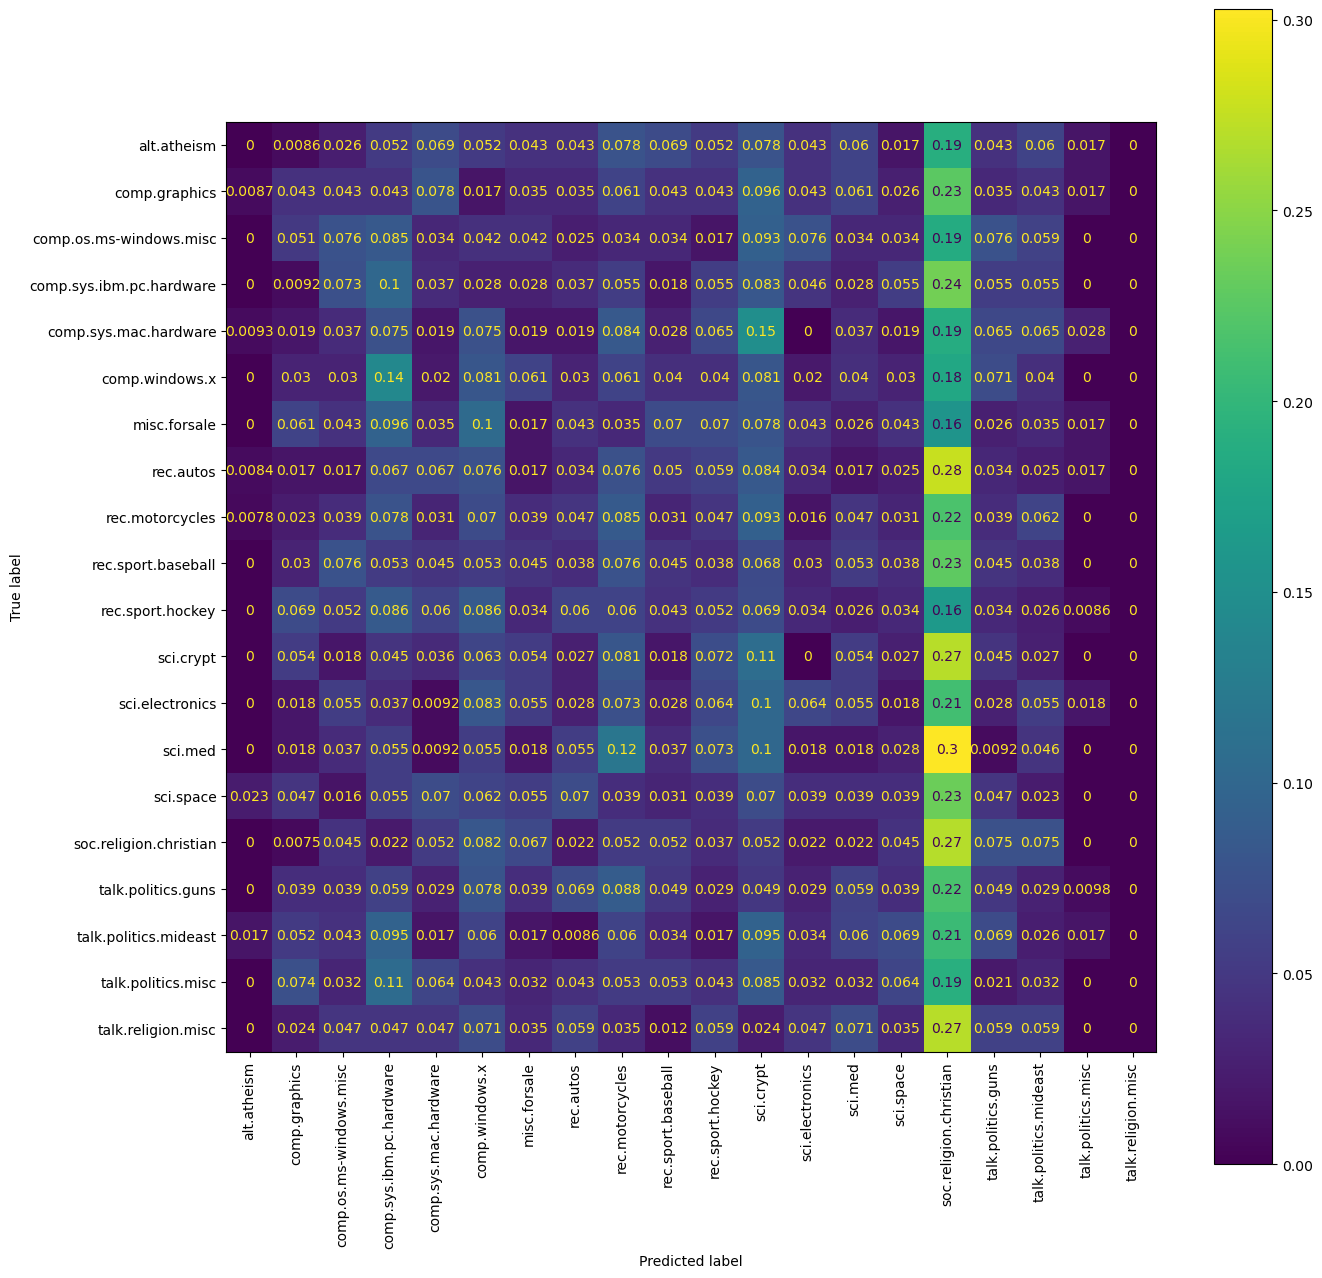

In [40]:
# For validation data
fig, ax = plt.subplots(figsize=(15, 15)) 
disp = ConfusionMatrixDisplay.from_estimator(NB, test_feature_vects, test_label, normalize='true', display_labels=df_train_filtered.target_names, xticks_rotation='vertical', ax=ax)

In [41]:
# We want most of the brightness in the diagonal and no brightness anywhere else but as you can see from the confusion matrices that's not the case

In [42]:
# Checking recall and precision
cr = classification_report(test_label_2, test_preds, target_names = df_train_filtered.target_names)
print(cr)

                          precision    recall  f1-score   support

             alt.atheism       1.00      0.09      0.17        97
           comp.graphics       0.73      0.50      0.59       114
 comp.os.ms-windows.misc       0.74      0.63      0.68       112
comp.sys.ibm.pc.hardware       0.56      0.69      0.61       127
   comp.sys.mac.hardware       0.83      0.71      0.76       112
          comp.windows.x       0.69      0.87      0.77       115
            misc.forsale       0.87      0.60      0.71       124
               rec.autos       0.76      0.63      0.69       108
         rec.motorcycles       0.47      0.70      0.56        99
      rec.sport.baseball       0.96      0.76      0.85       113
        rec.sport.hockey       0.83      0.83      0.83       108
               sci.crypt       0.57      0.89      0.69       120
         sci.electronics       0.82      0.52      0.64       119
                 sci.med       0.89      0.71      0.79       119
         

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Improving the model

In [43]:
# Note: We have a lot of features compared to the amount of data we have

In [44]:
print(len(train_data_2))
print(len(train_feature_vects[0].toarray().flatten()))

9051
51637


In [45]:
# As is evident from above

In [46]:
# To fix this issue some things can be done:
# Remove Stop words because key words contribute more towards topic prediction
# Using token lemma instead of text

### we will generate a better pipeline now

In [47]:
nlp = sp.load('en_core_web_sm')

In [48]:
# 'ner' and 'parser' will be disabled during tokenization
# 'ner' is named entity recognization
# 'parser' is dependency parsing
unwanted_pipes = ['ner', 'parser']

# Further remove stop words and take the lemma instead of token text.
def sp_tokenizer(doc):
  with nlp.disable_pipes(*unwanted_pipes):
    return [t.lemma_ for t in nlp(doc) if not t.is_punct and not t.is_space and not t.is_stop and t.is_alpha]

### Re-vectorizing the data on the new tokenizer function that we created

In [49]:
vect = TfidfVectorizer(tokenizer = sp_tokenizer)
train_feature_vects = vect.fit_transform(train_data_2)

In [50]:
len(train_feature_vects[0].toarray().flatten())

42714

In [51]:
# It's better than before but we can make it even better

In [52]:
NB.fit(train_feature_vects, train_label_2)
train_preds = NB.predict(train_feature_vects)
print(metrics.f1_score(train_label_2, train_preds, average = 'macro'))

0.8398883700432671


In [53]:
test_feature_vects = vect.transform(test_data_2)

In [54]:
test_preds = NB.predict(test_feature_vects)
print(metrics.f1_score(test_label_2, test_preds, average = 'macro'))

0.6723713085312655


In [55]:
# The F1 score has increased but we can do better

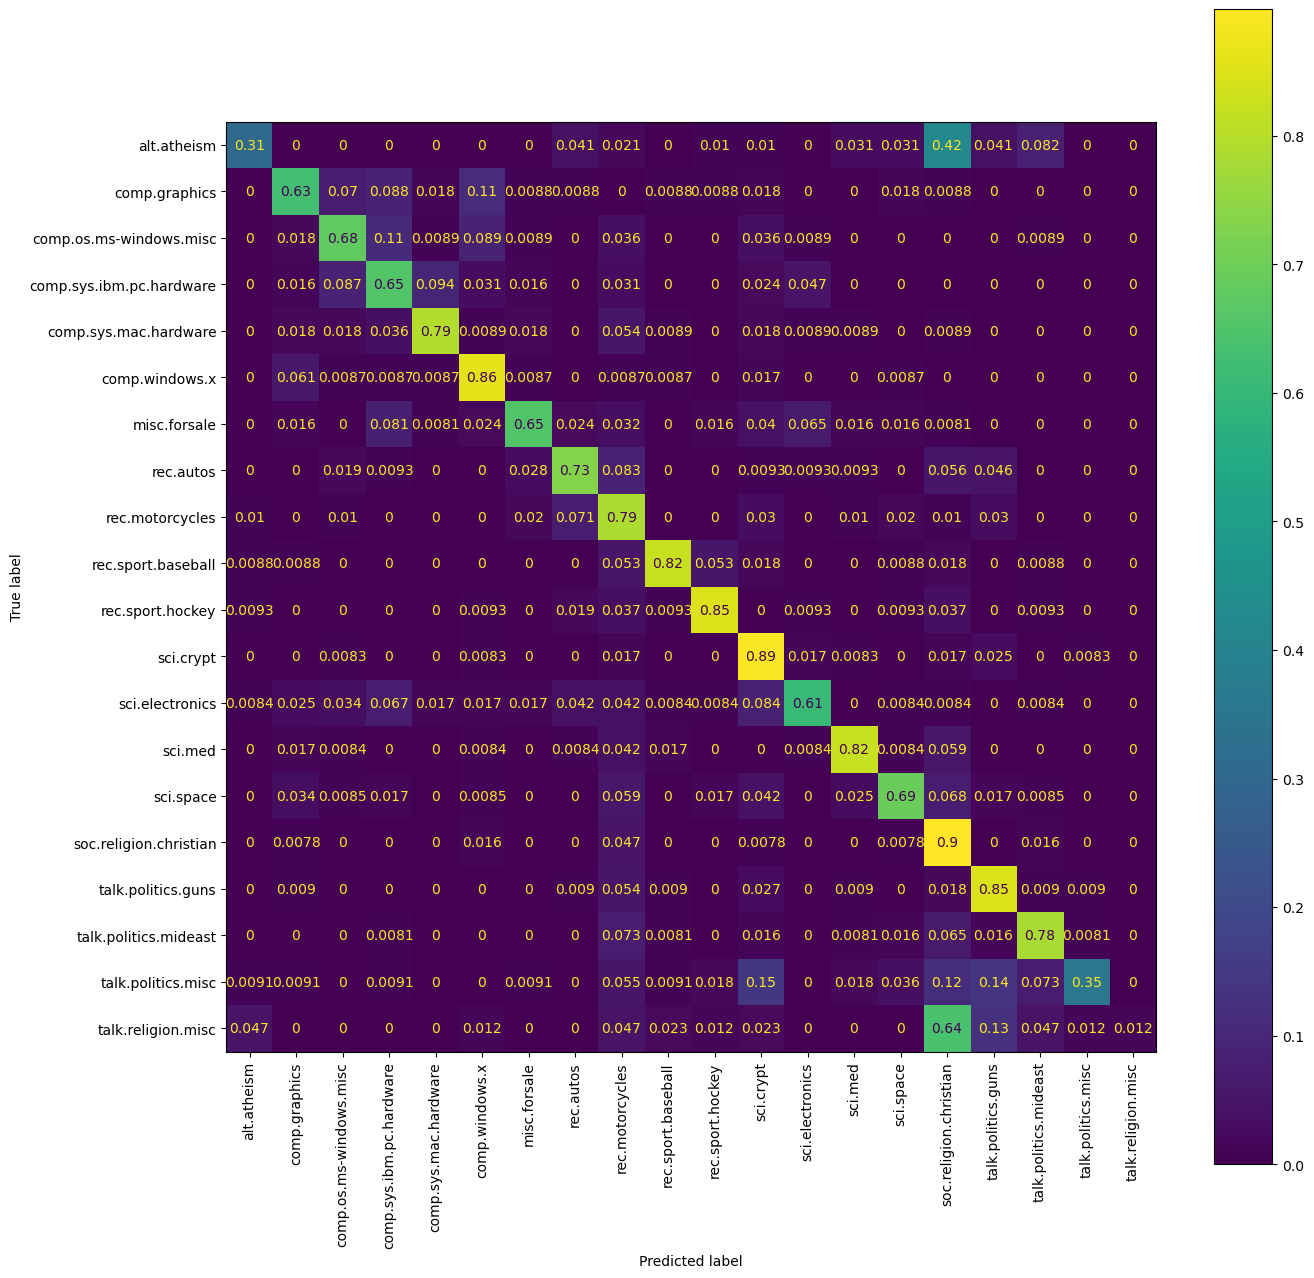

In [56]:
fig, ax = plt.subplots(figsize=(15, 15))
disp = ConfusionMatrixDisplay.from_estimator(NB, test_feature_vects, test_label_2, normalize='true', display_labels=df_train_filtered.target_names, xticks_rotation='vertical', ax=ax)

In [57]:
print(metrics.classification_report(test_label_2, test_preds, target_names=df_train_filtered.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.77      0.31      0.44        97
           comp.graphics       0.72      0.63      0.67       114
 comp.os.ms-windows.misc       0.70      0.68      0.69       112
comp.sys.ibm.pc.hardware       0.62      0.65      0.64       127
   comp.sys.mac.hardware       0.82      0.79      0.81       112
          comp.windows.x       0.71      0.86      0.78       115
            misc.forsale       0.84      0.65      0.74       124
               rec.autos       0.77      0.73      0.75       108
         rec.motorcycles       0.46      0.79      0.58        99
      rec.sport.baseball       0.89      0.82      0.85       113
        rec.sport.hockey       0.85      0.85      0.85       108
               sci.crypt       0.63      0.89      0.74       120
         sci.electronics       0.77      0.61      0.68       119
                 sci.med       0.86      0.82      0.84       119
         

### Trying with different Alpha values

In [60]:
alphas = {'alpha' : [0.01, 0.1, 0.5, 1.0, 10.0], }

NB_grid = sklearn.model_selection.GridSearchCV(MultinomialNB(), param_grid = alphas, scoring = 'f1_macro', n_jobs = -1, cv = 5, verbose=5)
NB_grid.fit(train_feature_vects, train_label_2)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]},
             scoring='f1_macro', verbose=5)

In [64]:
print(f"The best parameter for the model is : {NB_grid.best_params_}")

The best parameter for the model is : {'alpha': 0.01}


#### We will be taking the best estimator now

In [65]:
NB_grid.best_estimator_

MultinomialNB(alpha=0.01)

In [68]:
Best_NB = NB_grid.best_estimator_
pred_label = Best_NB.predict(test_feature_vects)

In [69]:
print(f"The F1 score for the Best NB model with alpha = 0.01 is : {metrics.f1_score(test_label_2, pred_label, average = 'macro')}")

The F1 score for the Best NB model with alpha = 0.01 is : 0.7321088520594417


### Using confusion matrix to visualize it

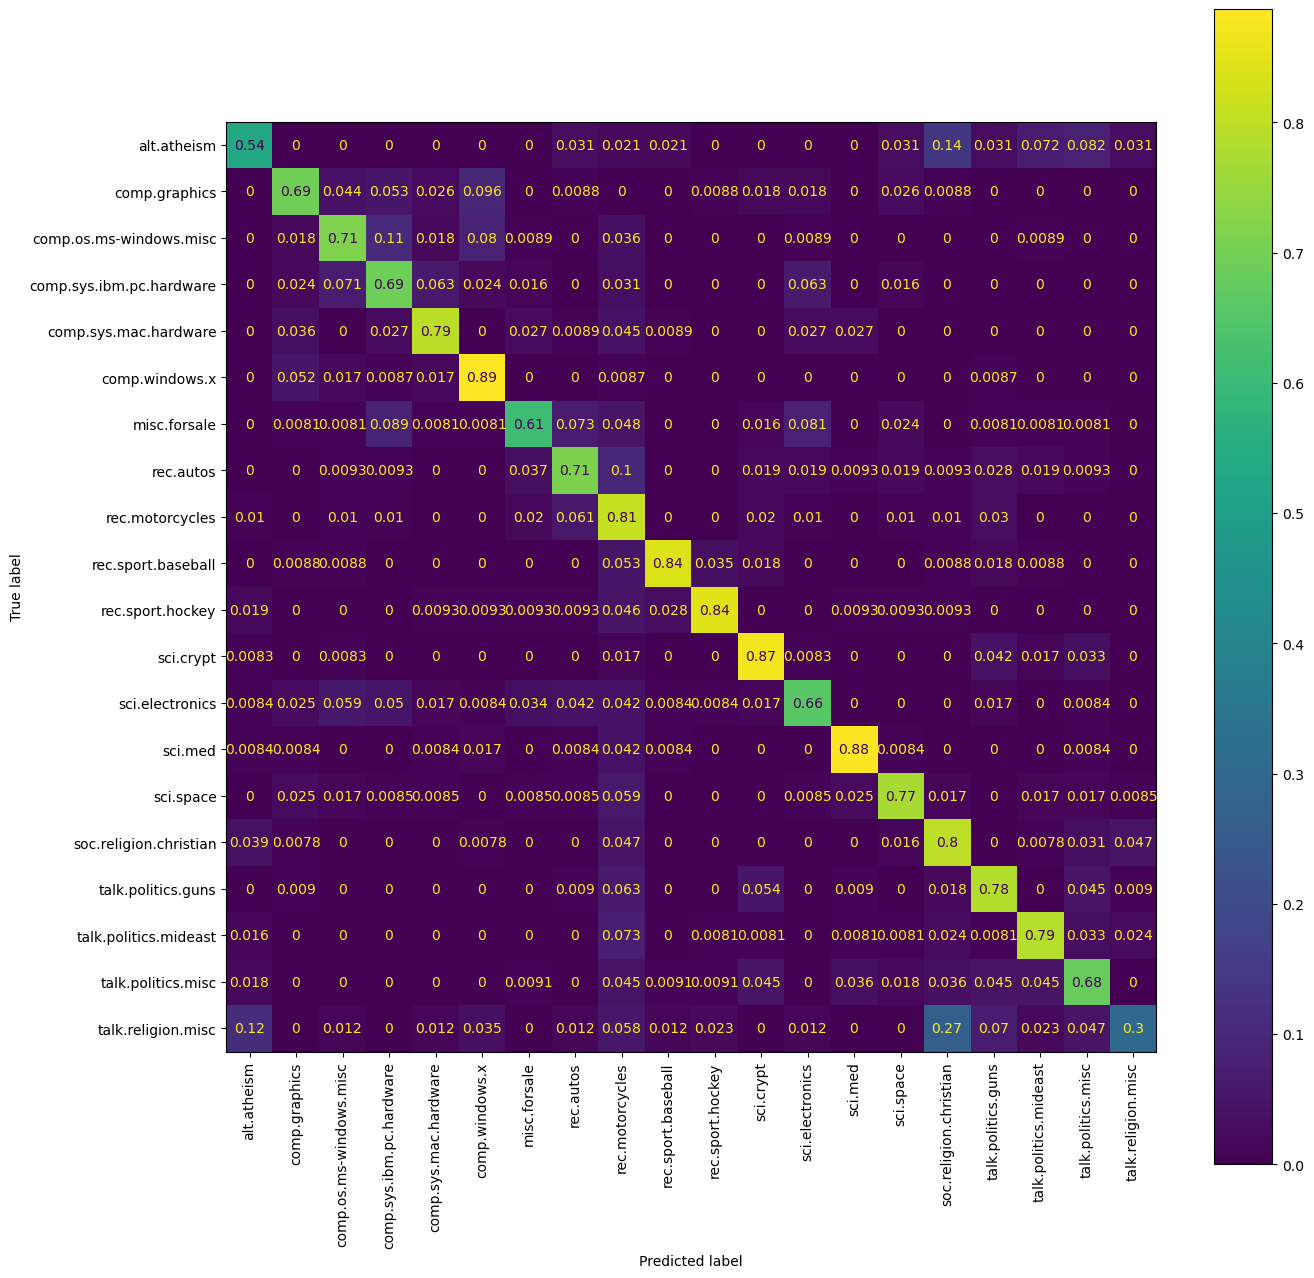

In [76]:
fig, ax = plt.subplots(figsize = (15, 15))
cm = ConfusionMatrixDisplay.from_estimator(Best_NB, test_feature_vects, test_label_2, normalize = 'true', display_labels = df_train_filtered.target_names, xticks_rotation = 'vertical', ax = ax)
plt.show()

In [79]:
print(metrics.classification_report(test_label_2, pred_label, target_names=df_train_filtered.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.68      0.54      0.60        97
           comp.graphics       0.75      0.69      0.72       114
 comp.os.ms-windows.misc       0.72      0.71      0.72       112
comp.sys.ibm.pc.hardware       0.68      0.69      0.68       127
   comp.sys.mac.hardware       0.80      0.79      0.80       112
          comp.windows.x       0.76      0.89      0.82       115
            misc.forsale       0.80      0.61      0.69       124
               rec.autos       0.72      0.71      0.72       108
         rec.motorcycles       0.46      0.81      0.58        99
      rec.sport.baseball       0.90      0.84      0.87       113
        rec.sport.hockey       0.90      0.84      0.87       108
               sci.crypt       0.81      0.87      0.84       120
         sci.electronics       0.72      0.66      0.69       119
                 sci.med       0.88      0.88      0.88       119
         

In [80]:
# religion.misc and atheism columns have the worst f1-score, although it's better than before but it can still be better
# The christian column has dimmed further in the other categories.

### Let's see the most frequently occurring words 

In [81]:
def show_top_words(classifier, vectorizer, categories, top_n):
    feature_names = np.asarray(vectorizer.get_feature_names_out())
    for i, category in enumerate(categories):
        prob_sorted = classifier.feature_log_prob_[i, :].argsort()[::-1]
        print("%s: %s" % (category, " ".join(feature_names[prob_sorted[:top_n]])))

In [82]:
show_top_words(Best_NB, vect, df_train_filtered.target_names, 10)

alt.atheism: god religion atheist people think say atheism post belief believe
comp.graphics: file graphic image thank program format look know color software
comp.os.ms-windows.misc: window file driver problem use program card do thank font
comp.sys.ibm.pc.hardware: drive card controller bus scsi monitor ide mb thank pc
comp.sys.mac.hardware: mac apple drive problem monitor card thank work simms quadra
comp.windows.x: x window server widget motif application use run thank program
misc.forsale: sale offer shipping sell price new include email condition drive
rec.autos: car engine drive like dealer good new buy oil look
rec.motorcycles: bike ride motorcycle dod helmet like rider go think know
rec.sport.baseball: game year team baseball hit win player run fan pitch
rec.sport.hockey: game team play hockey player season playoff nhl win year
sci.crypt: key encryption chip clipper government system nsa phone escrow bit
sci.electronics: power use circuit know like work chip ground try line
sc

### We'll train a dummy classifier to just guess the most frequent class

#### Predicts most frequent class

In [86]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(train_feature_vects, train_label_2)
dummy_clf.score(test_feature_vects, test_label_2)

0.043747238179407864

#### Just guesses a class

In [88]:
dummy_clf = DummyClassifier(strategy="uniform")
dummy_clf.fit(train_feature_vects, train_label_2)
dummy_clf.score(test_feature_vects, test_label_2)

0.04904993371630579

## Creating the Best Final Naive-Bayes Model

In [91]:
txt_clf = Pipeline([
    ('vect', TfidfVectorizer(tokenizer = sp_tokenizer)),
    ('Best_NB', MultinomialNB(alpha = 0.01))
])

In [121]:
txt_clf.fit(df_train_filtered.data, df_train_filtered.target)

Pipeline(steps=[('vect',
                 TfidfVectorizer(tokenizer=<function sp_tokenizer at 0x000001EAA8E12DC0>)),
                ('Best_NB', MultinomialNB(alpha=0.01))])

### Importing the test fetch_20newsgroups dataset

In [94]:
df_test_filtered = fetch_20newsgroups(subset = 'test', remove = ('headers', 'footers', 'quotes'))

In [95]:
pred_vals = txt_clf.predict(df_test_filtered.data)

### Classification Report

In [103]:
print(metrics.classification_report(df_test_filtered.target, pred_vals, target_names=df_test_filtered.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.56      0.46      0.51       319
           comp.graphics       0.68      0.69      0.68       389
 comp.os.ms-windows.misc       0.62      0.54      0.58       394
comp.sys.ibm.pc.hardware       0.59      0.67      0.62       392
   comp.sys.mac.hardware       0.71      0.69      0.70       385
          comp.windows.x       0.80      0.74      0.77       395
            misc.forsale       0.77      0.65      0.70       390
               rec.autos       0.77      0.73      0.75       396
         rec.motorcycles       0.77      0.73      0.75       398
      rec.sport.baseball       0.92      0.81      0.86       397
        rec.sport.hockey       0.58      0.93      0.72       399
               sci.crypt       0.74      0.74      0.74       396
         sci.electronics       0.67      0.57      0.62       393
                 sci.med       0.83      0.77      0.80       396
         

#### Confusion Matrix

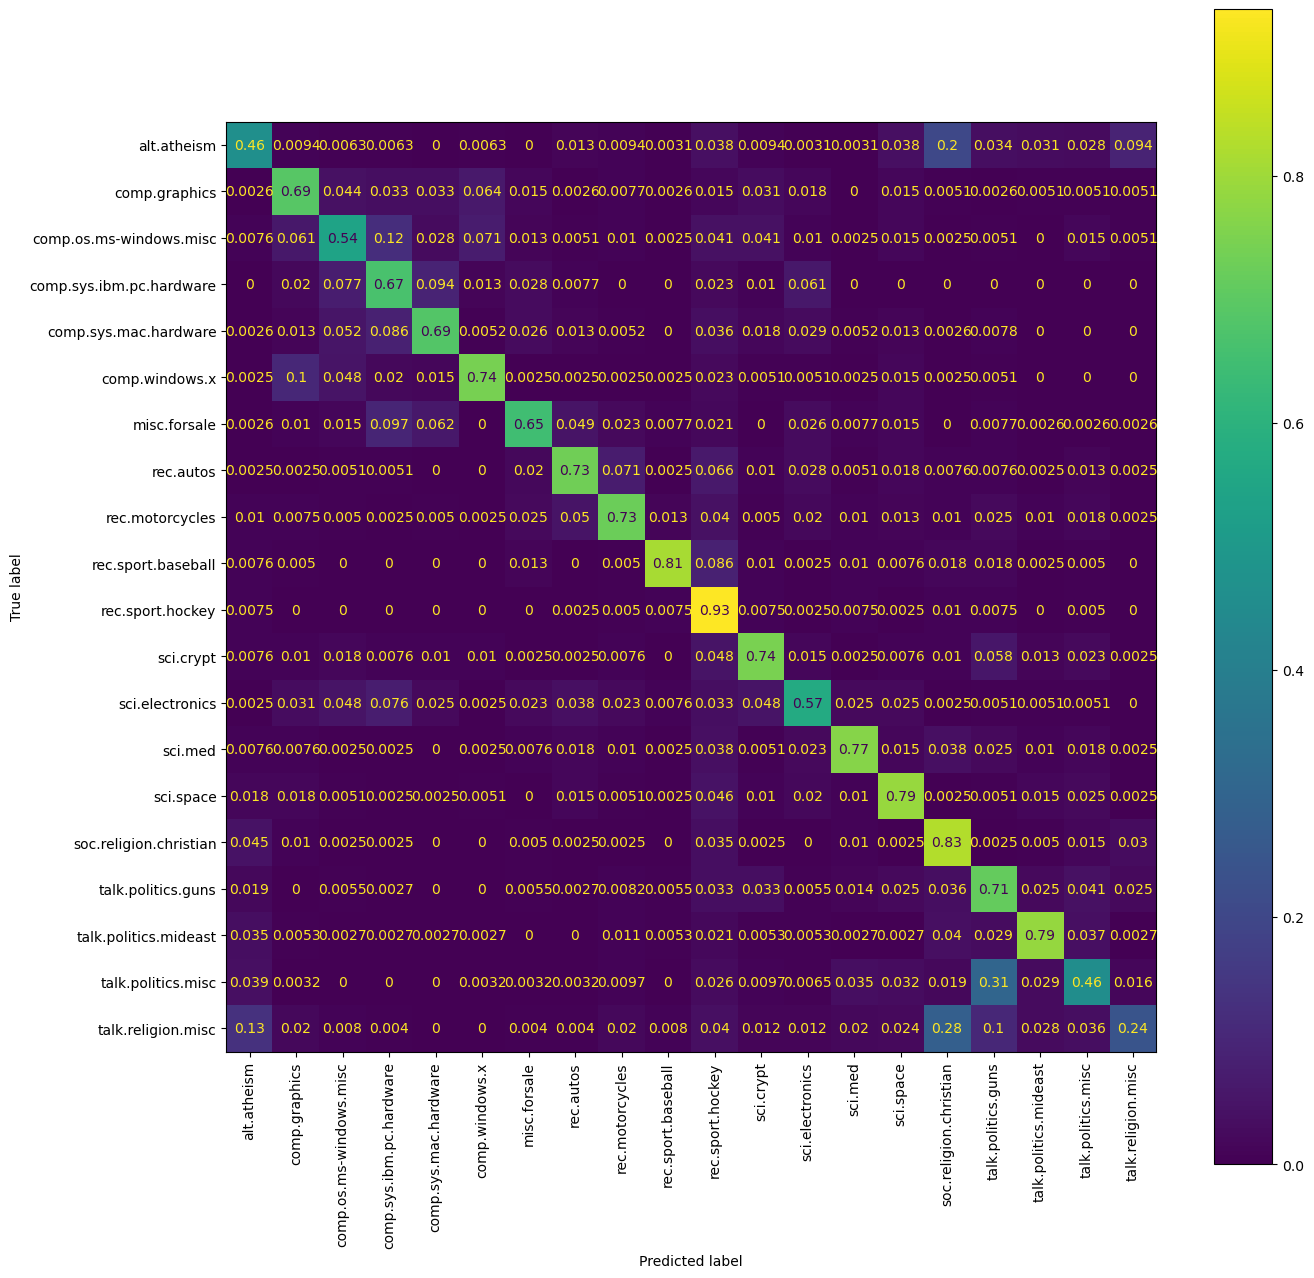

In [105]:
fig, ax = plt.subplots(figsize=(15, 15))
ConfusionMatrixDisplay.from_predictions(df_test_filtered.target, pred_vals, normalize='true', display_labels=df_test_filtered.target_names, xticks_rotation='vertical', ax=ax)
plt.show()

## Fitting our Model on the Old train test data for comparison

In [123]:
pred_v = txt_clf.predict(test_data_2)

In [124]:
print(f"F1 score on test data for comparison : {metrics.f1_score(test_label_2, pred_v, average = 'macro')}")

F1 score on test data for comparison : 0.9485815824864636


In [122]:
# This is a great F1 score compared to our earlier Naive-bayes Models

## THE END !!!